# - The project :: Stroke-Disease-Diagnostic-Project
*****************************************************************
<img src="images/diagonistic.gif" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/process.gif" />


* Domain-Knowledge ::
    * According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
    * This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient..


        

<img src="images/project.gif" />

    




* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("stroke-data.csv")
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

* from thae result above we can see that ::
*********************************************************
* We have 5110  record of data.
* we have 12  features related stroke.
* Our-Target stroke that we will Predict it use ML Models.

*******************************************************
# Features of Stroke data :
*******************************************************



* id:: unique identifier.
* gender :: "Male", "Female" or "Other".
*age :: age of the patient.
* hypertension :: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
* heart_disease :: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
* ever_married :: "No" or "Yes".

* Residence_type :: "Rural" or "Urban".
* avg_glucose_level :: average glucose level in blood.
* bmi :: body mass index.
* smoking_status:: "formerly smoked", "never smoked", "smokes" or "Unknown".
* stroke :: 1 if the patient had a stroke or 0 if not.
* *Note :: "Unknown" in smoking_status means that the information is unavailable for this patient.



<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

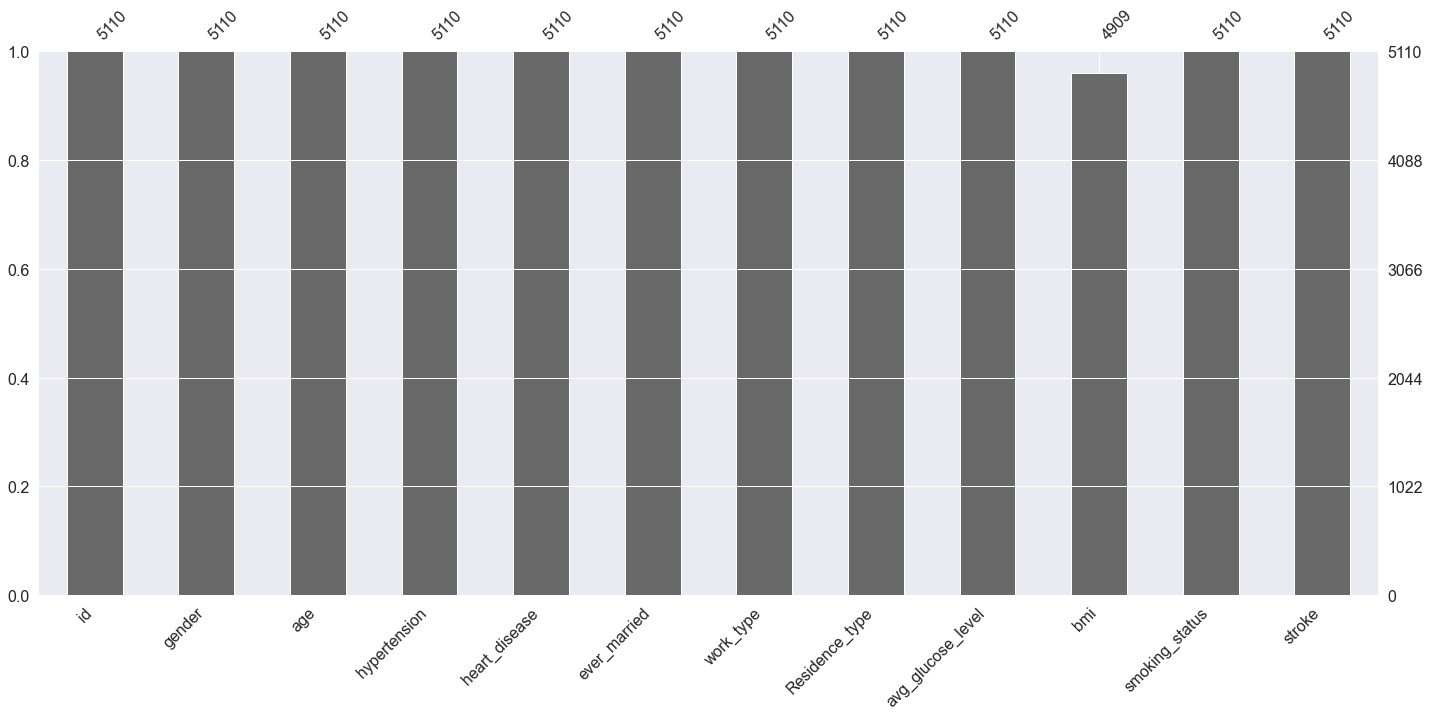

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

* from the result above we can see that all features of data not include Missing data values exepct bmi include 201 missing so that we will fill it using mean or median.

In [8]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (id)

The Col _ (id) _Unique_values :: [ 9046 51676 31112 ... 19723 37544 44679]

The Col _ (id)_Value_counts :: 

49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64

-----------
-----------

The Col :: (gender)

The Col _ (gender) _Unique_values :: ['Male' 'Female' 'Other']

The Col _ (gender)_Value_counts :: 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

-----------
-----------

The Col :: (age)

The Col _ (age) _Unique_values :: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+0

In [9]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [10]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [11]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
# check data include duplicates record or not
df.duplicated().sum()

0

* From the result above data not include duplicaties.

In [13]:
# Checking dtypes of dataset.
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

* Wrangling and Mainplluting data.

In [14]:
# Get The Record Of the Clients who max age ::
df[df["age"] == df["age"].max()]

id  gender   age  hypertension  heart_disease ever_married  \
23    64778    Male  82.0             0              1          Yes   
32    39373  Female  82.0             1              0          Yes   
35      712  Female  82.0             1              1           No   
42    61960    Male  82.0             0              1          Yes   
56    38829  Female  82.0             0              0          Yes   
128   37132    Male  82.0             0              0          Yes   
140   20439    Male  82.0             0              1          Yes   
187   67895  Female  82.0             1              1          Yes   
188   30184    Male  82.0             0              0          Yes   
337   56357  Female  82.0             0              1           No   
613   22853    Male  82.0             0              0           No   
670   53010    Male  82.0             0              0          Yes   
767   62382    Male  82.0             0              0          Yes   
992   42786    Male  82.0             0              1          Yes   
1029  23031    Male  82.0             0              0          Yes   
1042  39120  Female  82.0             0              0           No   
1068  24437  Female  82.0             0              0          Yes   
1350  60816  Female  82.0             1              0          Yes   
1412  62452    Male  82.0             1              0          Yes   
1515  72474  Female  82.0             0              0          Yes   
1529  34496  Female  82.0             0              0          Yes   
1691  70344    Male  82.0             0              0          Yes   
1769  32452  Female  82.0             0              1          Yes   
1839  25883  Female  82.0             1              0          Yes   
1951   1460  Female  82.0             0              0          Yes   
2275   4591  Female  82.0             0              0          Yes   
2314  24289    Male  82.0             0              0          Yes   
2341  10649  Female  82.0             0              0          Yes   
2418  16812  Female  82.0             0              1          Yes   
2453   7411    Male  82.0             0              0          Yes   
2633  72819  Female  82.0             0              0          Yes   
2876  11327  Female  82.0             0              0          Yes   
2979  57494  Female  82.0             1              0          Yes   
3108  53252    Male  82.0             0              0           No   
3167  49849  Female  82.0             0              0          Yes   
3192  47917  Female  82.0             1              0           No   
3316  17893  Female  82.0             0              0          Yes   
3360   4753    Male  82.0             0              1          Yes   
3388  52679  Female  82.0             0              0          Yes   
3400  38078  Female  82.0             1              1          Yes   
3422  34543  Female  82.0             0              0          Yes   
3462  31344    Male  82.0             0              0          Yes   
3603  28247    Male  82.0             0              0           No   
3637  70268    Male  82.0             0              0          Yes   
4088  27705  Female  82.0             0              1          Yes   
4094  25510    Male  82.0             0              0          Yes   
4164  40163  Female  82.0             1              0          Yes   
4452  27596  Female  82.0             1              0          Yes   
4511  21830  Female  82.0             0              0          Yes   
4529  62715    Male  82.0             0              1          Yes   
4590  19271  Female  82.0             1              1          Yes   
4716   5387  Female  82.0             0              0           No   
4763  19191    Male  82.0             0              0          Yes   
4819  48118  Female  82.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5100  68398    Male  82.0        

In [15]:
# Get The Record of the Min age ::
df[df["age"] == df["age"].min()]

id  gender   age  hypertension  heart_disease ever_married work_type  \
1614  47350  Female  0.08             0              0           No  children   
3295  29955    Male  0.08             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1614          Urban             139.67  14.1        Unknown       0  
3295          Rural              70.33  16.9        Unknown       0

In [16]:
# Get The Record Of the Clients who max hypertension ::
df[df["hypertension"] == df["hypertension"].max()]

id  gender   age  hypertension  heart_disease ever_married  \
4      1665  Female  79.0             1              0          Yes   
6     53882    Male  74.0             1              1          Yes   
10    12109  Female  81.0             1              0          Yes   
15    58202  Female  50.0             1              0          Yes   
17    34120    Male  75.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5088  22190  Female  64.0             1              0          Yes   
5091   6369    Male  59.0             1              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5100  68398    Male  82.0             1              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
4     Self-employed          Rural             174.12  24.0   never smoked   
6           Private          Rural              70.09  27.4   never smoked   
10          Private          Rural              80.43  29.7   never smoked   
15    Self-employed          Rural             167.41  30.9   never smoked   
17          Private          Urban             221.29  25.8         smokes   
...             ...            ...                ...   ...            ...   
5088  Self-employed          Urban              76.89  30.2        Unknown   
5091        Private          Rural              95.05  30.9   never smoked   
5093       Govt_job          Rural              95.02   NaN         smokes   
5100  Self-employed          Rural              71.97  28.3   never smoked   
5105        Private          Urban              83.75   NaN   never smoked   

      stroke  
4          1  
6          1  
10         1  
15         1  
17         1  
...      ...  
5088       0  
5091       0  
5093       0  
5100       0  
5105       0  

[498 rows x 12 columns]

In [17]:
# Get The Record of the Min hypertension ::
df[df["hypertension"] == df["hypertension"].min()]

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4612 rows x 12 columns]

In [18]:
# Get The Record Of the Clients who max heart_disease ::
df[df["heart_disease"] == df["heart_disease"].max()]

id  gender   age  hypertension  heart_disease ever_married work_type  \
0      9046    Male  67.0             0              1          Yes   Private   
2     31112    Male  80.0             0              1          Yes   Private   
6     53882    Male  74.0             1              1          Yes   Private   
11    12095  Female  61.0             0              1          Yes  Govt_job   
13     8213    Male  78.0             0              1          Yes   Private   
...     ...     ...   ...           ...            ...          ...       ...   
4855  42563  Female  57.0             1              1          Yes   Private   
4869  72715  Female  50.0             0              1          Yes   Private   
4921   4062    Male  72.0             0              1          Yes   Private   
4986  53697    Male  58.0             0              1          Yes   Private   
5008  48109  Female  79.0             0              1          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
2             Rural             105.92  32.5     never smoked       1  
6             Rural              70.09  27.4     never smoked       1  
11            Rural             120.46  36.8           smokes       1  
13            Urban             219.84   NaN          Unknown       1  
...             ...                ...   ...              ...     ...  
4855          Rural             231.72  45.7  formerly smoked       0  
4869          Urban             193.80  26.4     never smoked       0  
4921          Rural             238.27   NaN           smokes       0  
4986          Rural             225.35  26.5           smokes       0  
5008          Rural              88.51  24.5     never smoked       0  

[276 rows x 12 columns]

In [19]:
# Get The Record of the Min heart_disease ::
df[df["heart_disease"] == df["heart_disease"].min()]

id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
7     10434  Female  69.0             0              0           No   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1     Self-employed          Rural             202.21   NaN     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
7           Private          Urban              94.39  22.8     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
1          1  
3          1  
4          1  
5          1  
7          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4834 rows x 12 columns]

In [20]:
# Get The Record Of the Clients who max avg_glucose_level ::
df[df["avg_glucose_level"] == df["avg_glucose_level"].max()]

id gender   age  hypertension  heart_disease ever_married work_type  \
193  69112   Male  68.0             1              1          Yes   Private   

    Residence_type  avg_glucose_level   bmi smoking_status  stroke  
193          Rural             271.74  31.1         smokes       1

In [21]:
# Get The Record of the Min avg_glucose_level ::
df[df["avg_glucose_level"] == df["avg_glucose_level"].min()]

id  gender   age  hypertension  heart_disease ever_married work_type  \
4886  60562  Female  21.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
4886          Rural              55.12  21.8   never smoked       0

In [22]:
# Get The Record Of the Clients who max bmi ::
df[df["bmi"] == df["bmi"].max()]

id gender   age  hypertension  heart_disease ever_married work_type  \
2128  56420   Male  17.0             1              0           No   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
2128          Rural              61.67  97.6        Unknown       0

In [23]:
# Get The Record of the Min bmi ::
df[df["bmi"] == df["bmi"].min()]

id  gender   age  hypertension  heart_disease ever_married work_type  \
1609  38043  Female  1.24             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1609          Rural             122.04  10.3        Unknown       0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
# grouped data ased on gender feature and get col describtion ::
df.groupby("gender").describe().transpose()

gender                         Female          Male     Other
id                count   2994.000000   2115.000000      1.00
                  mean   36479.685037  36562.541371  56156.00
                  std    21176.443056  21146.470229       NaN
                  min       67.000000     84.000000  56156.00
                  25%    17796.500000  17695.500000  56156.00
                  50%    37093.000000  36666.000000  56156.00
                  75%    54310.000000  55194.500000  56156.00
                  max    72940.000000  72882.000000  56156.00
age               count   2994.000000   2115.000000      1.00
                  mean      43.757395     42.483385     26.00
                  std       21.966561     23.484066       NaN
                  min        0.080000      0.080000     26.00
                  25%       27.000000     22.000000     26.00
                  50%       44.000000     46.000000     26.00
                  75%       61.000000     61.000000     26.00
                  max       82.000000     82.000000     26.00
hypertension      count   2994.000000   2115.000000      1.00
                  mean       0.092184      0.104965      0.00
                  std        0.289334      0.306580       NaN
                  min        0.000000      0.000000      0.00
                  25%        0.000000      0.000000      0.00
                  50%        0.000000      0.000000      0.00
                  75%        0.000000      0.000000      0.00
                  max        1.000000      1.000000      0.00
heart_disease     count   2994.000000   2115.000000      1.00
                  mean       0.037742      0.077069      0.00
                  std        0.190604      0.266763       NaN
                  min        0.000000      0.000000      0.00
                  25%        0.000000      0.000000      0.00
                  50%        0.000000      0.000000      0.00
                  75%        0.000000      0.000000      0.00
                  max        1.000000      1.000000      0.00
avg_glucose_level count   2994.000000   2115.000000      1.00
                  mean     104.057809    109.088520    143.33
                  std       43.590651     47.434840       NaN
                  min       55.120000     55.220000    143.33
                  25%       76.432500     78.370000    143.33
                  50%       90.755000     93.550000    143.33
                  75%      112.182500    117.730000    143.33
                  max      267.760000    271.740000    143.33
bmi               count   2897.000000   2011.000000      1.00
                  mean      29.065758     28.647936     22.40
                  std        8.110783      7.464493       NaN
                  min       10.300000     11.500000     22.40
                  25%       23.400000     24.000000     22.40
                  50%       27.800000     28.400000     22.40
                  75%       33.500000     32.500000     22.40
                  max       78.000000     97.600000     22.40
stroke            count   2994.000000   2115.000000      1.00
                  mean       0.047094      0.051064      0.00
                  std        0.211876      0.220180       NaN
                  min        0.000000      0.000000      0.00
                  25%        0.000000      0.000000      0.00
                  50%        0.000000      0.000000      0.00
                  75%        0.000000      0.000000      0.00
                  max        1.000000      1.000000      0.00

In [26]:
# grouped data ased on ever_married feature and get col describtion ::
df.groupby("ever_married").describe().transpose()

ever_married                       No           Yes
id                count   1757.000000   3353.000000
                  mean   36117.673307  36727.514465
                  std    21104.626661  21191.704479
                  min       67.000000     84.000000
                  25%    17337.000000  17869.000000
                  50%    36204.000000  37132.000000
                  75%    54117.000000  55169.000000
                  max    72940.000000  72918.000000
age               count   1757.000000   3353.000000
                  mean      22.014229     54.342082
                  std       18.474467     15.527678
                  min        0.080000     18.000000
                  25%        9.000000     42.000000
                  50%       18.000000     54.000000
                  75%       28.000000     66.000000
                  max       82.000000     82.000000
hypertension      count   1757.000000   3353.000000
                  mean       0.030165      0.132717
                  std        0.171090      0.339319
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000
heart_disease     count   1757.000000   3353.000000
                  mean       0.018213      0.072771
                  std        0.133759      0.259798
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000
avg_glucose_level count   1757.000000   3353.000000
                  mean      96.448150    111.230310
                  std       32.355385     50.018778
                  min       55.120000     55.220000
                  25%       75.770000     78.020000
                  50%       89.040000     93.550000
                  75%      108.560000    120.150000
                  max      266.590000    271.740000
bmi               count   1705.000000   3204.000000
                  mean      25.214721     30.850749
                  std        7.783018      7.159654
                  min       10.300000     11.300000
                  25%       19.500000     26.100000
                  50%       23.500000     29.600000
                  75%       29.000000     34.400000
                  max       97.600000     92.000000
stroke            count   1757.000000   3353.000000
                  mean       0.016505      0.065613
                  std        0.127445      0.247641
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000

In [27]:
# grouped data ased on work_type feature and get col describtion ::
df.groupby("work_type").describe().transpose()

work_type                    Govt_job  Never_worked       Private  \
id                count    657.000000     22.000000   2925.000000   
                  mean   36516.936073  38274.409091  36951.227009   
                  std    21340.521568  20166.419938  21257.455472   
                  min      132.000000  11702.000000     67.000000   
                  25%    17697.000000  19830.750000  18595.000000   
                  50%    37440.000000  36054.500000  37492.000000   
                  75%    54177.000000  57202.000000  55459.000000   
                  max    72776.000000  71966.000000  72918.000000   
age               count    657.000000     22.000000   2925.000000   
                  mean      50.879756     16.181818     45.503932   
                  std       15.438879      2.342899     18.444200   
                  min       14.000000     13.000000      8.000000   
                  25%       40.000000     14.250000     30.000000   
                  50%       51.000000     16.000000     45.000000   
                  75%       62.000000     17.000000     59.000000   
                  max       82.000000     23.000000     82.000000   
hypertension      count    657.000000     22.000000   2925.000000   
                  mean       0.111111      0.000000      0.096068   
                  std        0.314509      0.000000      0.294735   
                  min        0.000000      0.000000      0.000000   
                  25%        0.000000      0.000000      0.000000   
                  50%        0.000000      0.000000      0.000000   
                  75%        0.000000      0.000000      0.000000   
                  max        1.000000      0.000000      1.000000   
heart_disease     count    657.000000     22.000000   2925.000000   
                  mean       0.054795      0.000000      0.054017   
                  std        0.227752      0.000000      0.226090   
                  min        0.000000      0.000000      0.000000   
                  25%        0.000000      0.000000      0.000000   
                  50%        0.000000      0.000000      0.000000   
                  75%        0.000000      0.000000      0.000000   
                  max        1.000000      0.000000      1.000000   
avg_glucose_level count    657.000000     22.000000   2925.000000   
                  mean     107.779772     96.042727    106.796844   
                  std       47.697200     28.697132     45.886102   
                  min       55.270000     59.990000     55.120000   
                  25%       76.660000     78.457500     77.820000   
                  50%       91.930000     86.020000     91.920000   
                  75%      114.320000    112.807500    114.460000   
                  max      266.590000    161.280000    271.740000   
bmi               count    630.000000     22.000000   2811.000000   
                  mean      30.522063     25.545455     30.304625   
                  std        6.919375      7.441757      7.582663   
                  min       16.000000     14.600000     11.500000   
                  25%       25.500000     20.975000     25.100000   
                  50%       29.400000     23.150000     28.900000   
                  75%       34.375000     28.350000     34.050000   
                  max       57.700000     44.900000     97.600000   
stroke            count    657.000000     22.000000   2925.000000   
                  mean       0.050228      0.000000      0.050940   
                  std        0.218582      0.000000      0.219913   
                  min        0.000000      0.000000      0.000000   
                  25%        0.000000      0.000000      0.000000   
                  50%        0.000000      0.000000      0.000000   
                  75%        0.000000      0.000000      0.000000   
                  max        1.000000      0.000000      1.000000   

work_type                Self-employed      children  
id         

In [28]:
# grouped data ased on Residence_type feature and get col describtion ::
df.groupby("Residence_type").describe().transpose()

Residence_type                  Rural         Urban
id                count   2514.000000   2596.000000
                  mean   36547.998011  36488.613636
                  std    20903.147303  21413.138250
                  min       77.000000     67.000000
                  25%    18152.000000  17237.500000
                  50%    37211.000000  36568.500000
                  75%    54328.750000  55137.250000
                  max    72911.000000  72940.000000
age               count   2514.000000   2596.000000
                  mean      42.900811     43.542126
                  std       22.462089     22.757380
                  min        0.080000      0.080000
                  25%       25.000000     26.000000
                  50%       44.000000     45.000000
                  75%       61.000000     61.000000
                  max       82.000000     82.000000
hypertension      count   2514.000000   2596.000000
                  mean       0.099841      0.095146
                  std        0.299847      0.293474
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000
heart_disease     count   2514.000000   2596.000000
                  mean       0.053302      0.054700
                  std        0.224679      0.227437
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000
avg_glucose_level count   2514.000000   2596.000000
                  mean     106.375235    105.927307
                  std       45.218348     45.354246
                  min       55.120000     55.220000
                  25%       77.420000     77.042500
                  50%       92.955000     90.770000
                  75%      114.515000    113.767500
                  max      271.740000    267.760000
bmi               count   2419.000000   2490.000000
                  mean      28.894212     28.892289
                  std        7.918061      7.792985
                  min       10.300000     11.300000
                  25%       23.600000     23.500000
                  50%       28.100000     28.000000
                  75%       32.800000     33.375000
                  max       97.600000     78.000000
stroke            count   2514.000000   2596.000000
                  mean       0.045346      0.052003
                  std        0.208103      0.222076
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000

In [29]:
# grouped data ased on smoking_status feature and get col describtion ::
df.groupby("smoking_status").describe().transpose()

smoking_status                Unknown  formerly smoked  never smoked  \
id                count   1544.000000       885.000000   1892.000000   
                  mean   35899.042098     36878.981921  36833.141649   
                  std    20973.579501     21618.451094  21025.816507   
                  min       77.000000        67.000000     84.000000   
                  25%    17267.250000     17347.000000  18255.750000   
                  50%    35206.500000     37132.000000  37740.000000   
                  75%    53985.000000     54756.000000  54889.750000   
                  max    72940.000000     72915.000000  72861.000000   
age               count   1544.000000       885.000000   1892.000000   
                  mean      30.229922        54.929944     46.744715   
                  std       25.055556        17.641723     19.769584   
                  min        0.080000        10.000000     10.000000   
                  25%        8.000000        43.000000     31.000000   
                  50%       23.000000        57.000000     47.000000   
                  75%       51.000000        69.000000     62.000000   
                  max       82.000000        82.000000     82.000000   
hypertension      count   1544.000000       885.000000   1892.000000   
                  mean       0.033679         0.135593      0.122622   
                  std        0.180459         0.342550      0.328089   
                  min        0.000000         0.000000      0.000000   
                  25%        0.000000         0.000000      0.000000   
                  50%        0.000000         0.000000      0.000000   
                  75%        0.000000         0.000000      0.000000   
                  max        1.000000         1.000000      1.000000   
heart_disease     count   1544.000000       885.000000   1892.000000   
                  mean       0.031088         0.087006      0.047569   
                  std        0.173612         0.282003      0.212908   
                  min        0.000000         0.000000      0.000000   
                  25%        0.000000         0.000000      0.000000   
                  50%        0.000000         0.000000      0.000000   
                  75%        0.000000         0.000000      0.000000   
                  max        1.000000         1.000000      1.000000   
avg_glucose_level count   1544.000000       885.000000   1892.000000   
                  mean      99.601541       112.886079    107.558092   
                  std       36.606195        52.256627     46.679640   
                  min       55.230000        55.270000     55.120000   
                  25%       76.785000        78.030000     77.105000   
                  50%       90.420000        92.590000     92.215000   
                  75%      110.155000       120.940000    116.162500   
                  max      260.850000       267.760000    267.600000   
bmi               count   1483.000000       837.000000   1852.000000   
                  mean      25.666352        30.747192     29.982559   
                  std        8.144856         6.981149      7.463217   
                  min       10.300000        15.000000     11.500000   
                  25%       19.400000        26.000000     24.900000   
                  50%       24.300000        29.800000     28.600000   
                  75%       30.150000        34.500000     33.600000   
                  max       97.600000        56.100000     92.000000   
stroke            count   1544.000000       885.000000   1892.000000   
                  mean       0.030440         0.079096      0.047569   
                  std        0.171851         0.270041      0.212908   
                  min        0.000000         0.000000      0.000000   
                  25%        0.000000         0.000000      0.000000   
                  50%        0.000000         0.000000      0.000000   
                  75%        0.000000   

In [30]:
# grouped data ased on stroke feature and get col describtion ::
df.groupby("stroke").describe().transpose()

stroke                              0             1
id                count   4861.000000    249.000000
                  mean   36487.236371  37115.068273
                  std    21120.133386  21993.344872
                  min       67.000000    210.000000
                  25%    17762.000000  17013.000000
                  50%    36958.000000  36706.000000
                  75%    54497.000000  56669.000000
                  max    72940.000000  72918.000000
age               count   4861.000000    249.000000
                  mean      41.971545     67.728193
                  std       22.291940     12.727419
                  min        0.080000      1.320000
                  25%       24.000000     59.000000
                  50%       43.000000     71.000000
                  75%       59.000000     78.000000
                  max       82.000000     82.000000
hypertension      count   4861.000000    249.000000
                  mean       0.088871      0.265060
                  std        0.284586      0.442254
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      1.000000
                  max        1.000000      1.000000
heart_disease     count   4861.000000    249.000000
                  mean       0.047110      0.188755
                  std        0.211895      0.392102
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000
avg_glucose_level count   4861.000000    249.000000
                  mean     104.795513    132.544739
                  std       43.846069     61.921056
                  min       55.120000     56.110000
                  25%       77.120000     79.790000
                  50%       91.470000    105.220000
                  75%      112.830000    196.710000
                  max      267.760000    271.740000
bmi               count   4700.000000    209.000000
                  mean      28.823064     30.471292
                  std        7.908287      6.329452
                  min       10.300000     16.900000
                  25%       23.400000     26.400000
                  50%       28.000000     29.700000
                  75%       33.100000     33.700000
                  max       97.600000     56.600000

In [31]:
df.head(2)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   

   stroke  
0       1  
1       1

In [32]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "hypertension" , values = "heart_disease")
Pivot_T1

hypertension         0         1
age                             
0.08          0.000000       NaN
0.16          0.000000       NaN
0.24          0.000000       NaN
0.32          0.000000       NaN
0.40          0.000000       NaN
...                ...       ...
78.00         0.192308  0.208333
79.00         0.220588  0.235294
80.00         0.265306  0.190476
81.00         0.159091  0.375000
82.00         0.232558  0.307692

[104 rows x 2 columns]

In [33]:
Pivot_T1 = pd.pivot_table(df , index = "gender" , columns = "heart_disease" , values = "avg_glucose_level")
Pivot_T1

heart_disease           0           1
gender                               
Female         102.533624  142.917788
Male           107.125999  132.590613
Other          143.330000         NaN

In [34]:
Pivot_T1 = pd.pivot_table(df , index = "work_type" , columns = "heart_disease" , values = "avg_glucose_level")
Pivot_T1

heart_disease           0           1
work_type                            
Govt_job       106.870177  123.470278
Never_worked    96.042727         NaN
Private        104.608916  145.113291
Self-employed  111.016748  127.484691
children        94.446210   62.890000

In [35]:
Pivot_T1 = pd.pivot_table(df , index = "Residence_type" , columns = "stroke" , values = "heart_disease")
Pivot_T1

stroke                 0         1
Residence_type                    
Rural           0.047500  0.175439
Urban           0.046729  0.200000

In [36]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "stroke" , values = "bmi")
Pivot_T1

stroke          0          1
age                         
0.08    15.500000        NaN
0.16    14.766667        NaN
0.24    17.400000        NaN
0.32    18.080000        NaN
0.40    15.850000        NaN
...           ...        ...
78.00   27.996104  27.606250
79.00   28.314063  25.638462
80.00   28.572549  29.456250
81.00   28.550000  25.985714
82.00   28.030435  28.022222

[104 rows x 2 columns]

In [37]:
Con_Matrix = df.corr()
Con_Matrix

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.131945  0.042374  1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

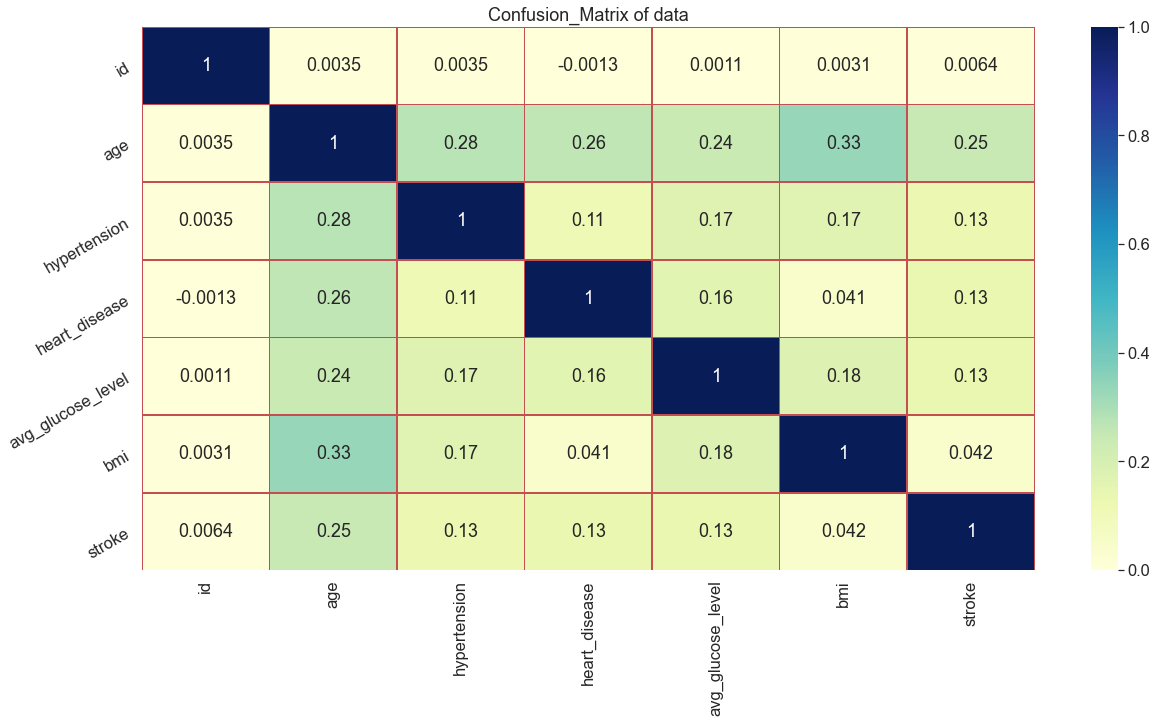

In [38]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [40]:
# To Present species of gender ::
genders = df["gender"].value_counts()
genders

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

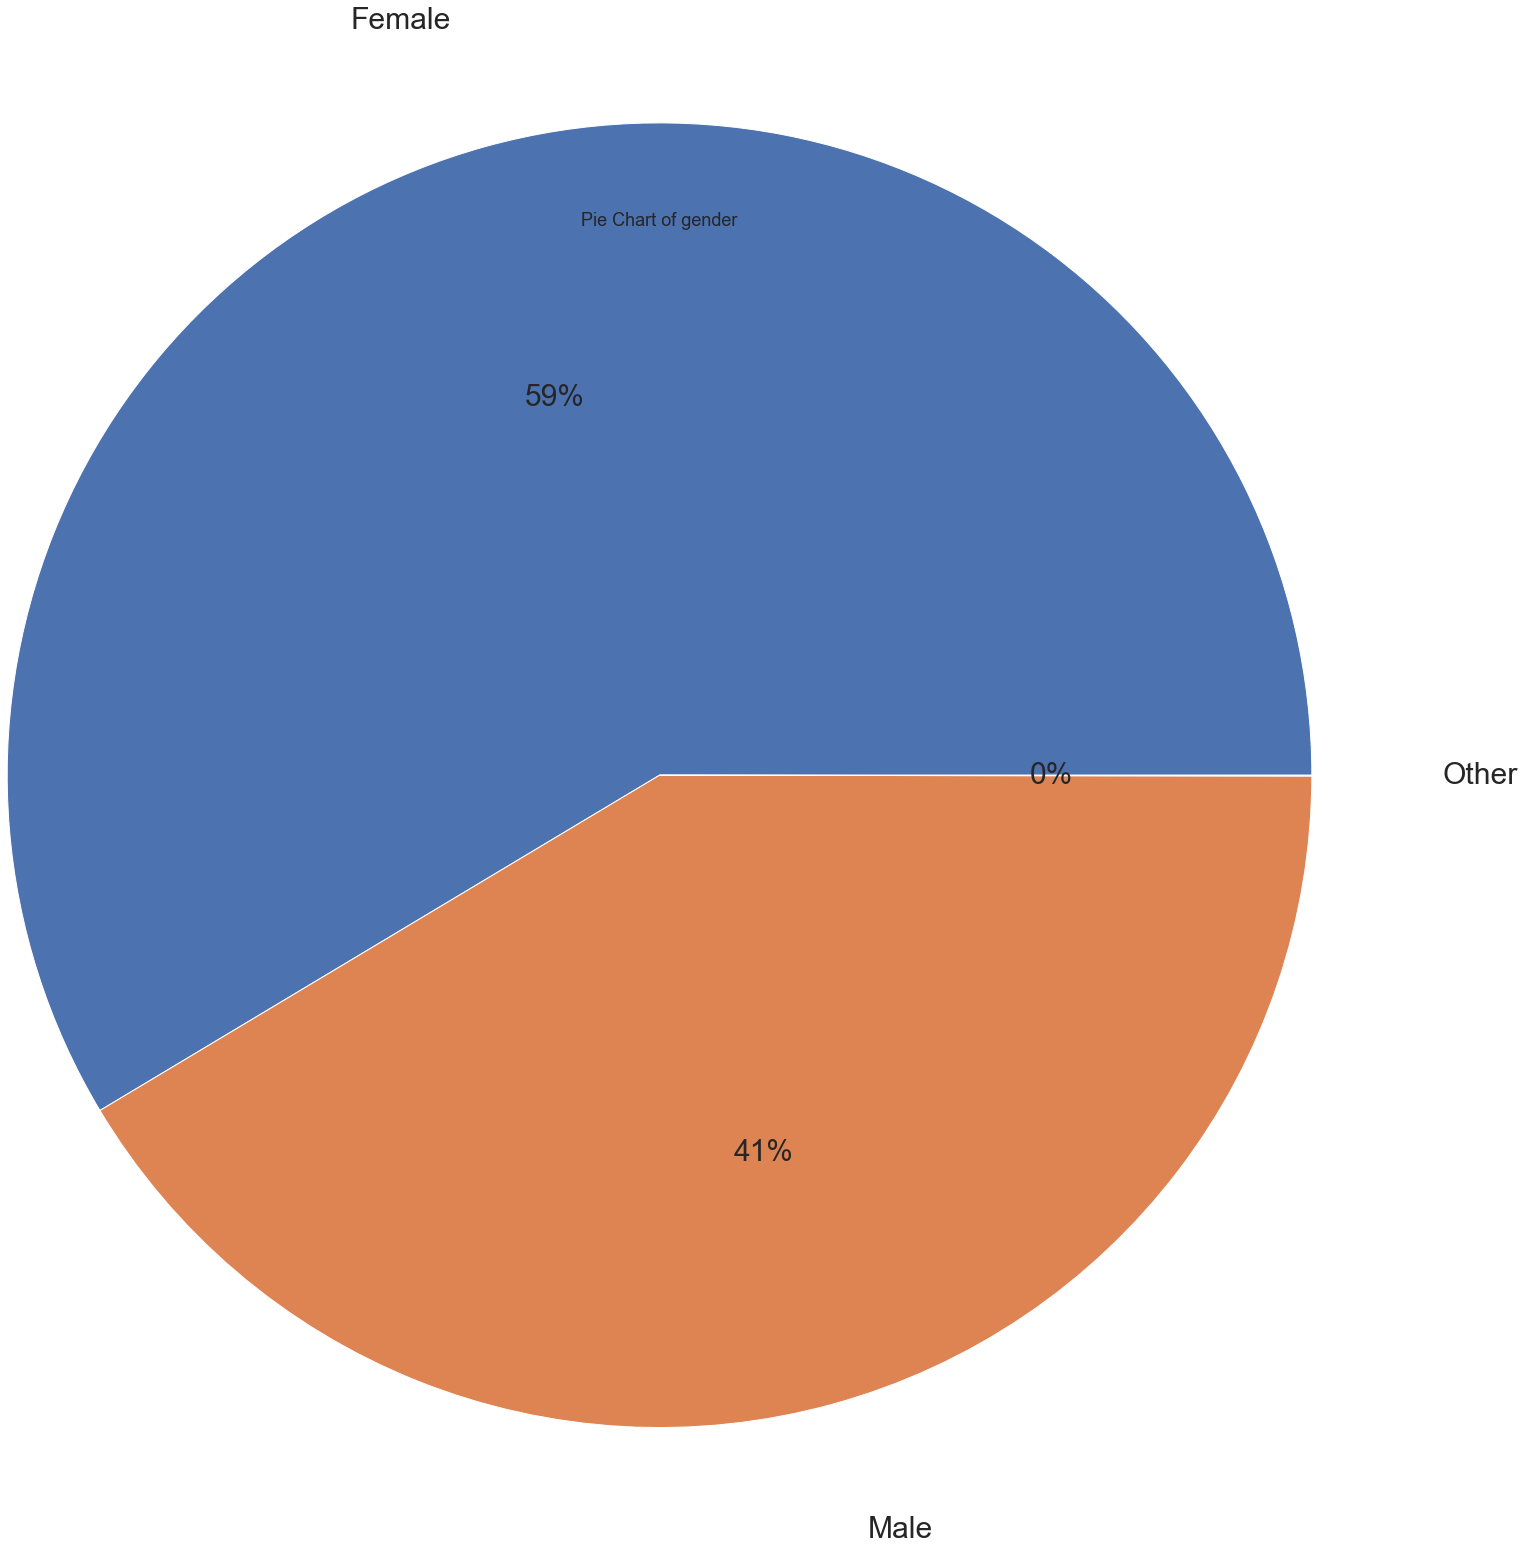

In [41]:
# Visualize Comparing gender ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
genders.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of gender")
plt.show()

In [42]:
# To Present species of ever_married ::
ever_marrieds = df["ever_married"].value_counts()
ever_marrieds

Yes    3353
No     1757
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'Pie Chart of ever_married')

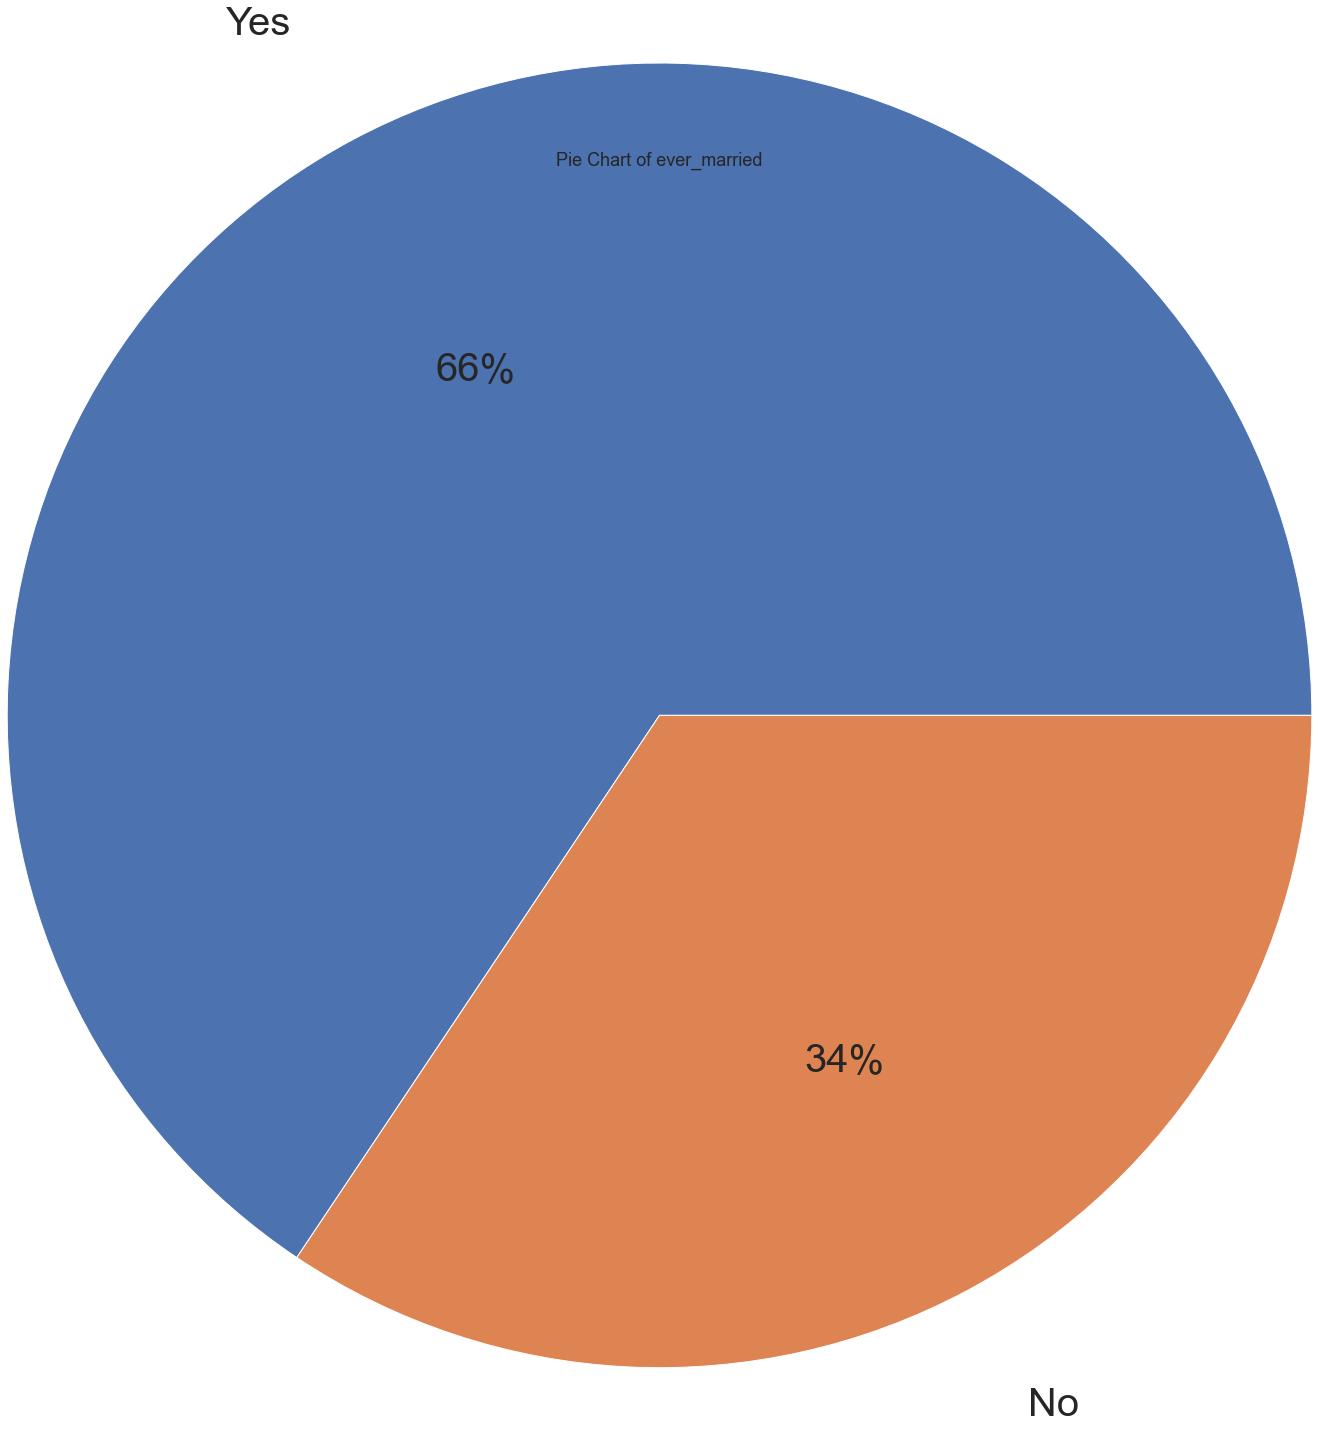

In [43]:
ever_marrieds.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of ever_married")

In [44]:
# To Present species of work_type ::
work_types = df["work_type"].value_counts()
work_types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Pie Chart of work_type')

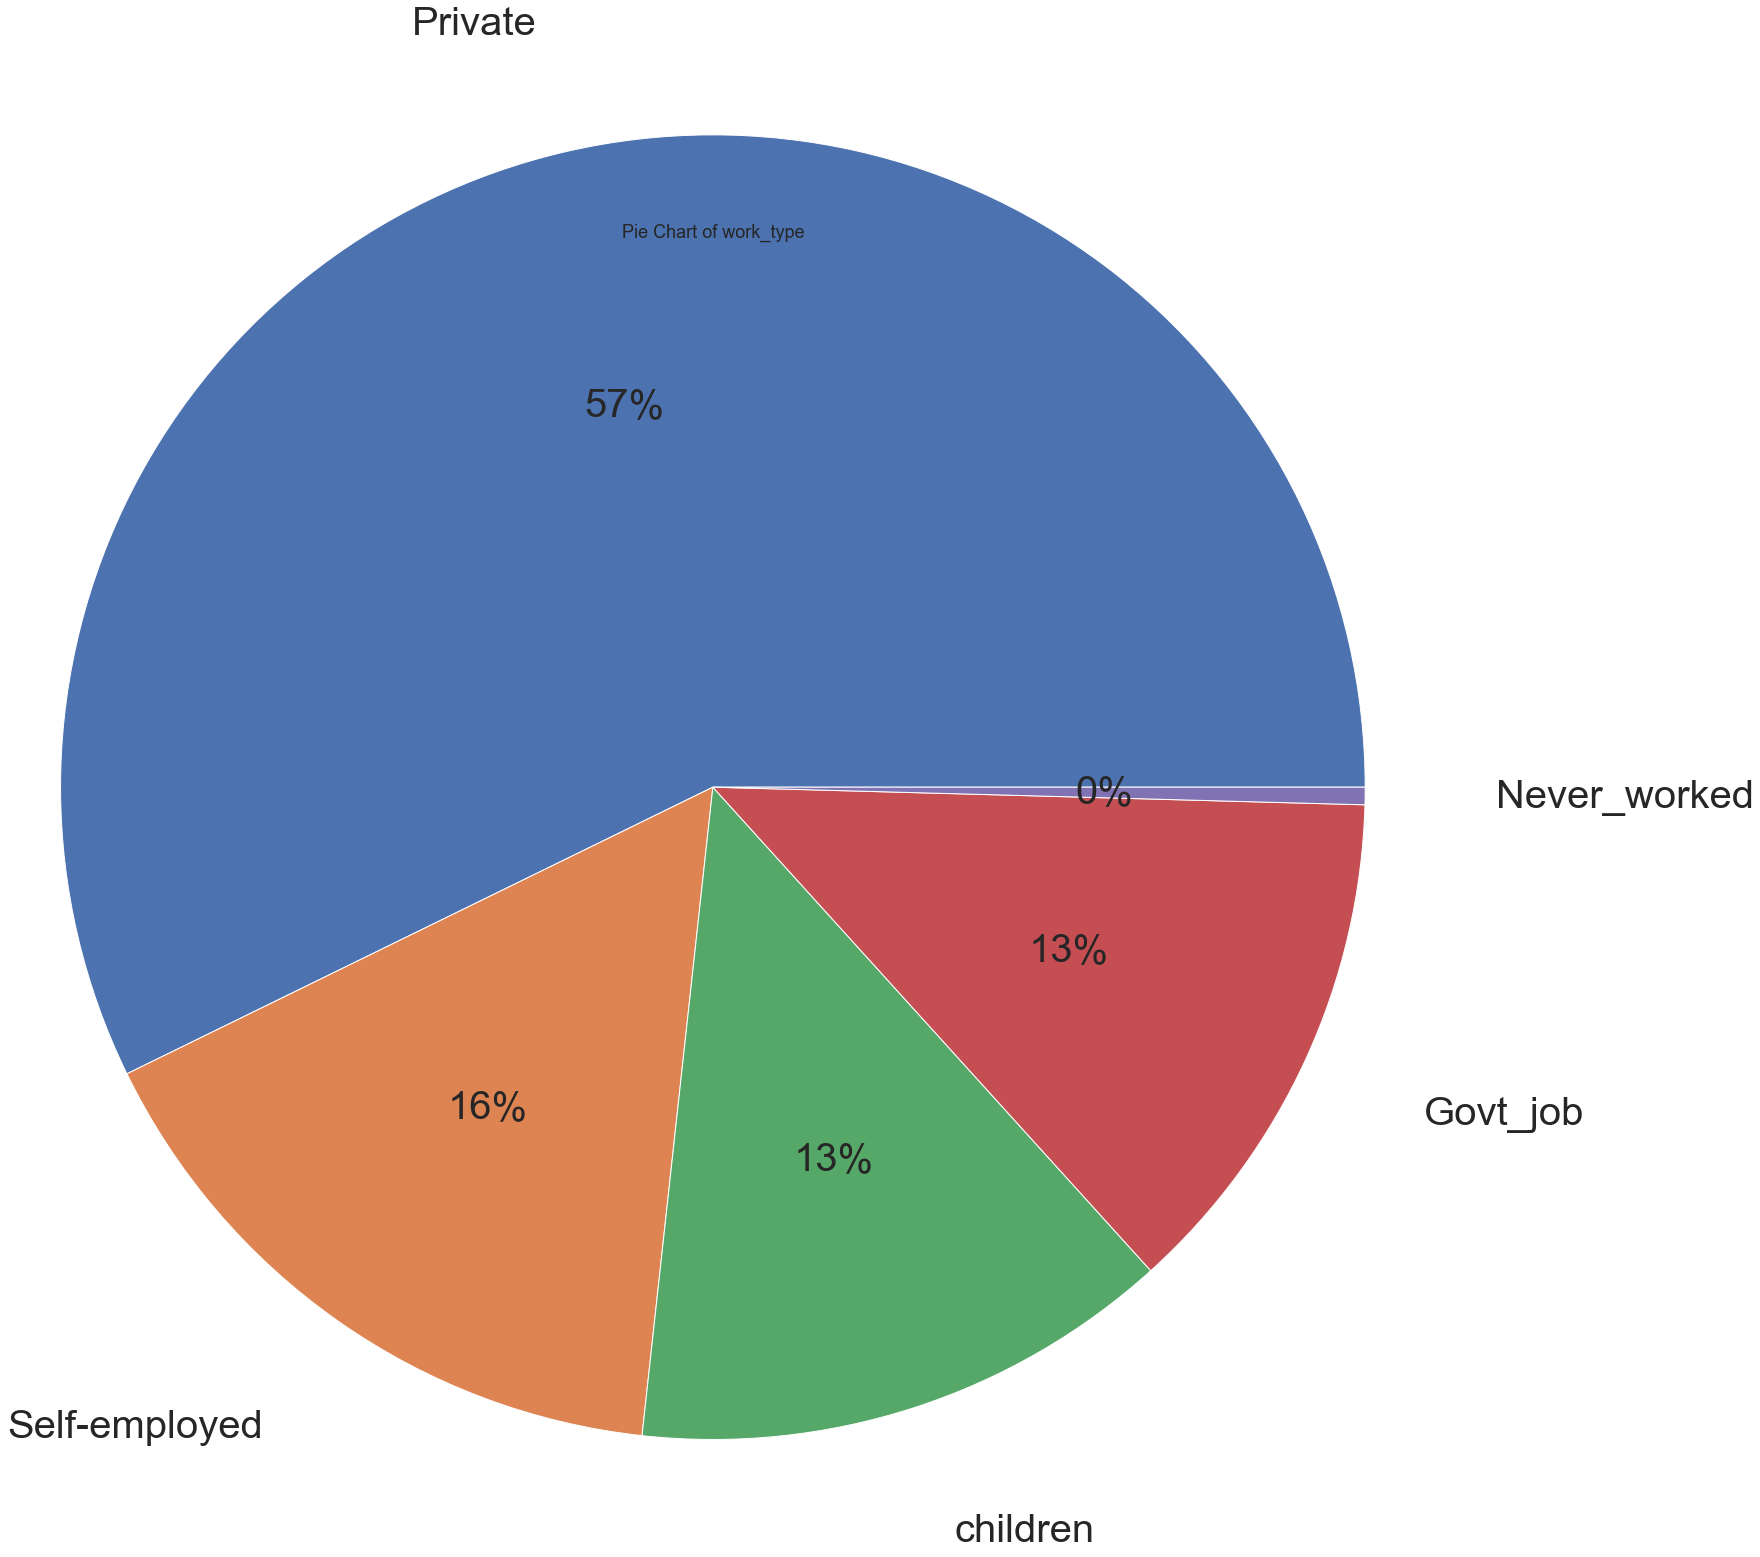

In [45]:
work_types.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of work_type")

In [46]:
# To Present species of Residence_type ::
Residence_types = df["Residence_type"].value_counts()
Residence_types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Residence_type')

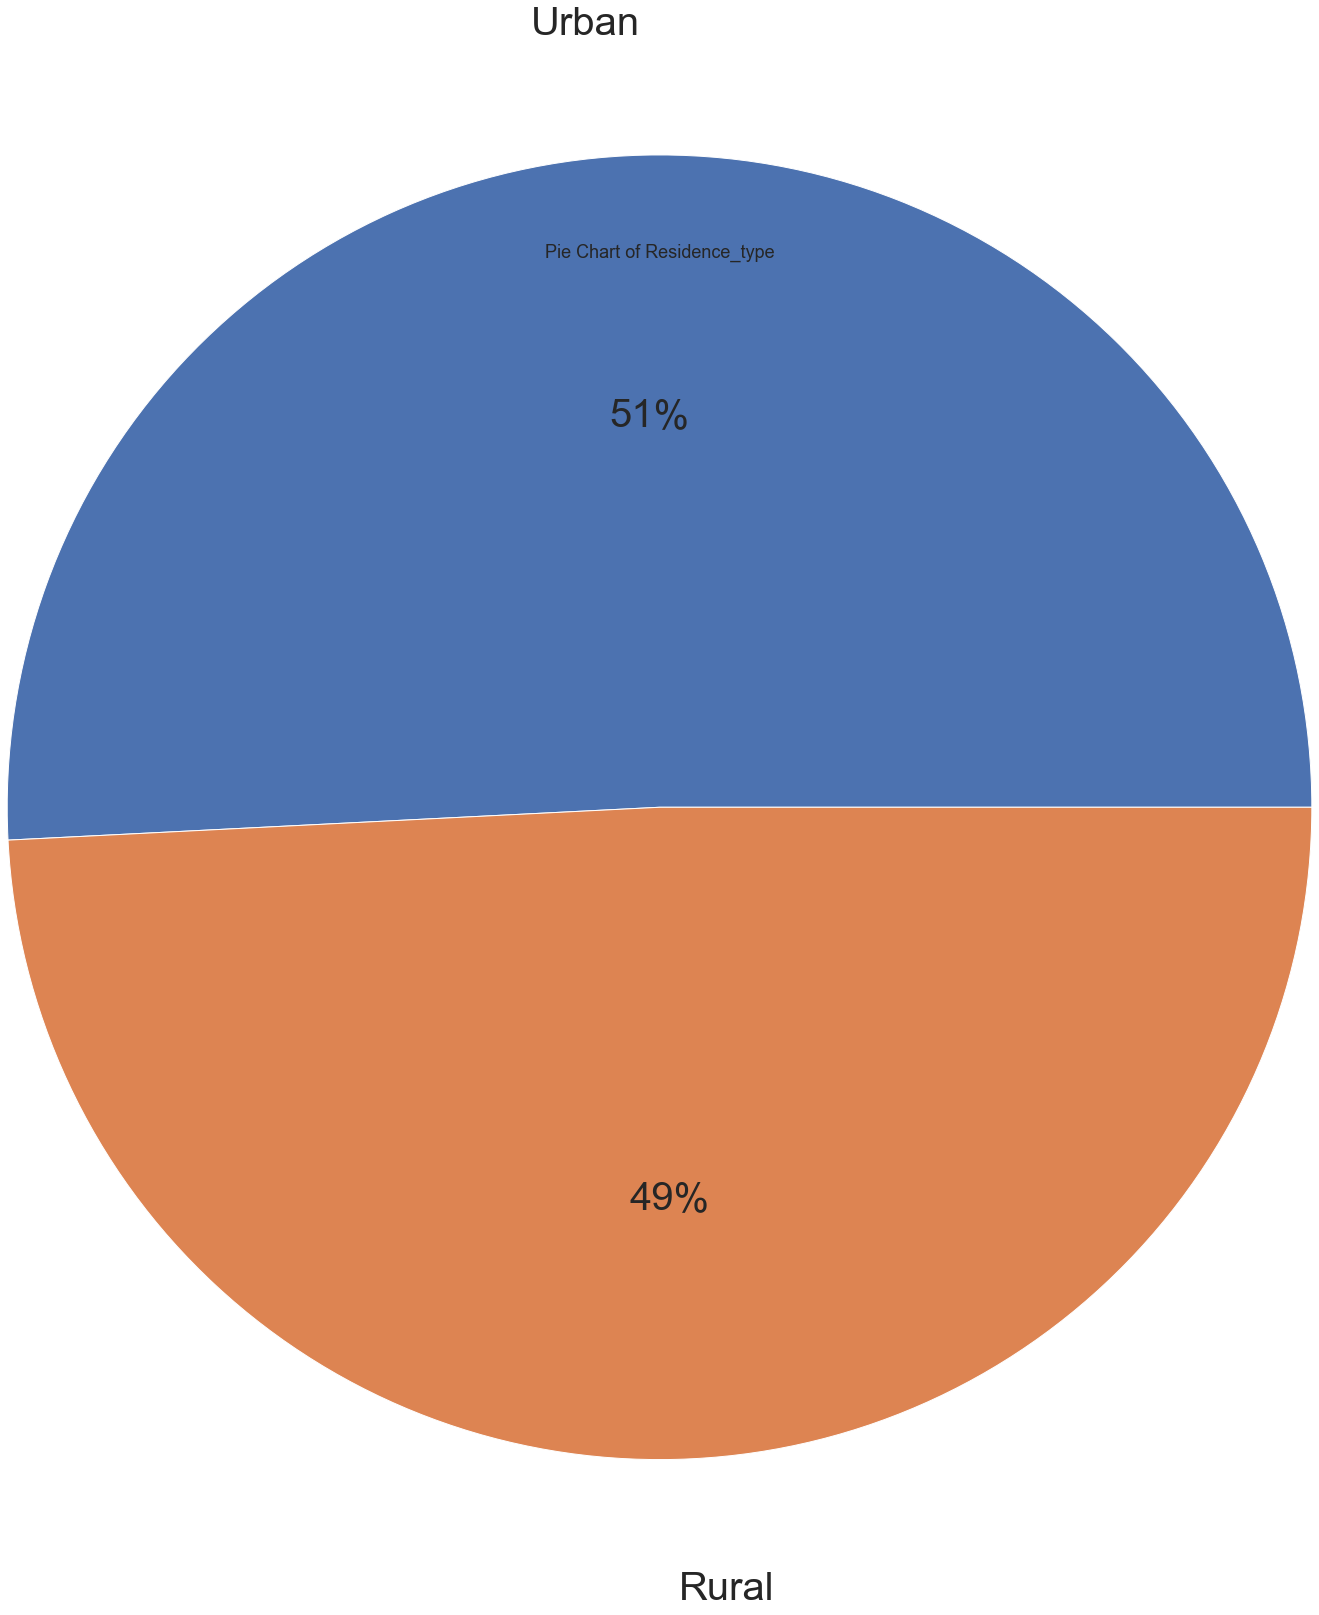

In [47]:
Residence_types.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Residence_type")

In [48]:
# To Present species of smoking_status ::
smoking_statuss = df["smoking_status"].value_counts()
smoking_statuss

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Pie Chart of smoking_status')

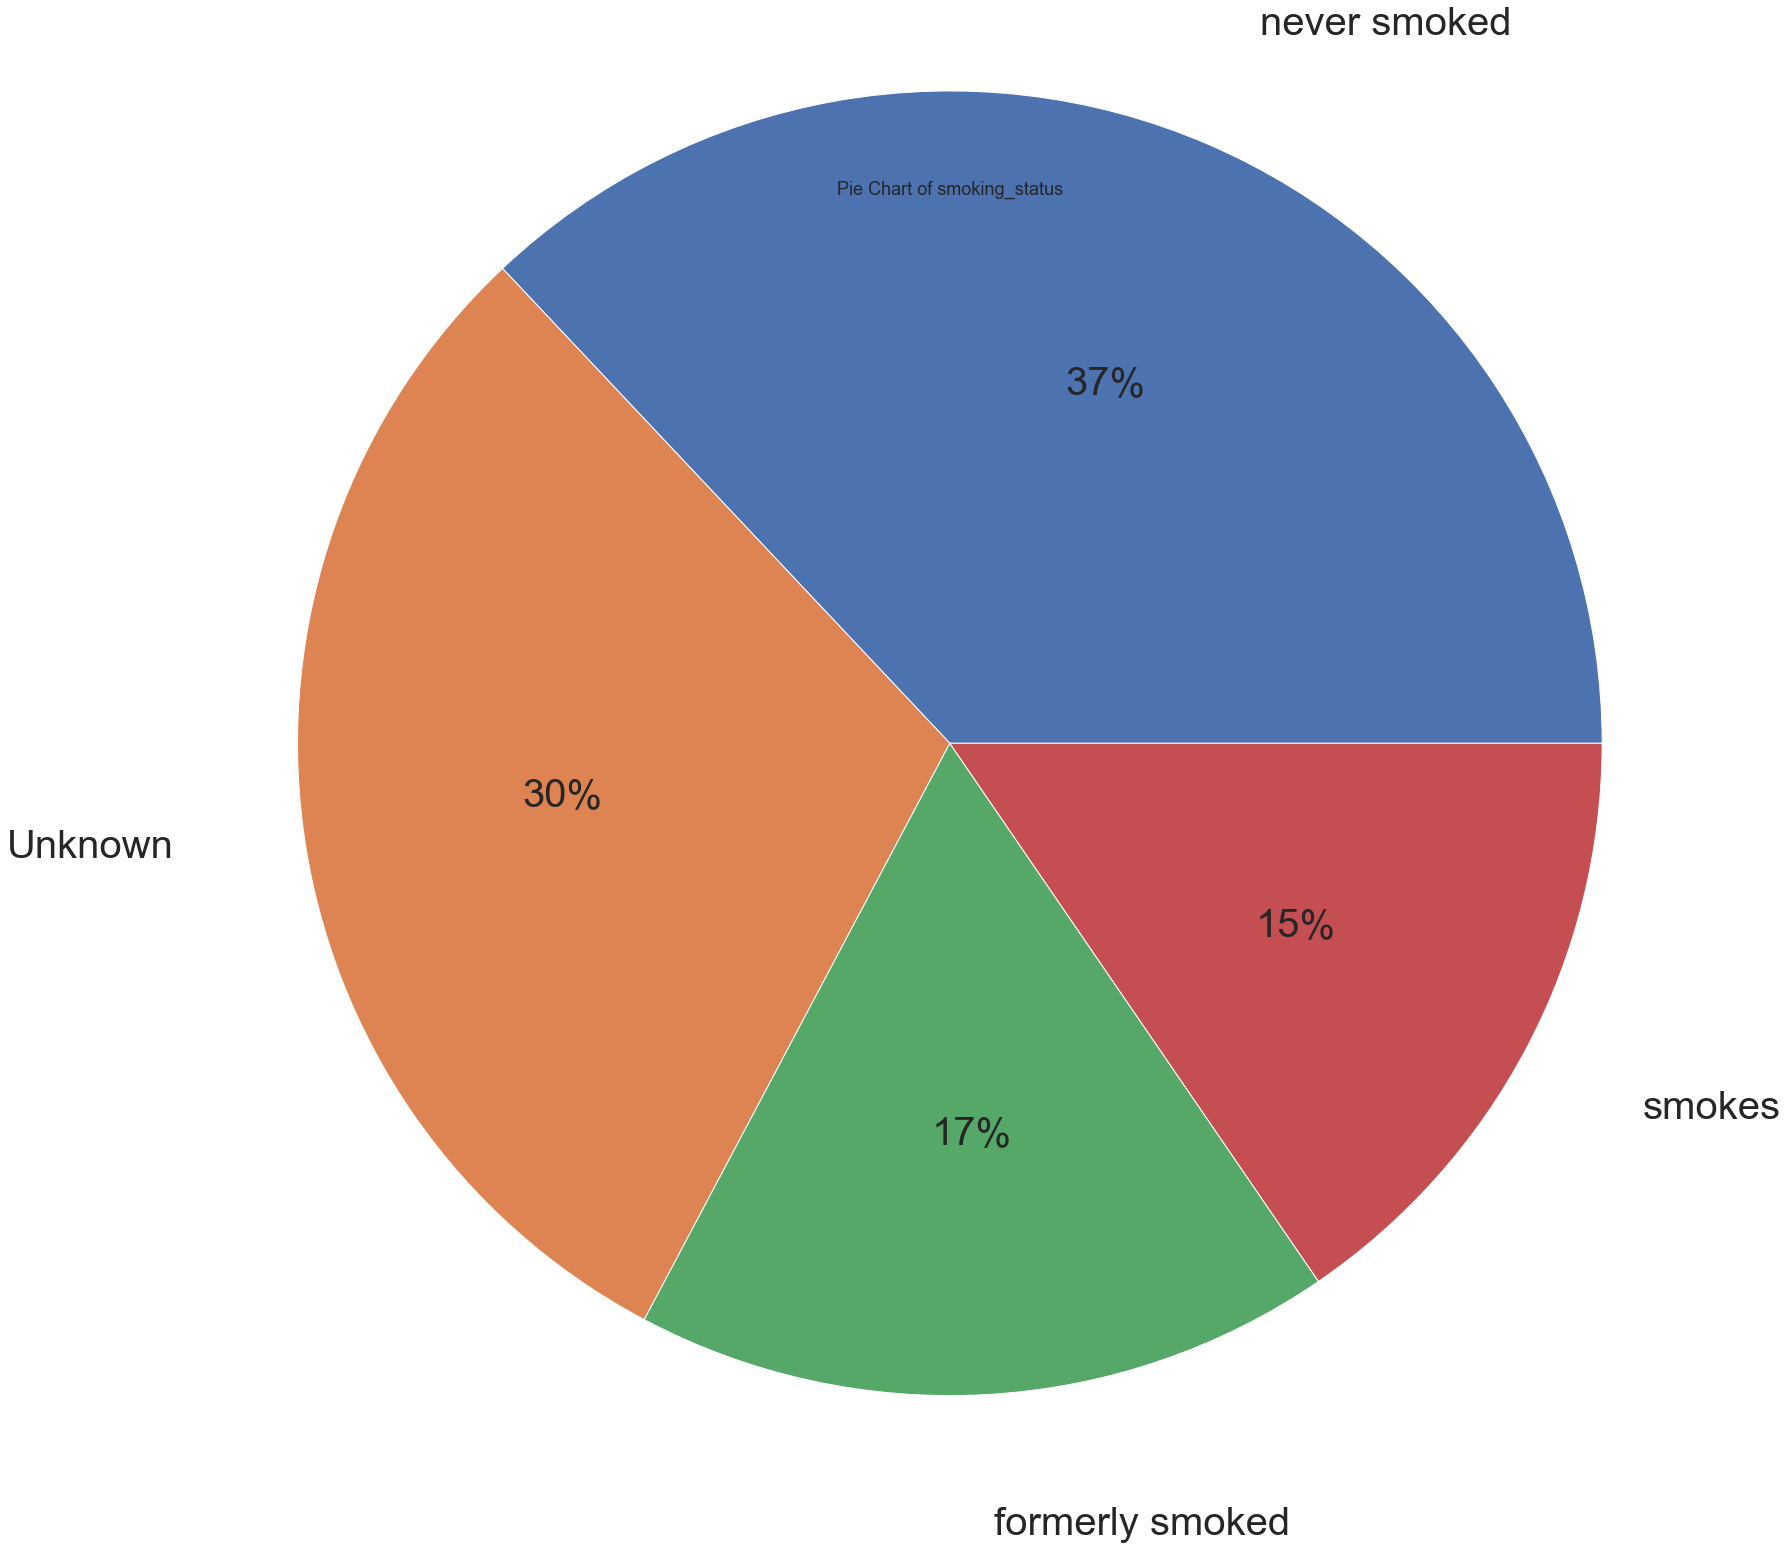

In [49]:
smoking_statuss.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of smoking_status")

In [50]:
# To Present species of stroke ::
strokes = df["stroke"].value_counts()
strokes

0    4861
1     249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Pie Chart of stroke')

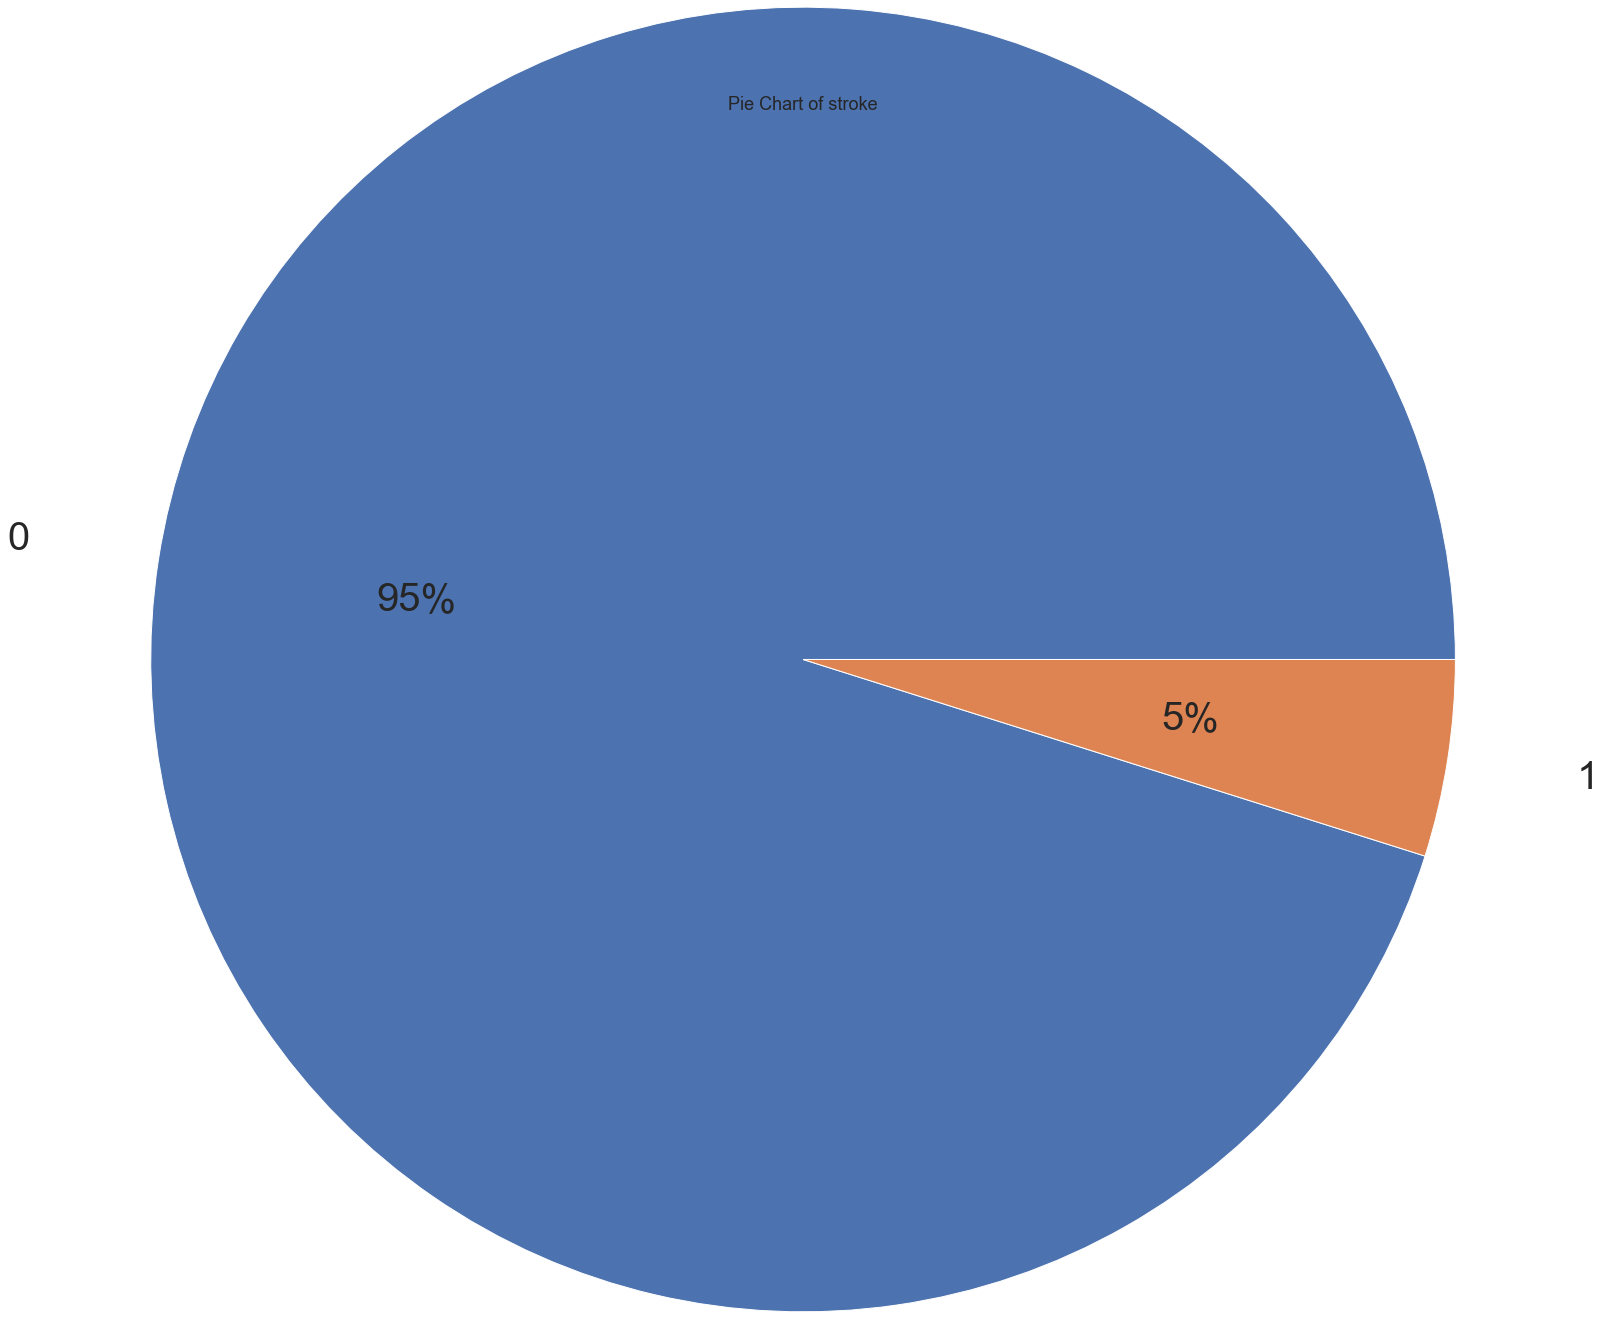

In [51]:
strokes.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of stroke")

In [52]:
# To Present species of heart_disease ::
heart_diseases = df["heart_disease"].value_counts()
heart_diseases

0    4834
1     276
Name: heart_disease, dtype: int64

Text(0.5, 1.0, 'Pie Chart of heart_disease')

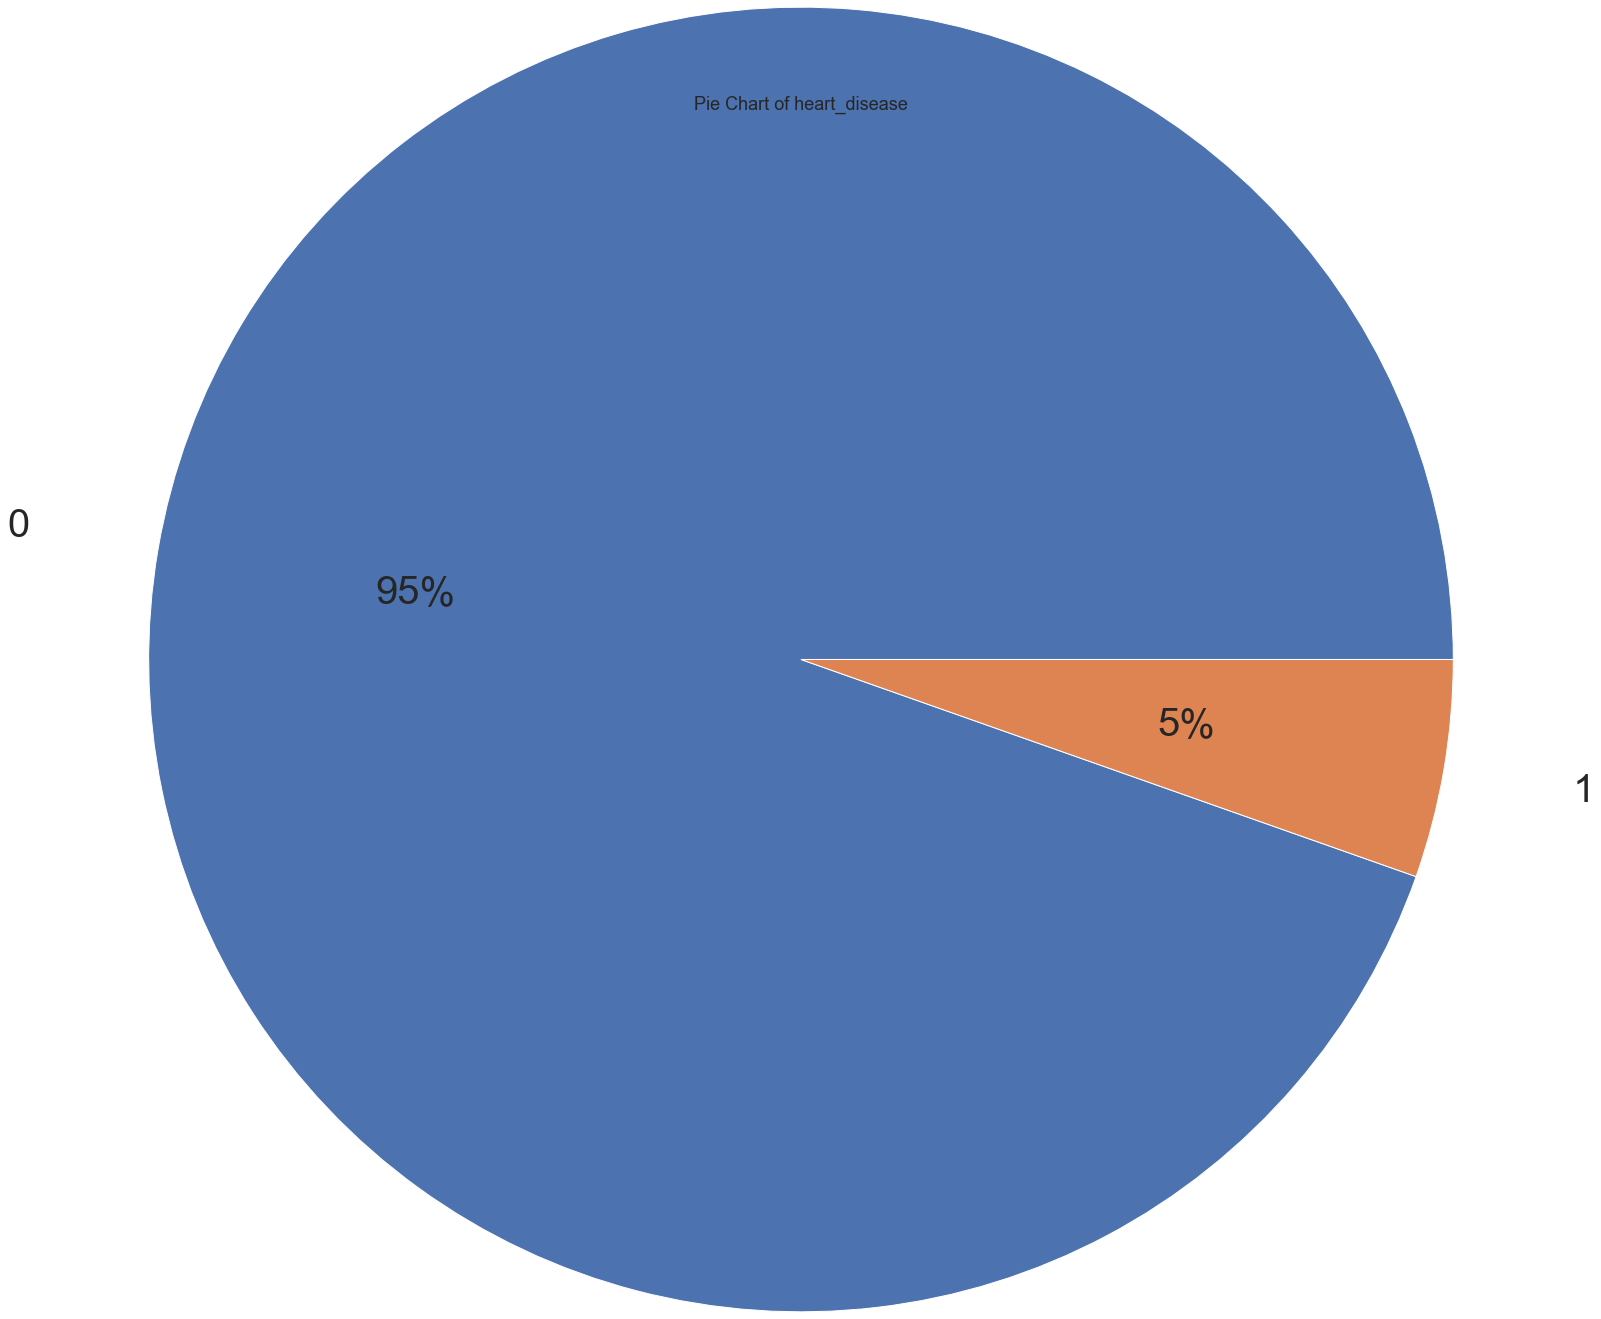

In [53]:
heart_diseases.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of heart_disease")

In [54]:
# To Present species of hypertension ::
hypertensions = df["hypertension"].value_counts()
hypertensions

0    4612
1     498
Name: hypertension, dtype: int64

Text(0.5, 1.0, 'Pie Chart of hypertension')

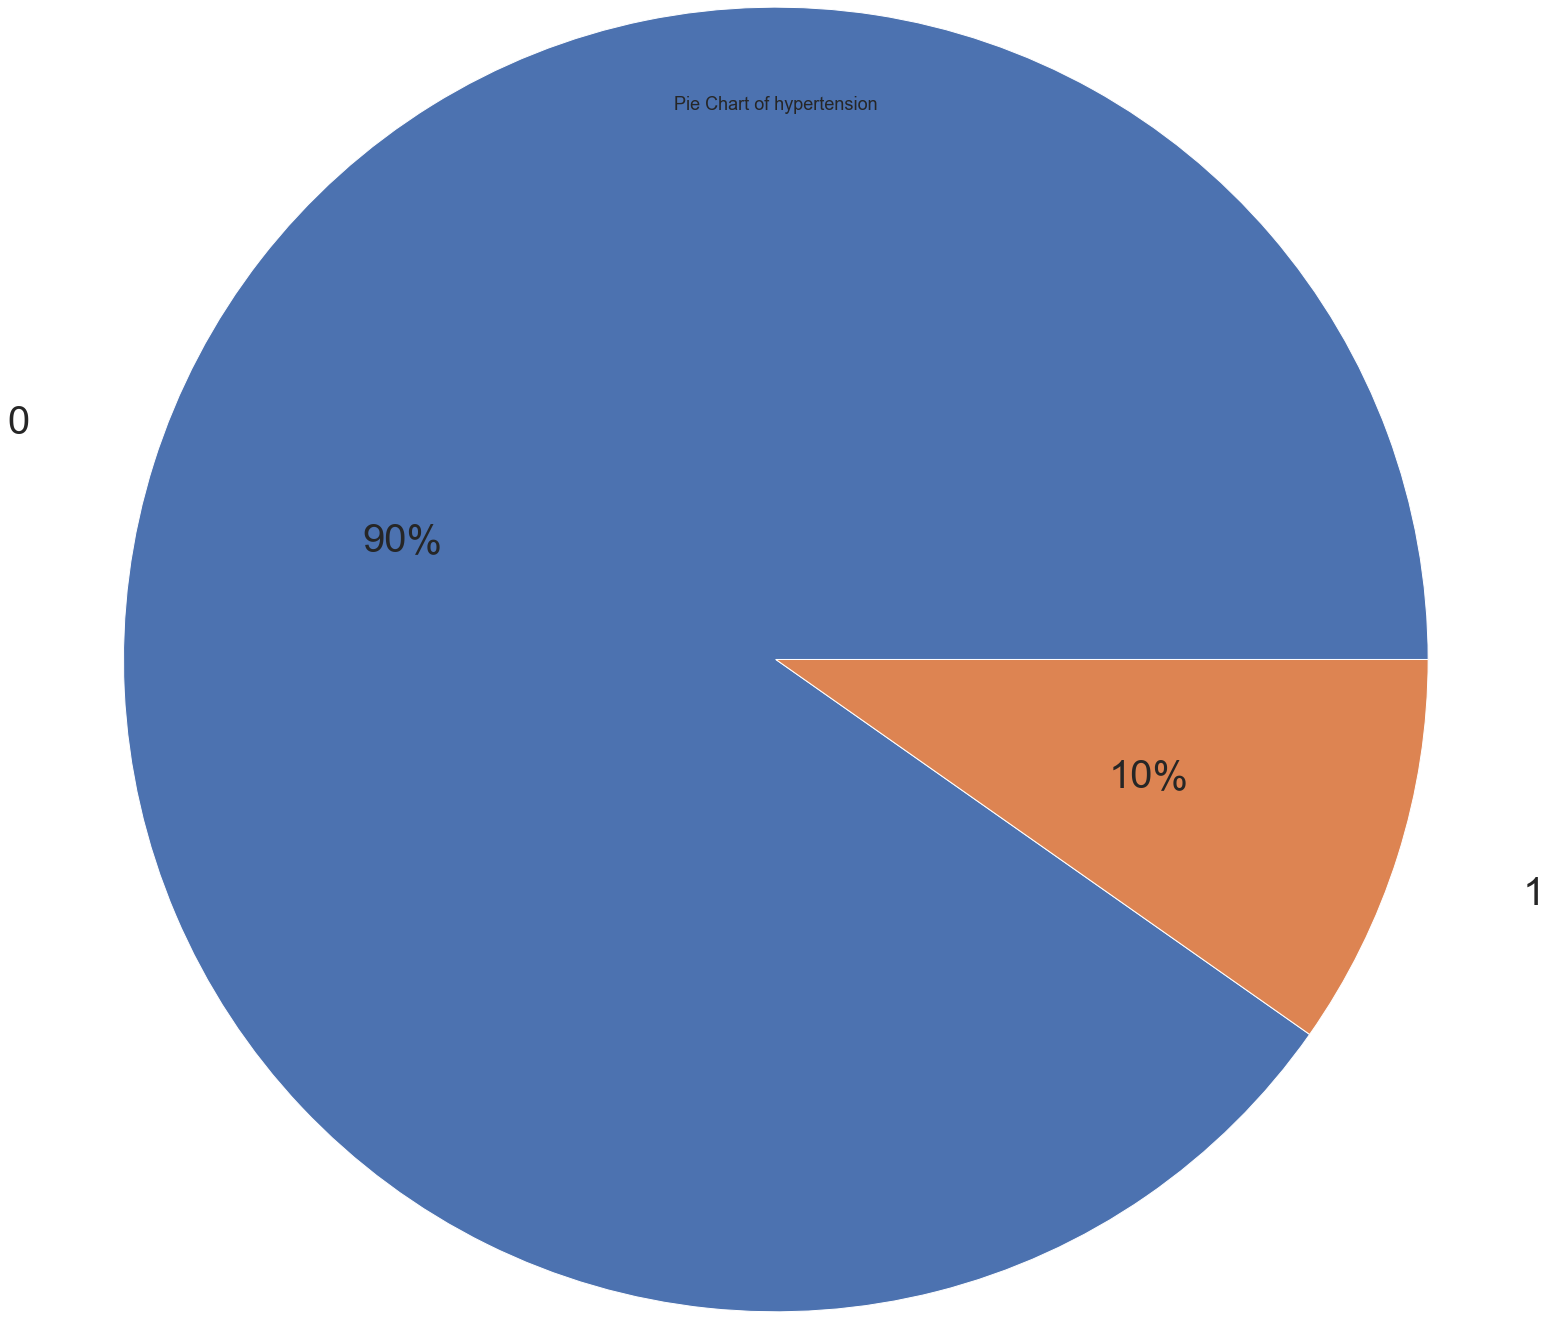

In [55]:
hypertensions.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of hypertension")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(0.5, 1.0, 'Distribution Plot of age')

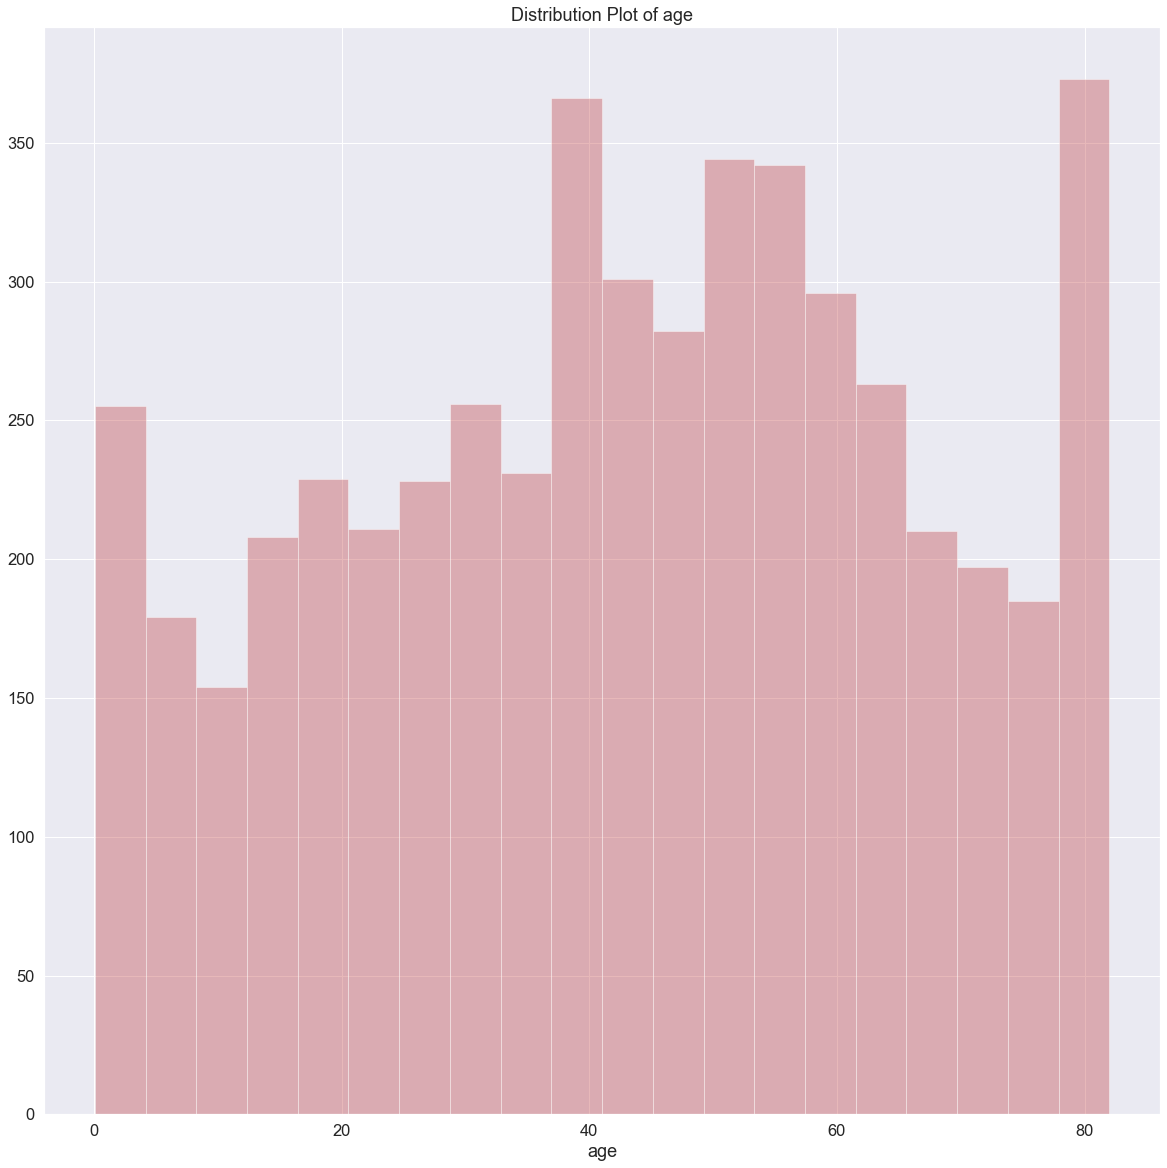

In [57]:
sns.distplot(df["age"] , kde=False , color="r")
plt.title("Distribution Plot of age")

Text(0.5, 1.0, 'Kde Plot of age')

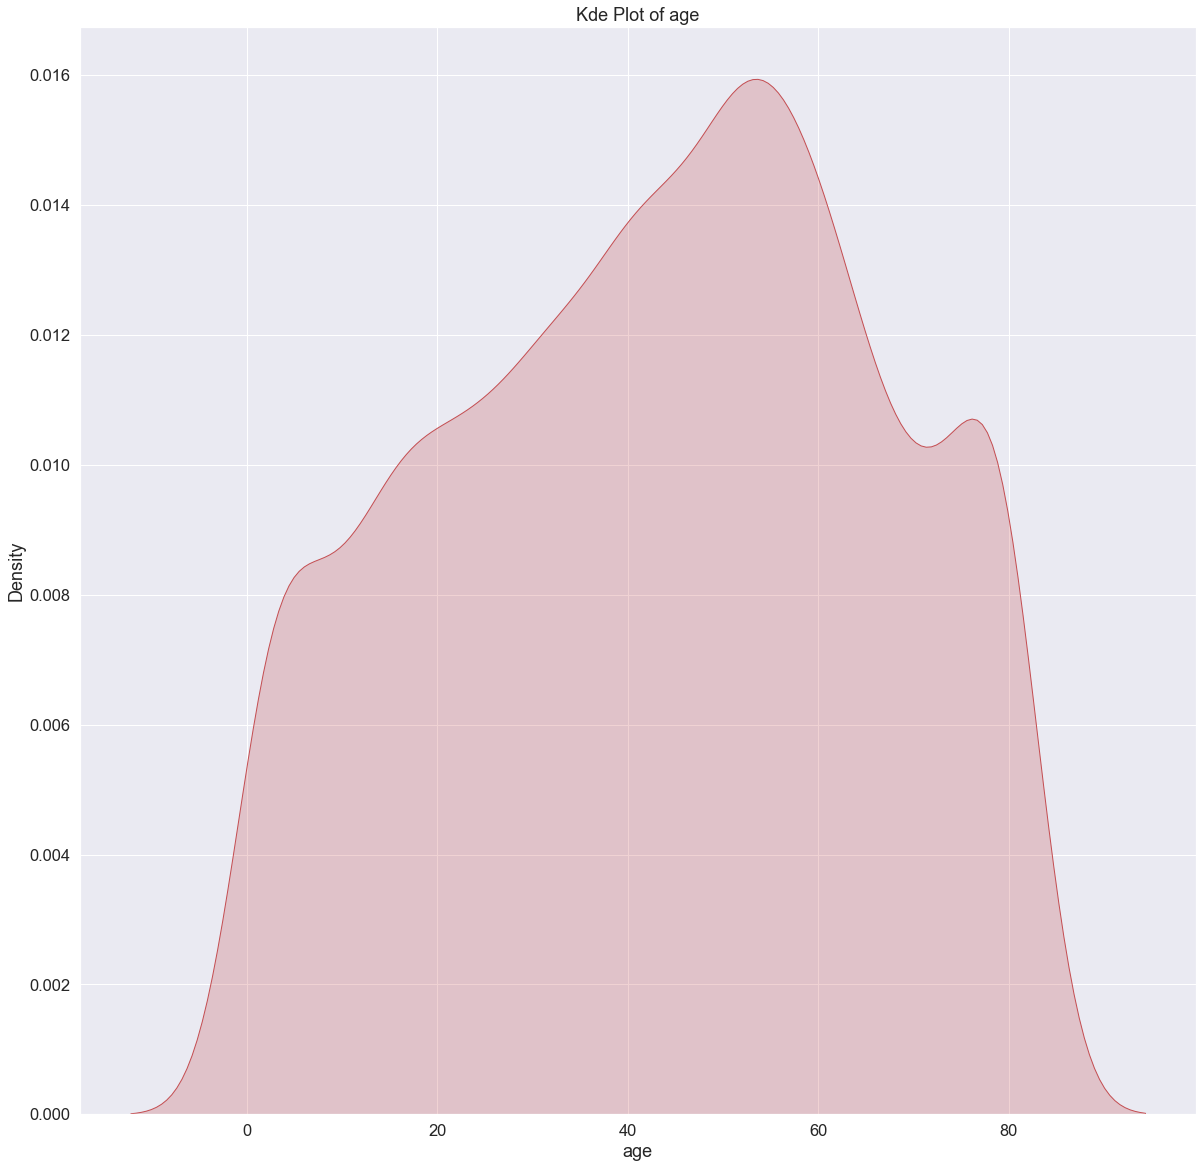

In [58]:
sns.kdeplot(df["age"] , shade=True , color="r")
plt.title("Kde Plot of age")

Text(0.5, 1.0, 'Distribution Plot of avg_glucose_level')

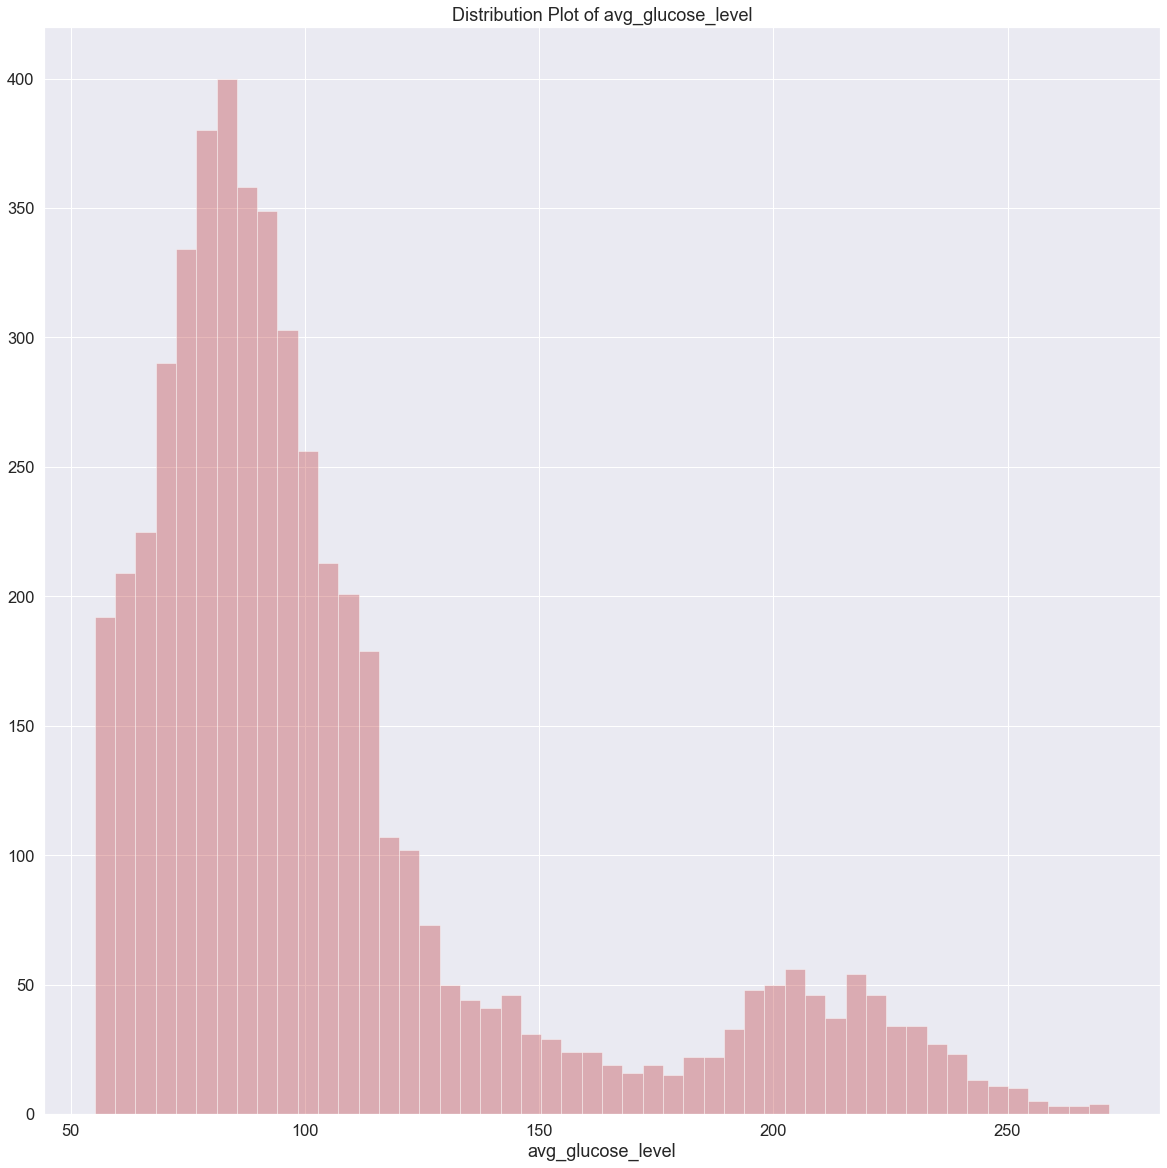

In [59]:
sns.distplot(df["avg_glucose_level"] , kde=False , color="r")
plt.title("Distribution Plot of avg_glucose_level")

Text(0.5, 1.0, 'Kde Plot of avg_glucose_level')

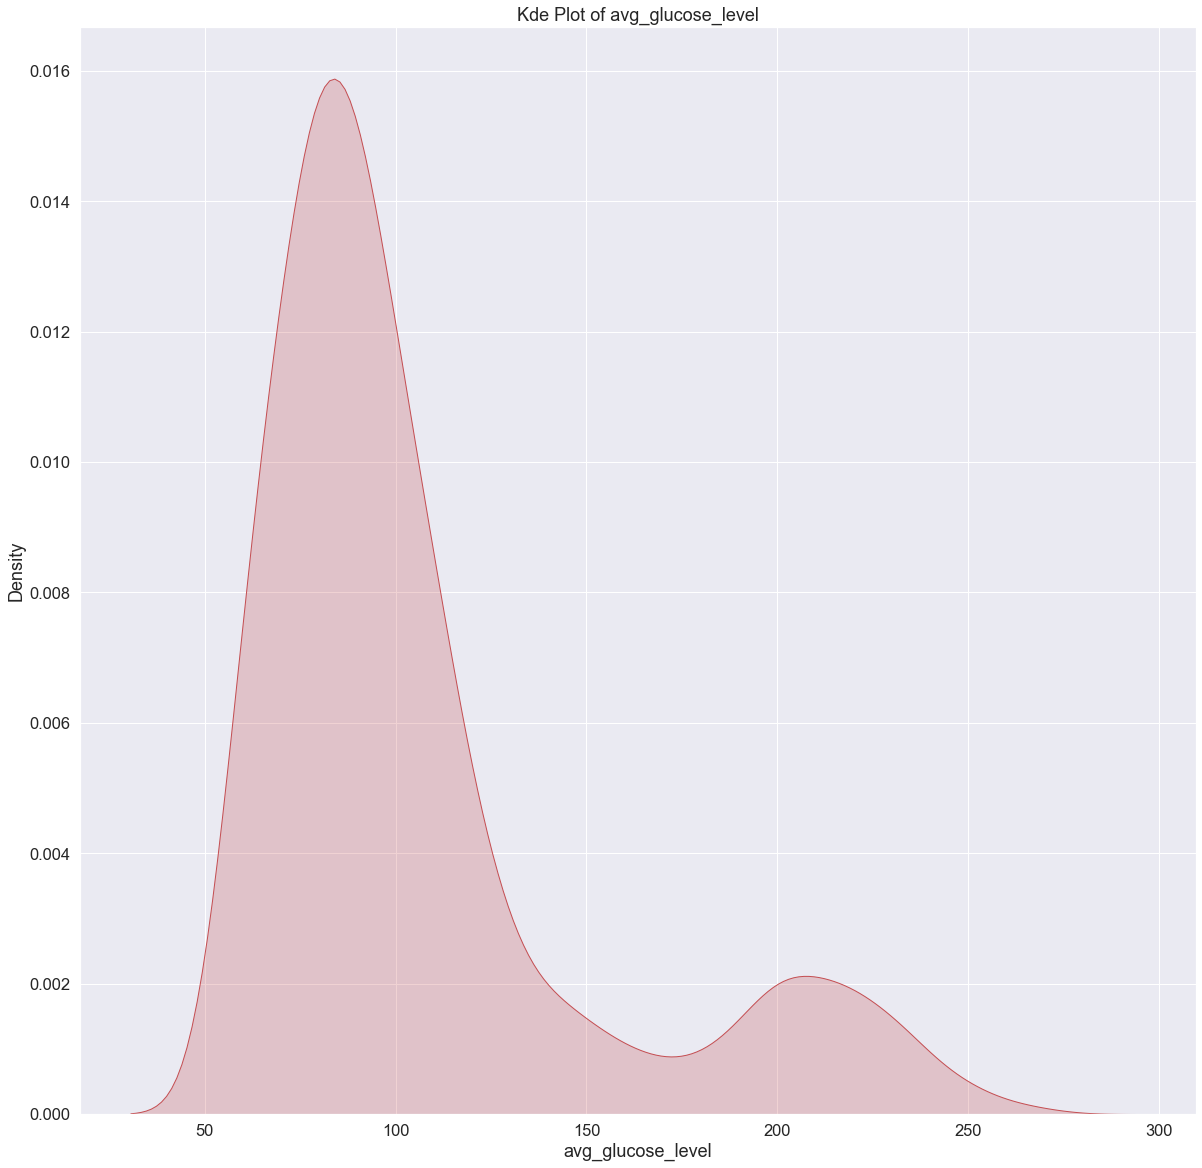

In [60]:
sns.kdeplot(df["avg_glucose_level"] , shade=True , color="r")
plt.title("Kde Plot of avg_glucose_level")

Text(0.5, 1.0, 'Distribution Plot of bmi')

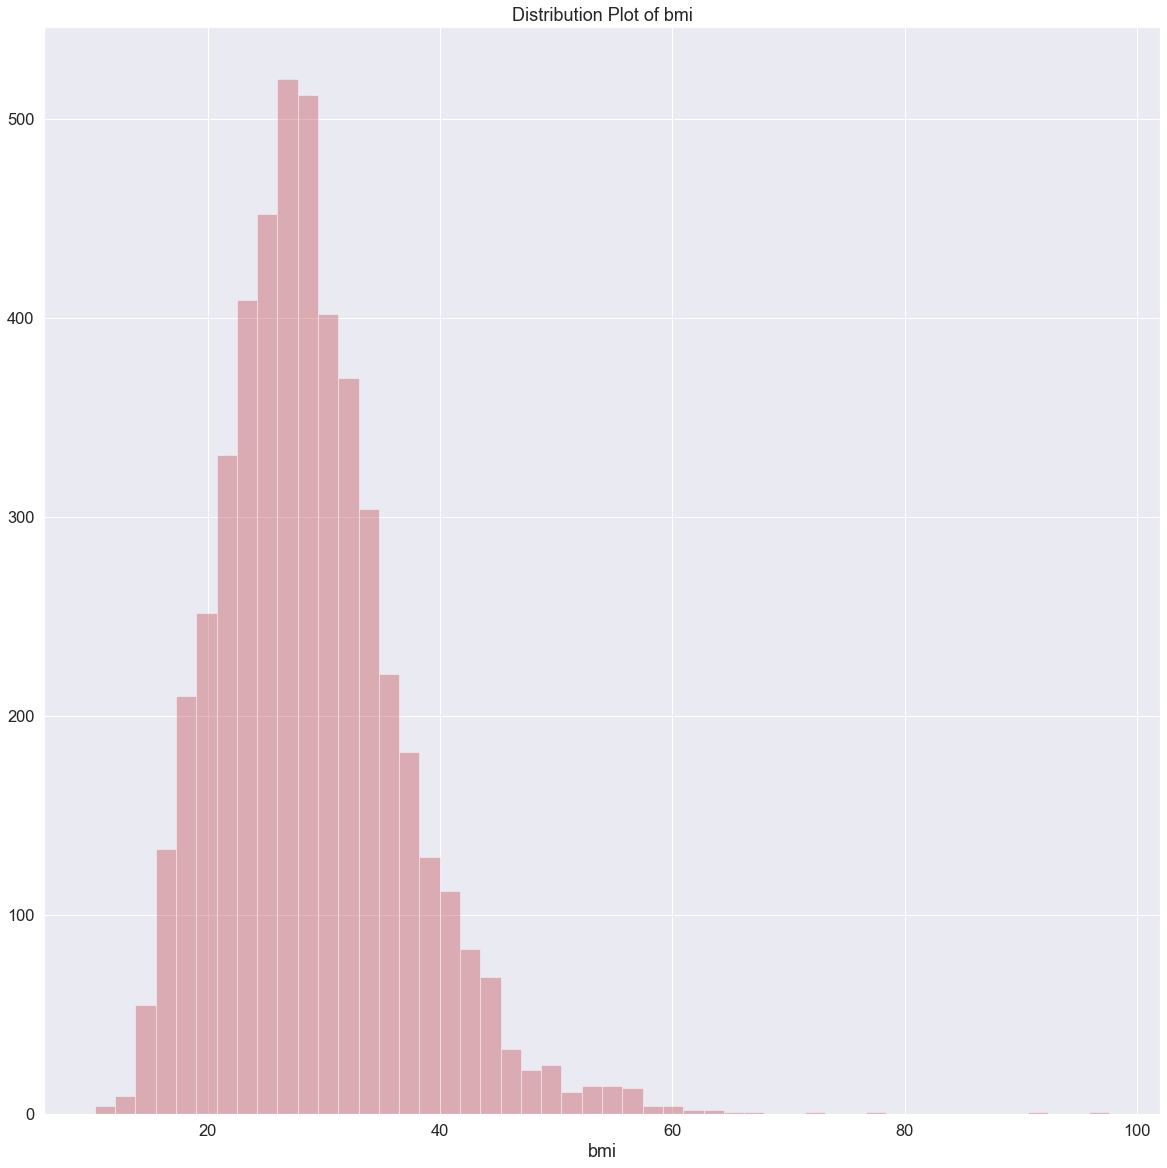

In [61]:
sns.distplot(df["bmi"] , kde=False , color="r")
plt.title("Distribution Plot of bmi")

Text(0.5, 1.0, 'Kde Plot of bmi')

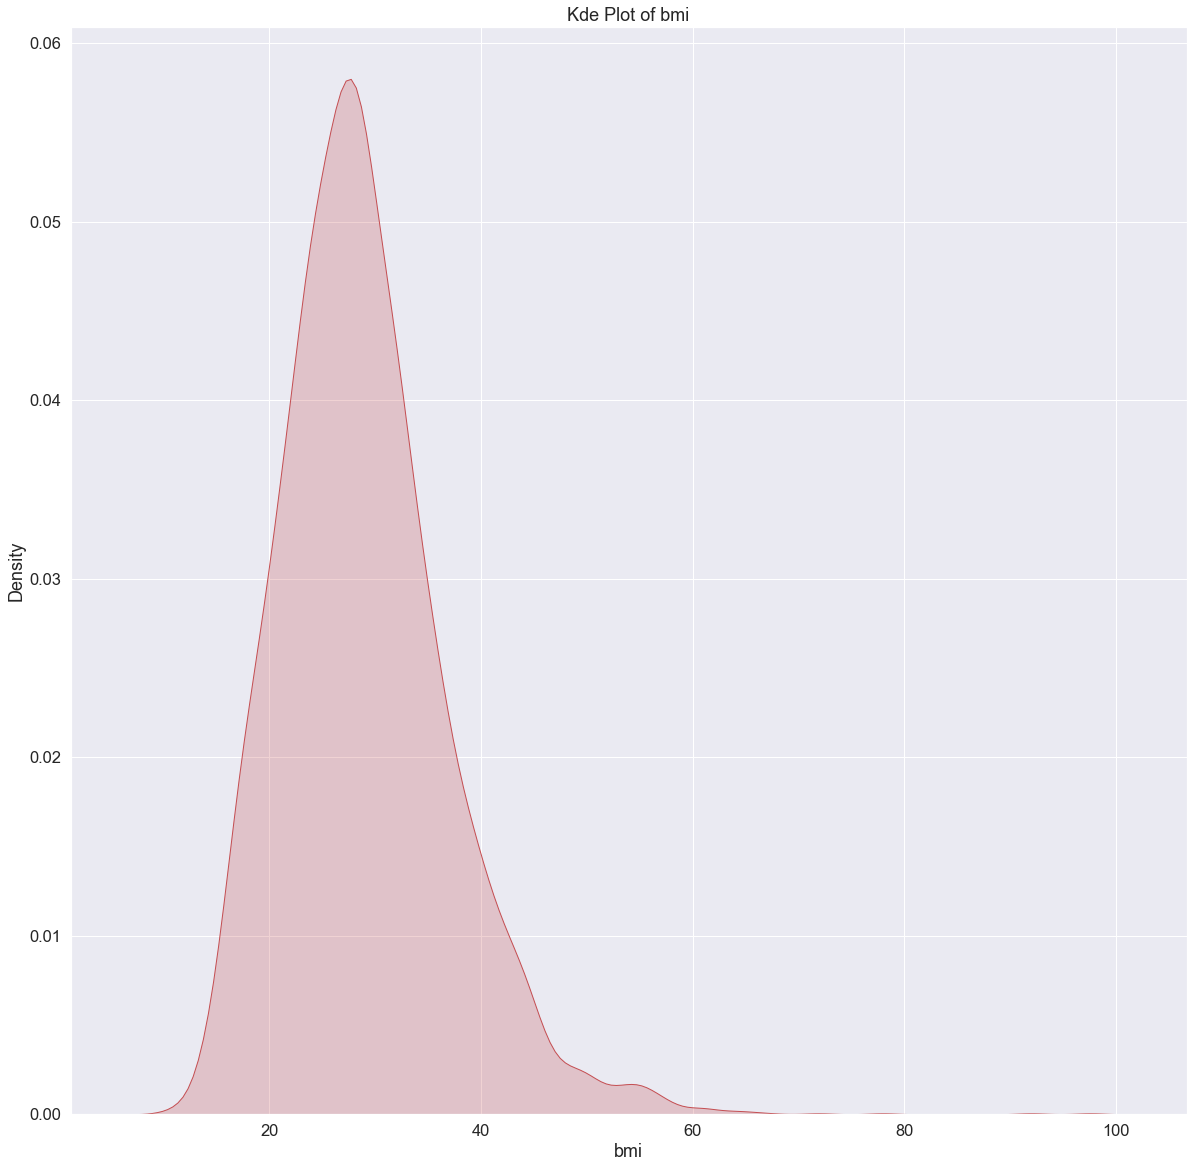

In [62]:
sns.kdeplot(df["bmi"] , shade=True , color="r")
plt.title("Kde Plot of bmi")

Text(0.5, 1.0, 'Distribution Plot of hypertension')

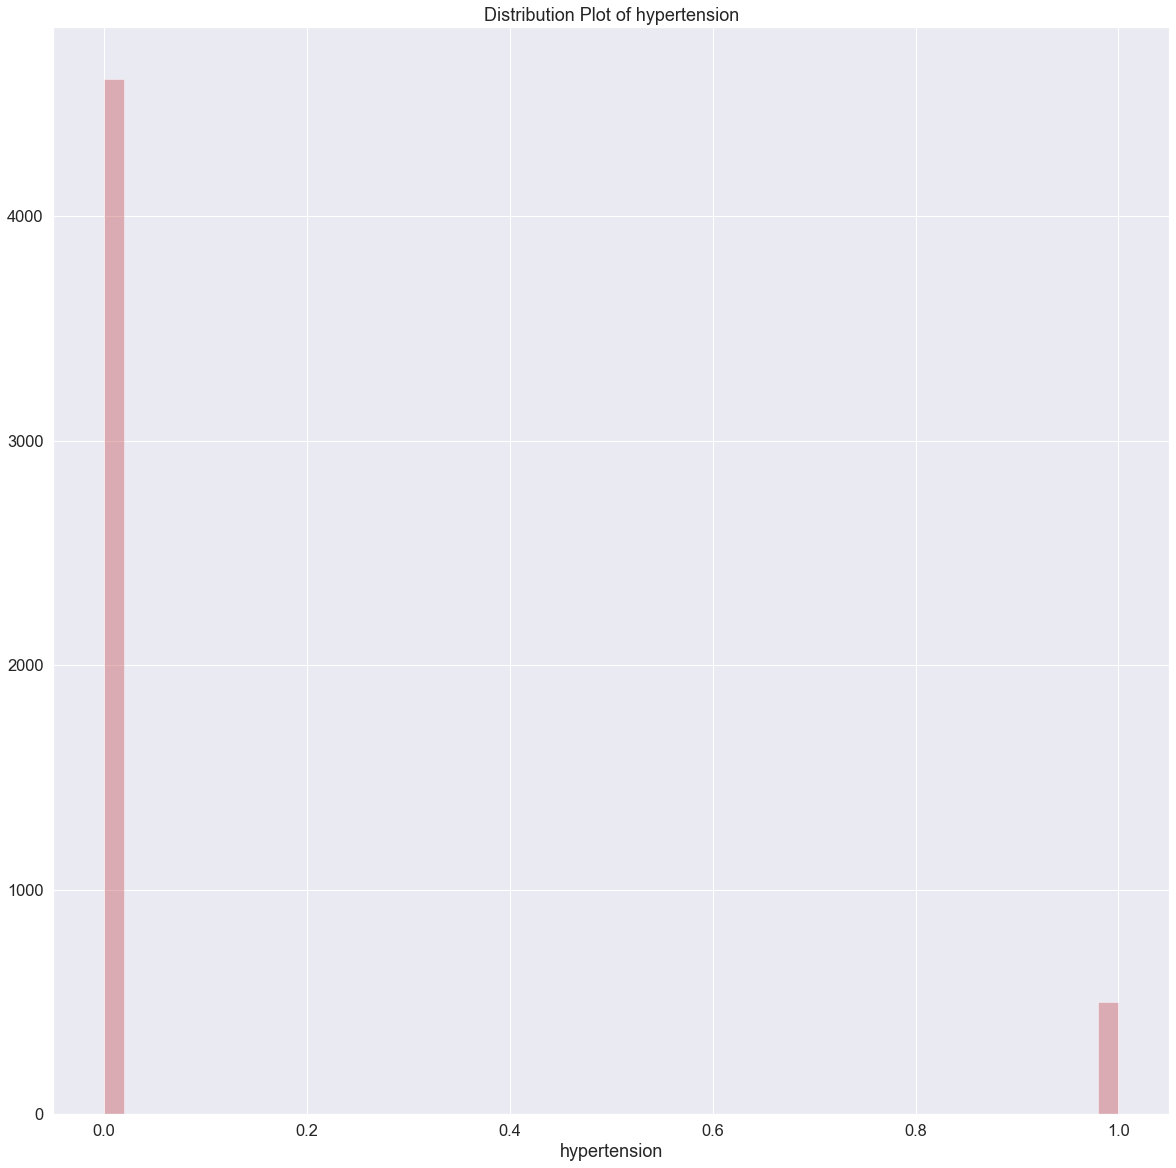

In [63]:
sns.distplot(df["hypertension"] , kde=False , color="r")
plt.title("Distribution Plot of hypertension")

Text(0.5, 1.0, 'Kde Plot of hypertension')

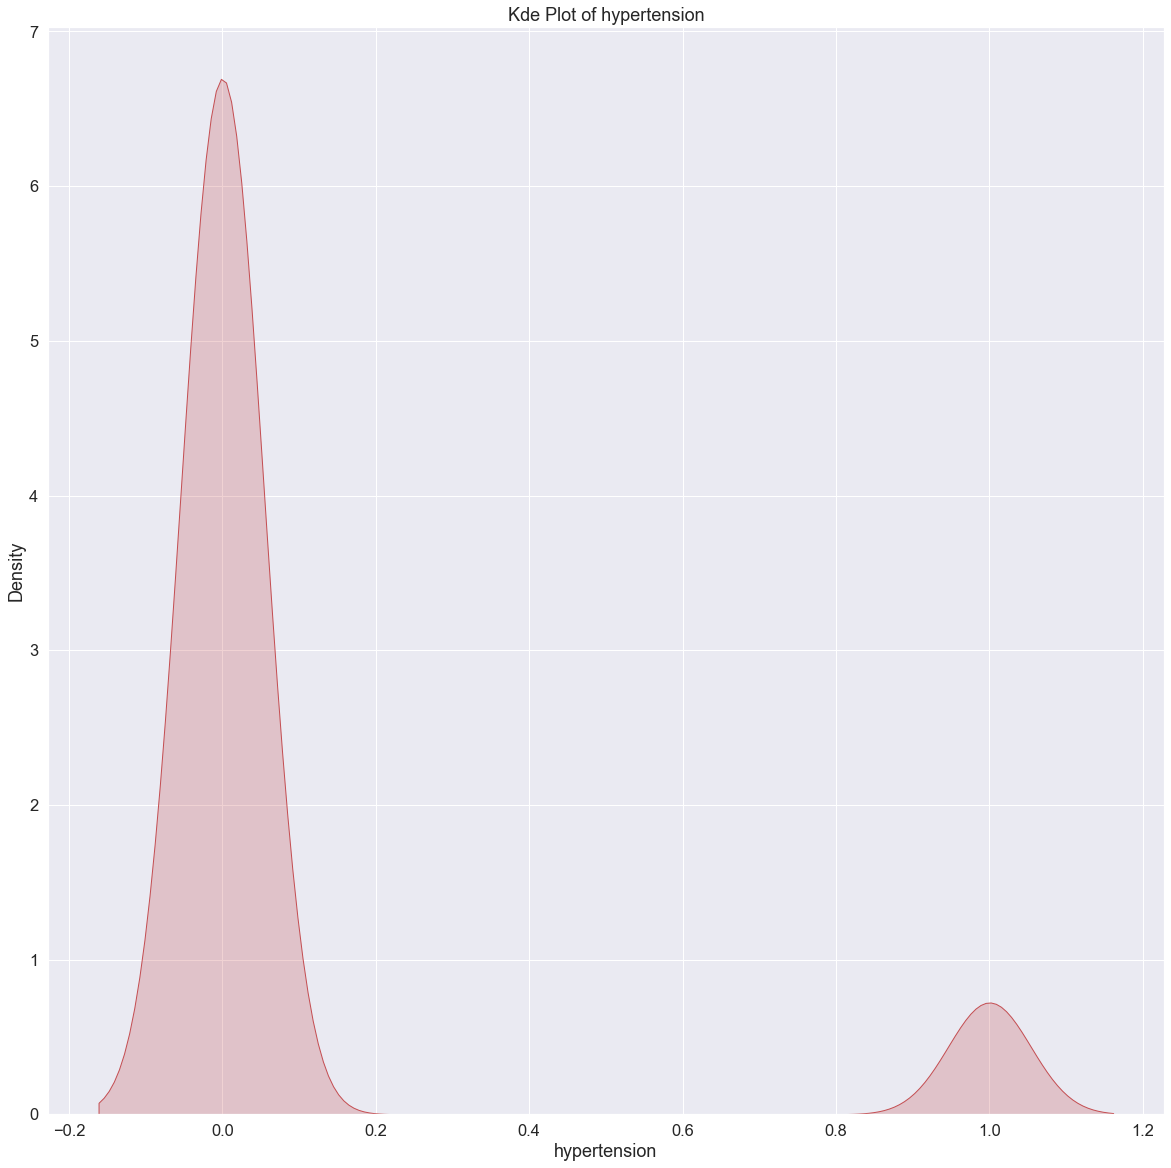

In [64]:
sns.kdeplot(df["hypertension"] , shade=True , color="r")
plt.title("Kde Plot of hypertension")

Text(0.5, 1.0, 'Distribution Plot of heart_disease')

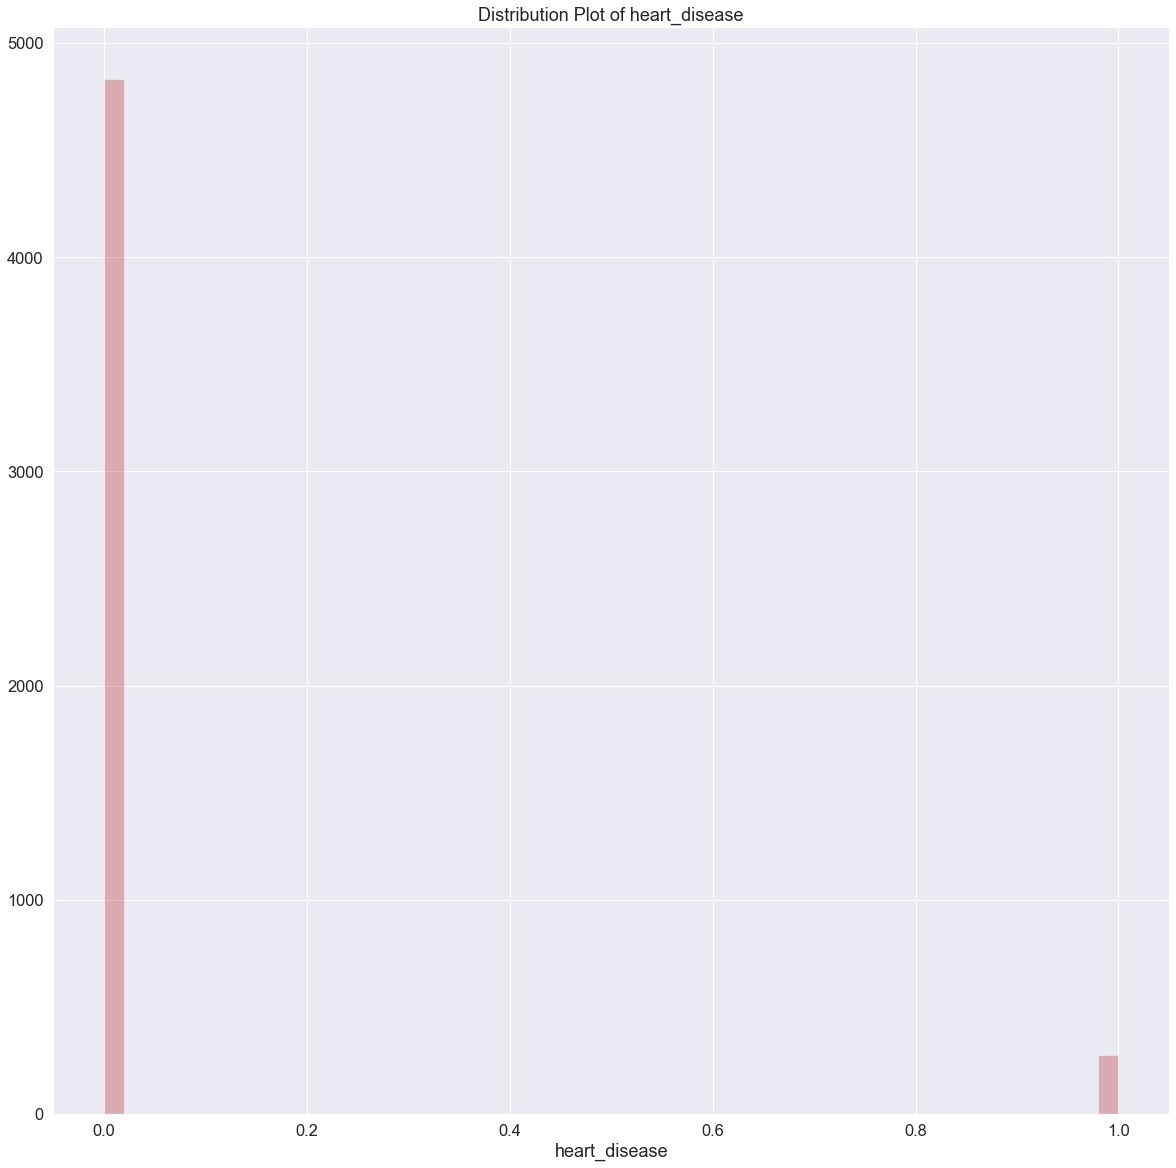

In [65]:
sns.distplot(df["heart_disease"] , kde=False , color="r")
plt.title("Distribution Plot of heart_disease")

Text(0.5, 1.0, 'Kde Plot of heart_disease')

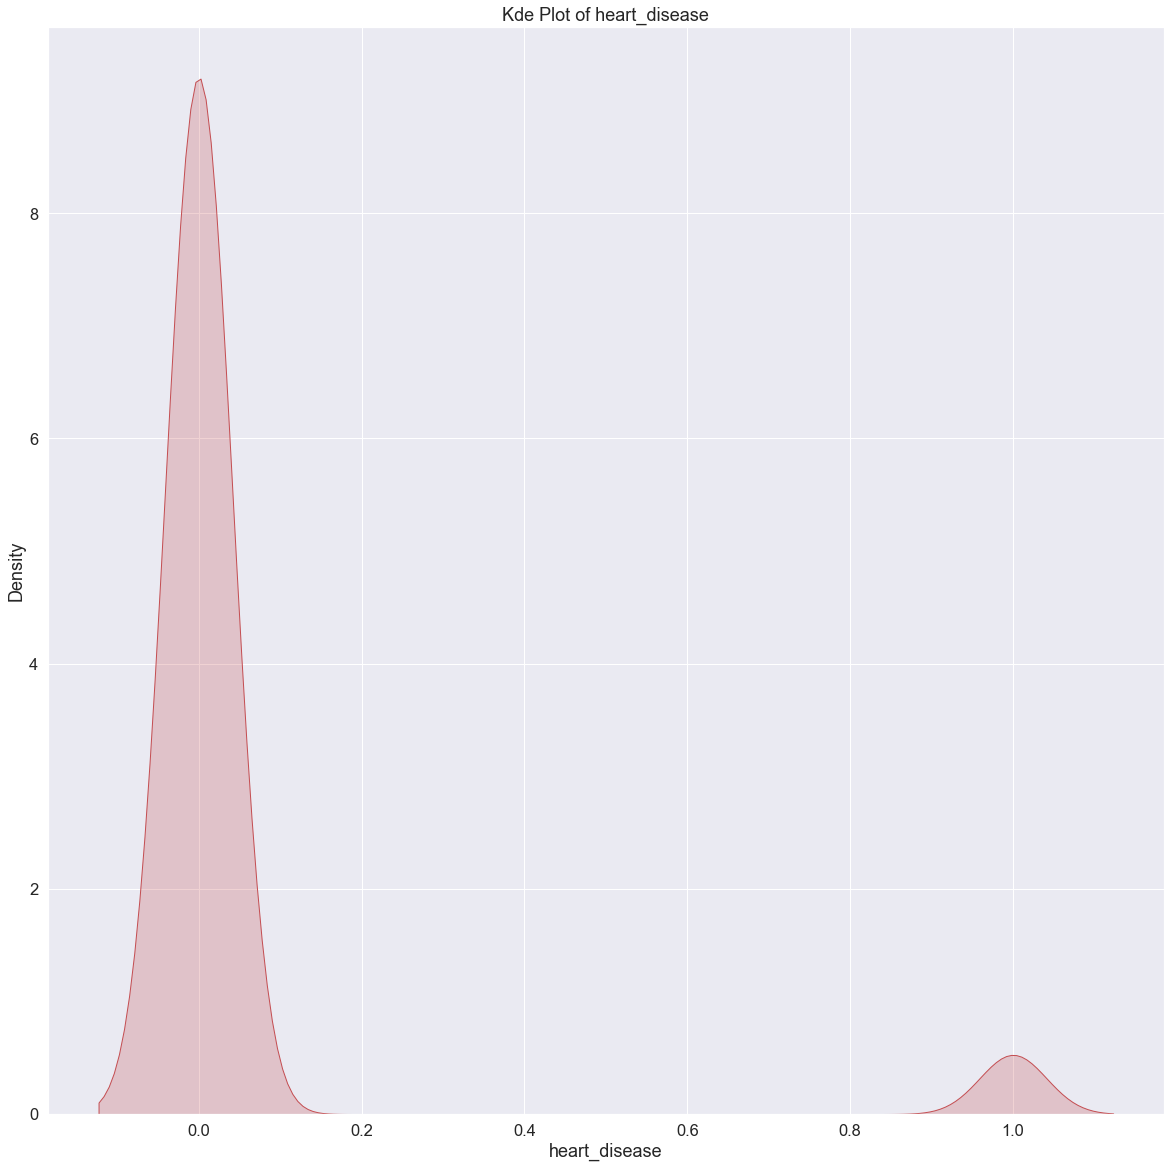

In [66]:
sns.kdeplot(df["heart_disease"] , shade=True , color="r")
plt.title("Kde Plot of heart_disease")

In [67]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

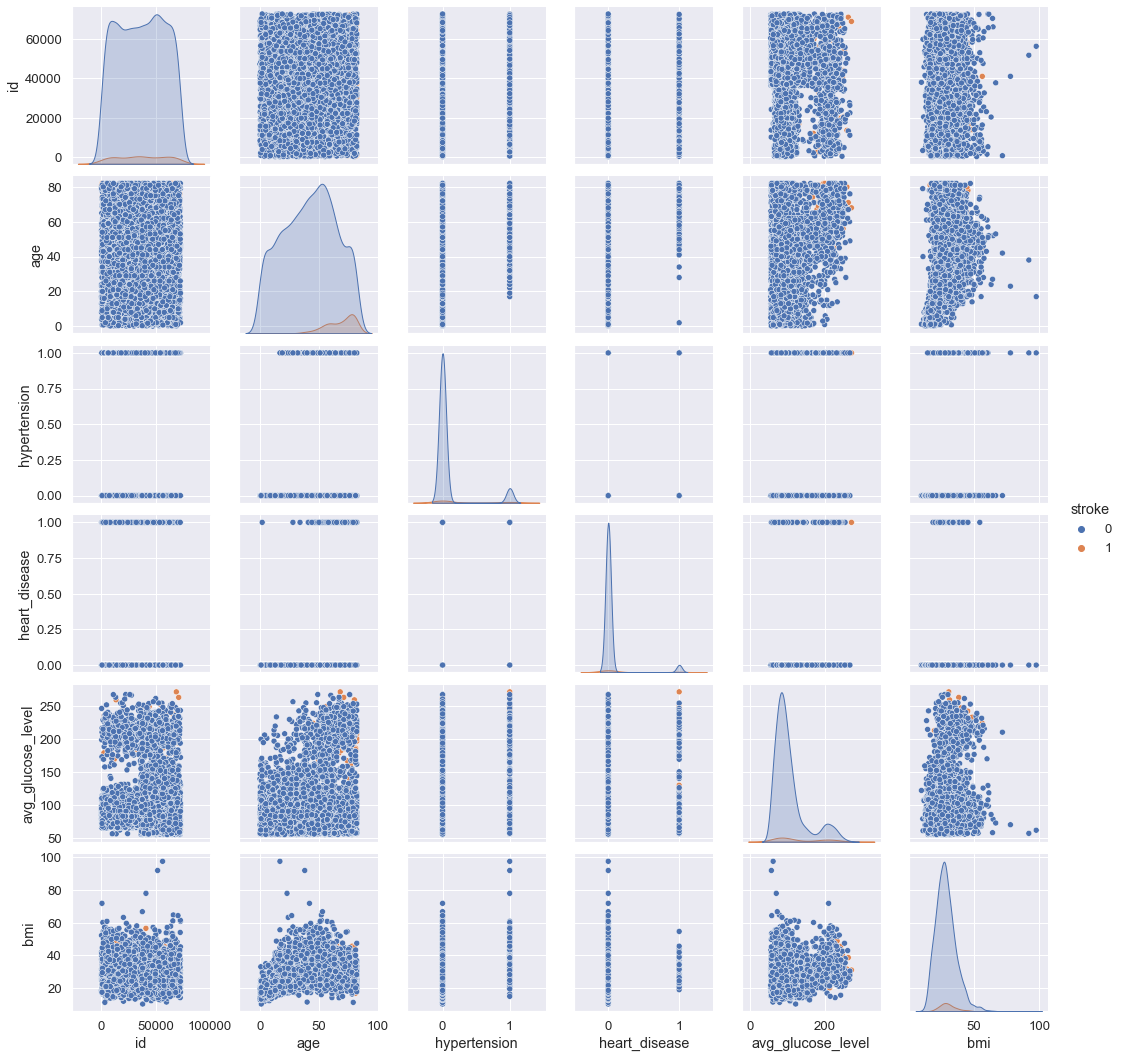

In [68]:
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.2)
sns.pairplot(df , hue = "stroke")

Text(0.5, 1.0, 'Swarm Plot of gender and age Based on stroke ')

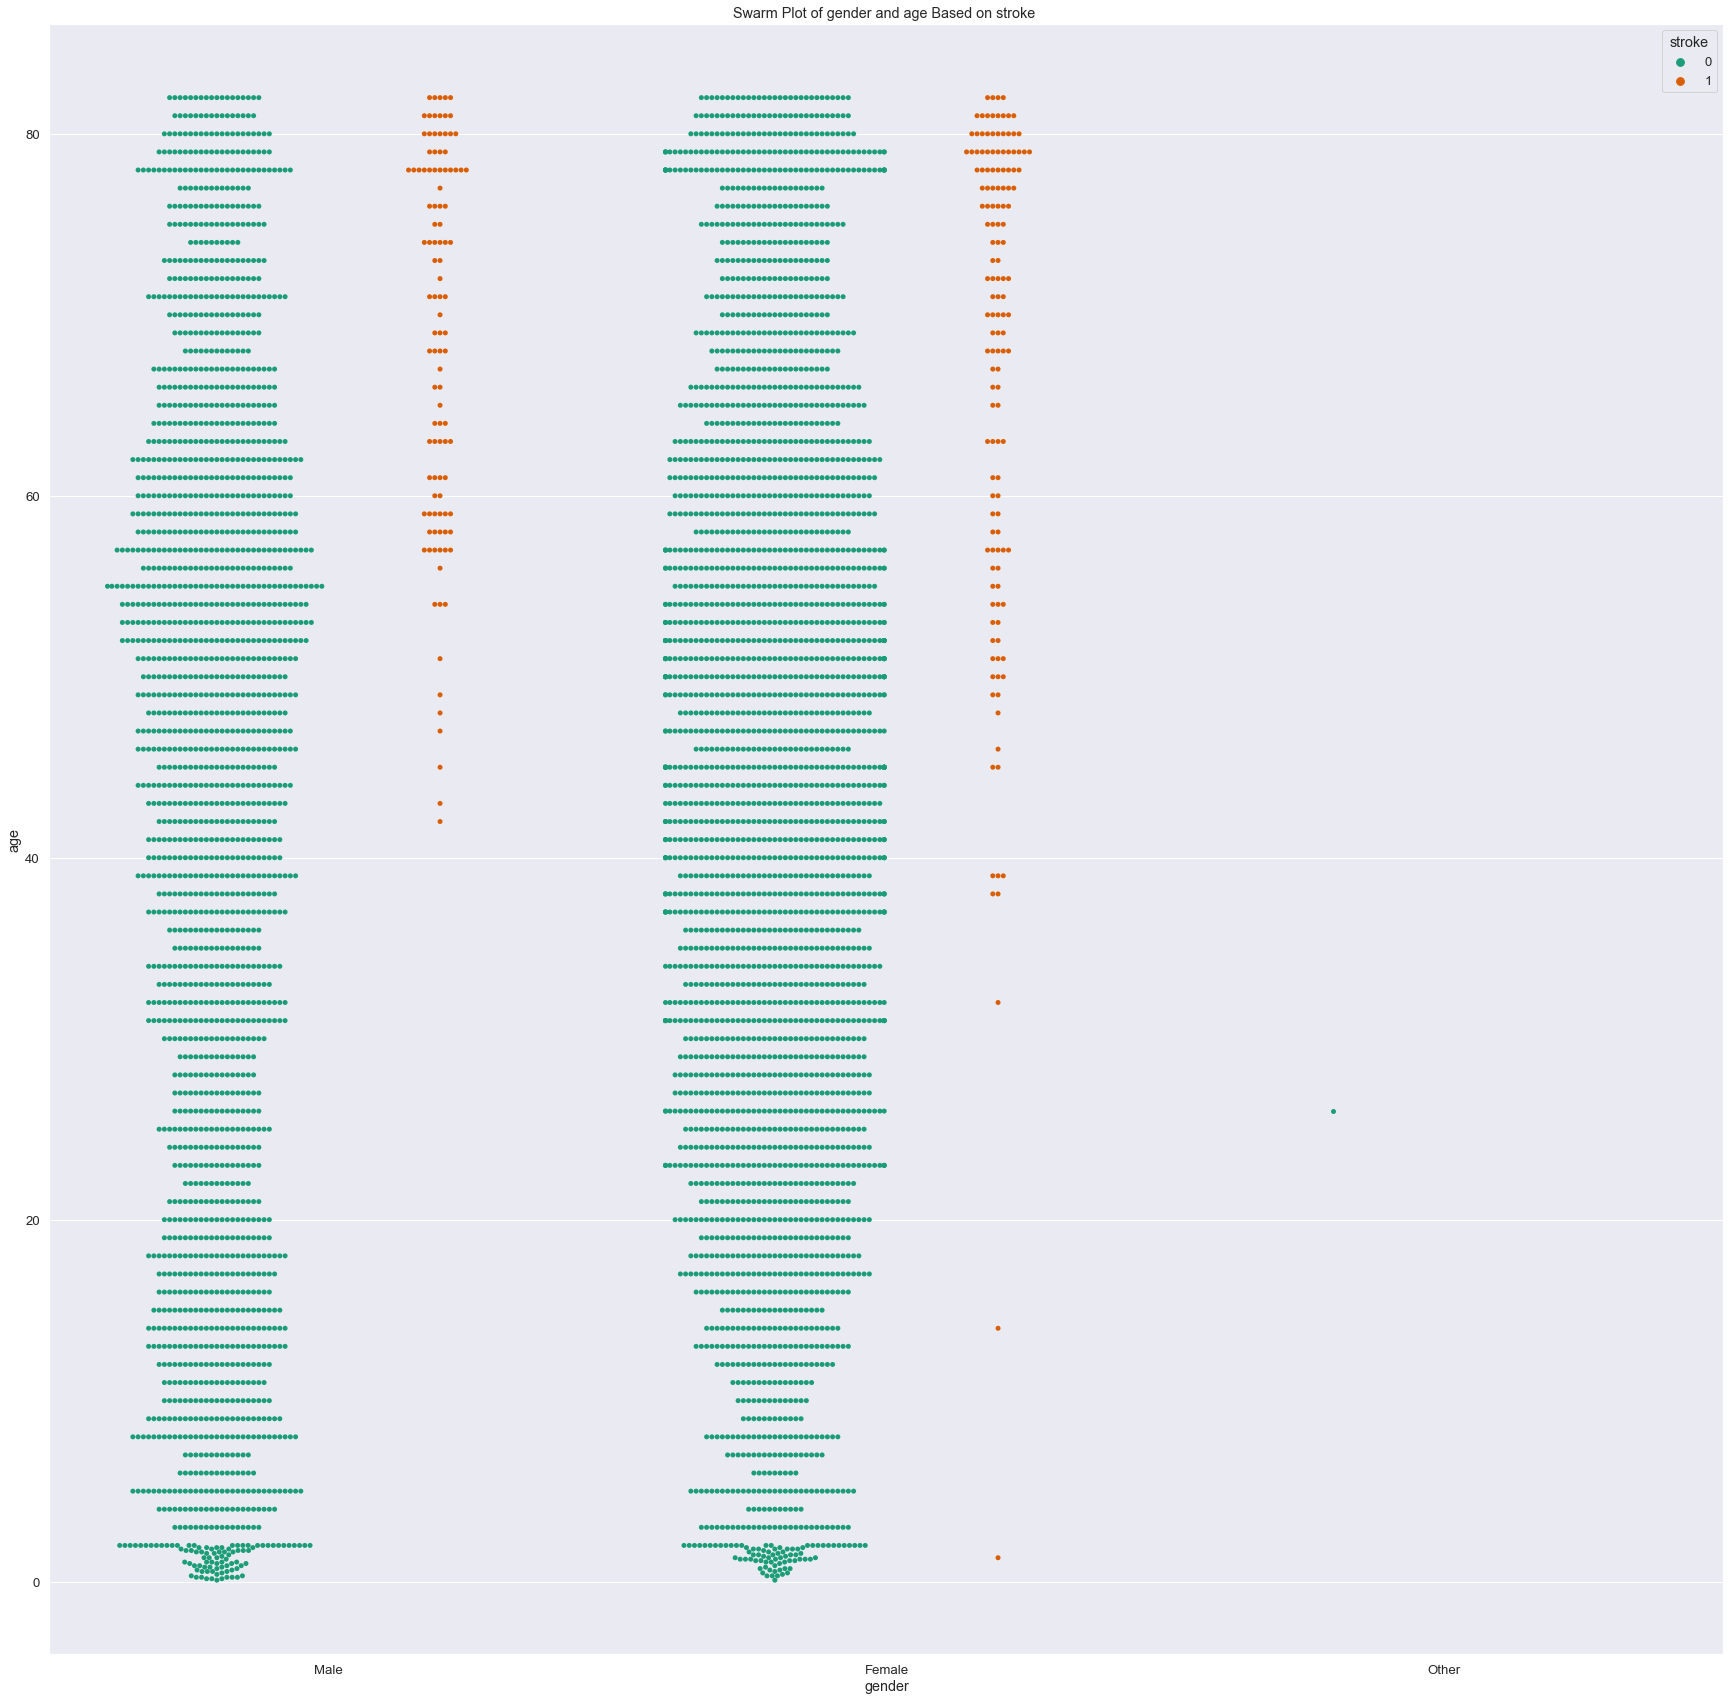

In [69]:
sns.swarmplot( x = "gender" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of gender and age Based on stroke ")

Text(0.5, 1.0, 'Swarm Plot of heart_disease and age Based on stroke ')

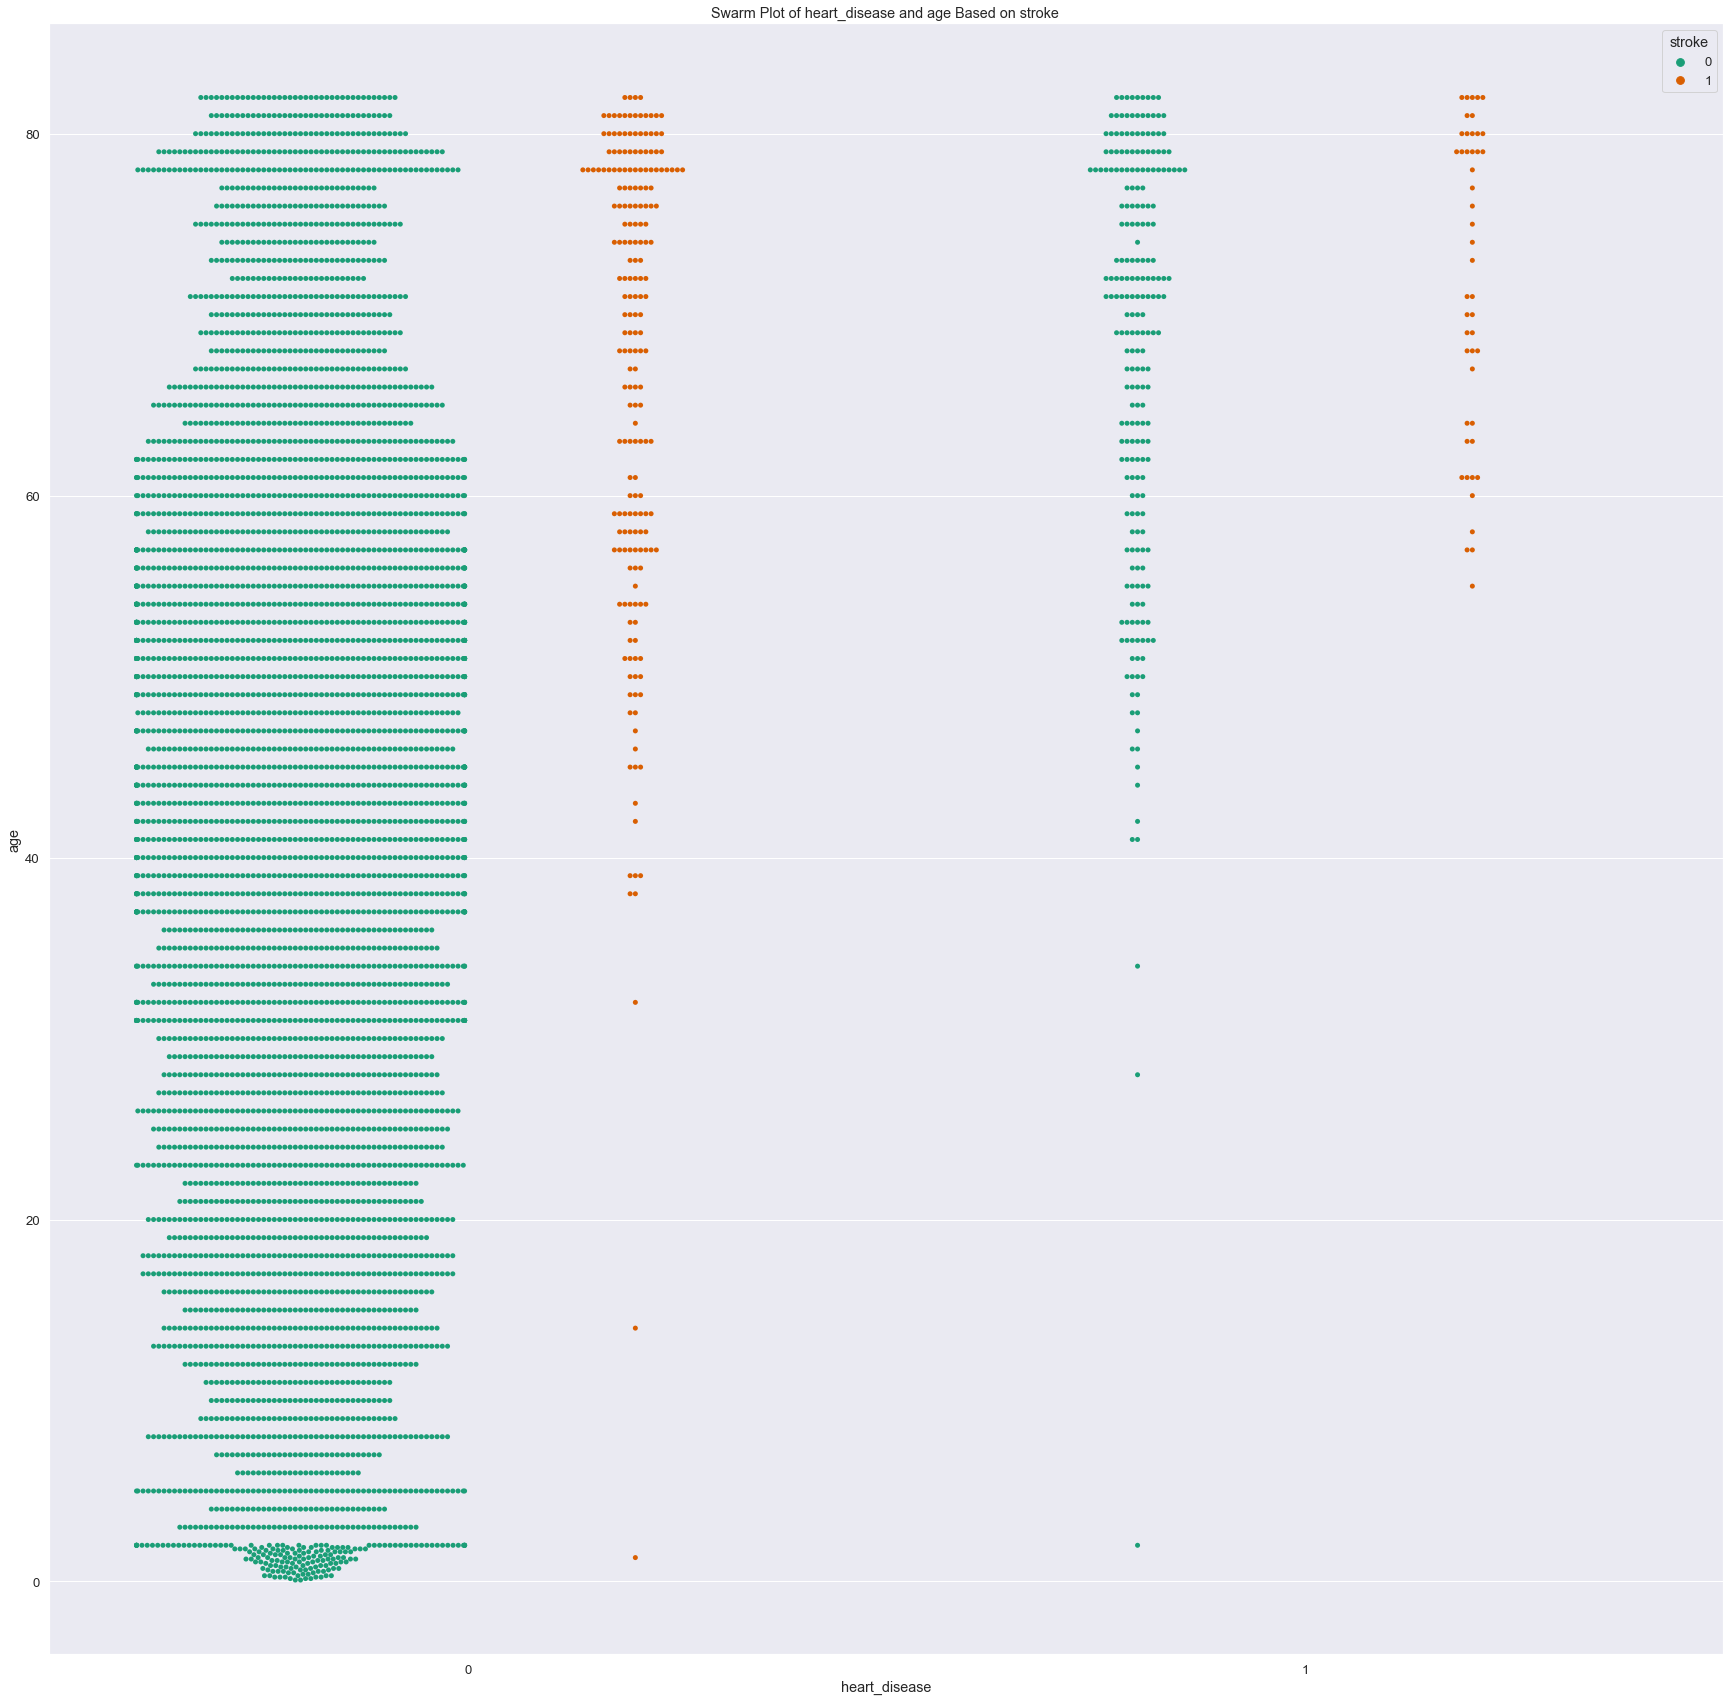

In [70]:
sns.swarmplot( x = "heart_disease" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of heart_disease and age Based on stroke ")

Text(0.5, 1.0, 'Swarm Plot of ever_married and age Based on stroke ')

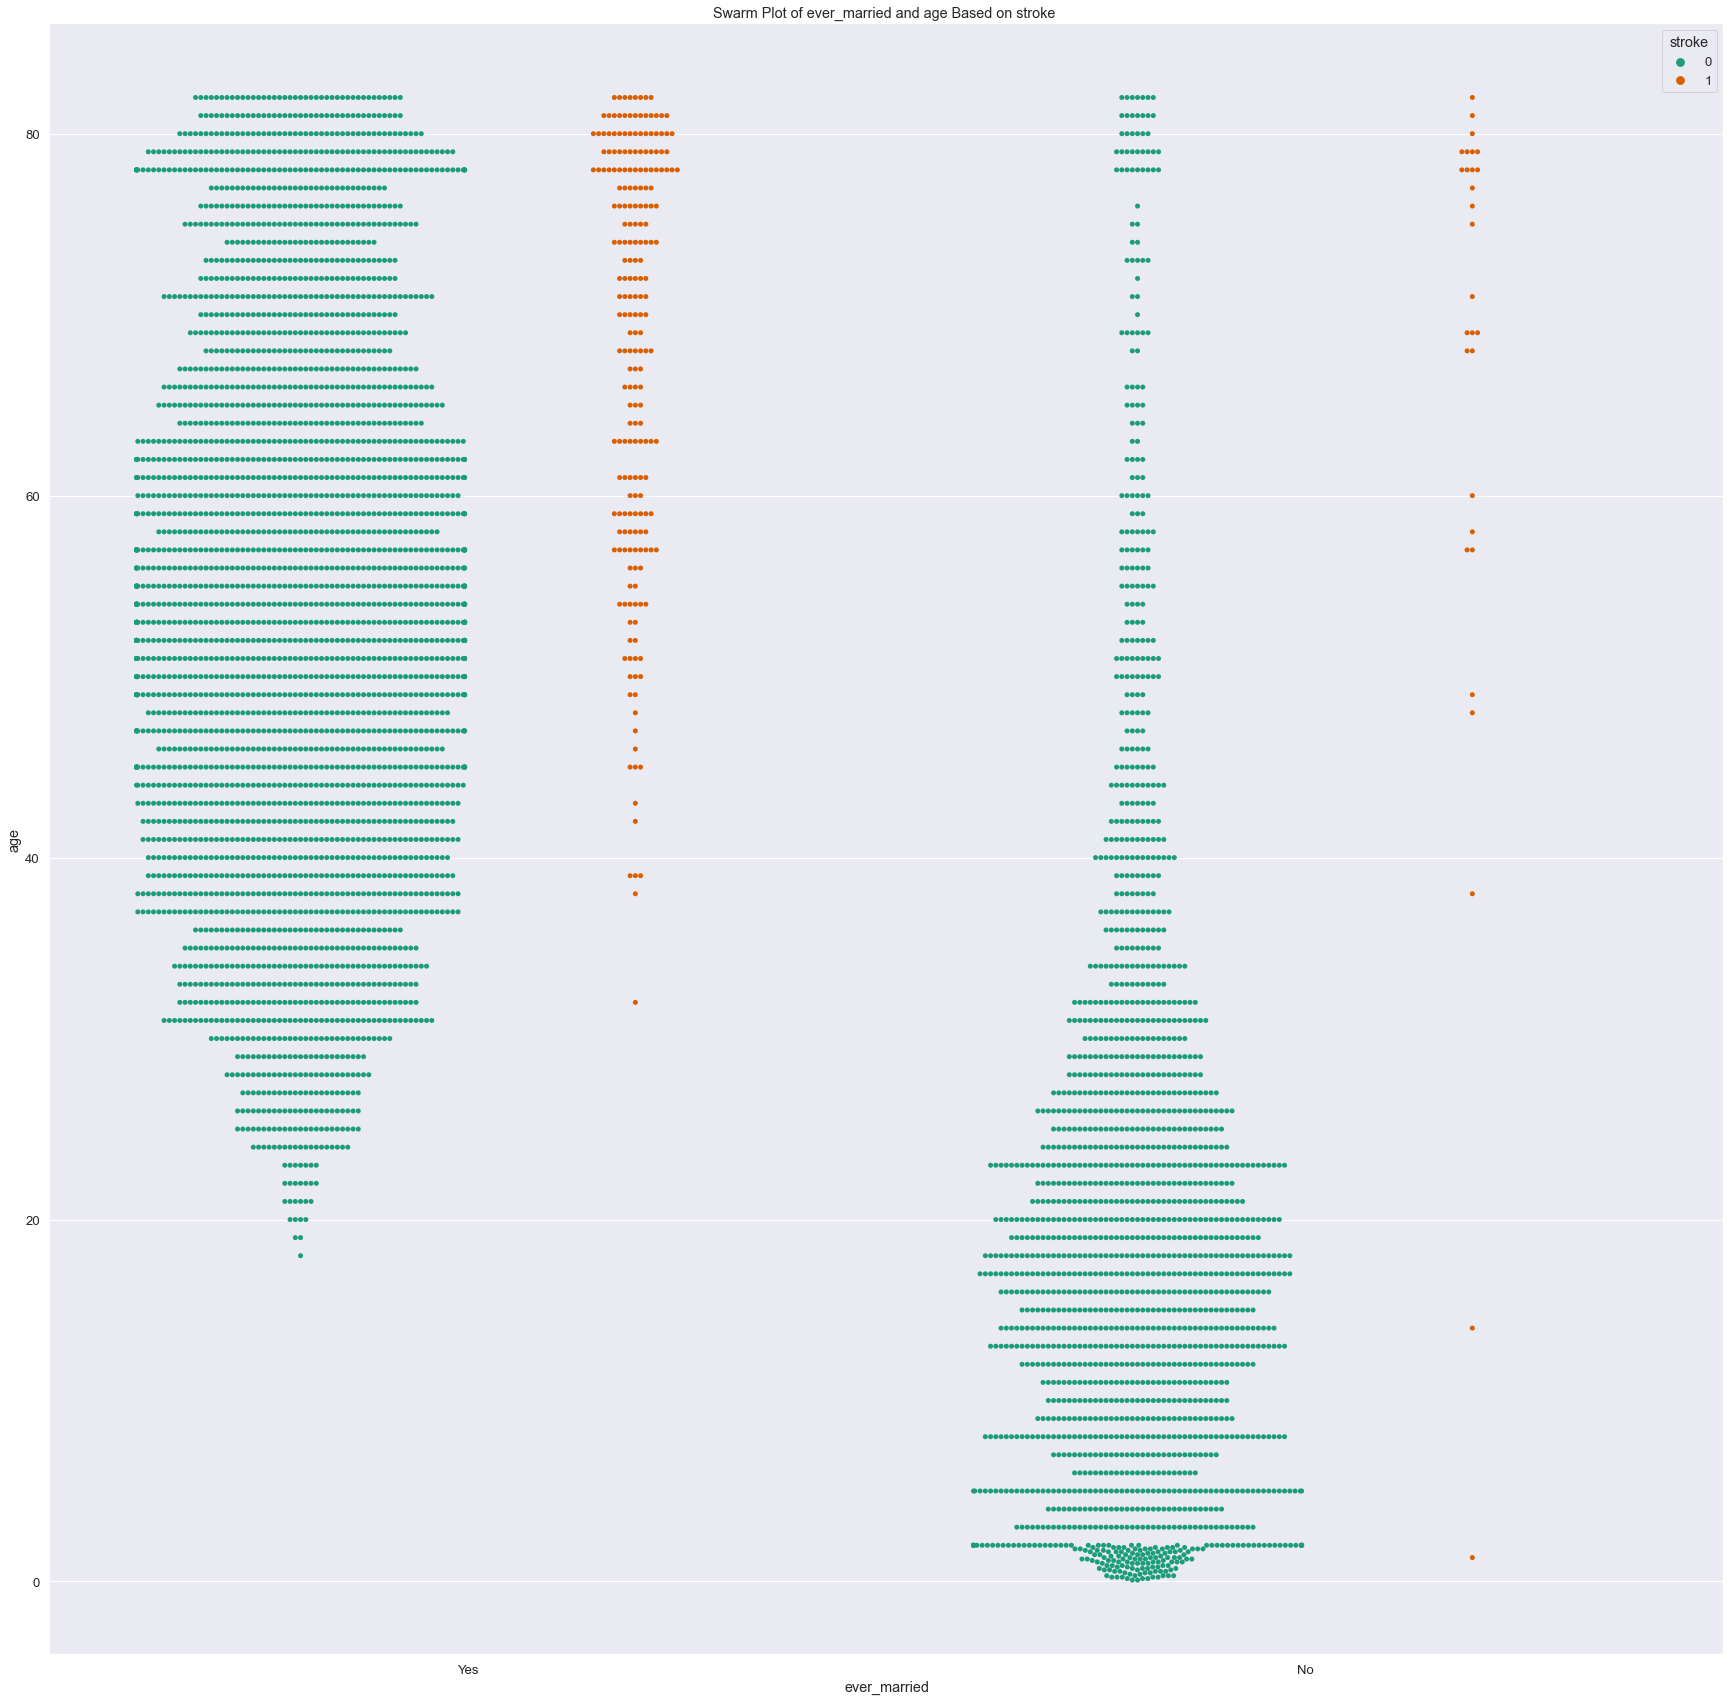

In [71]:
sns.swarmplot( x = "ever_married" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of ever_married and age Based on stroke ")

Text(0.5, 1.0, 'Swarm Plot of work_type and age Based on stroke ')

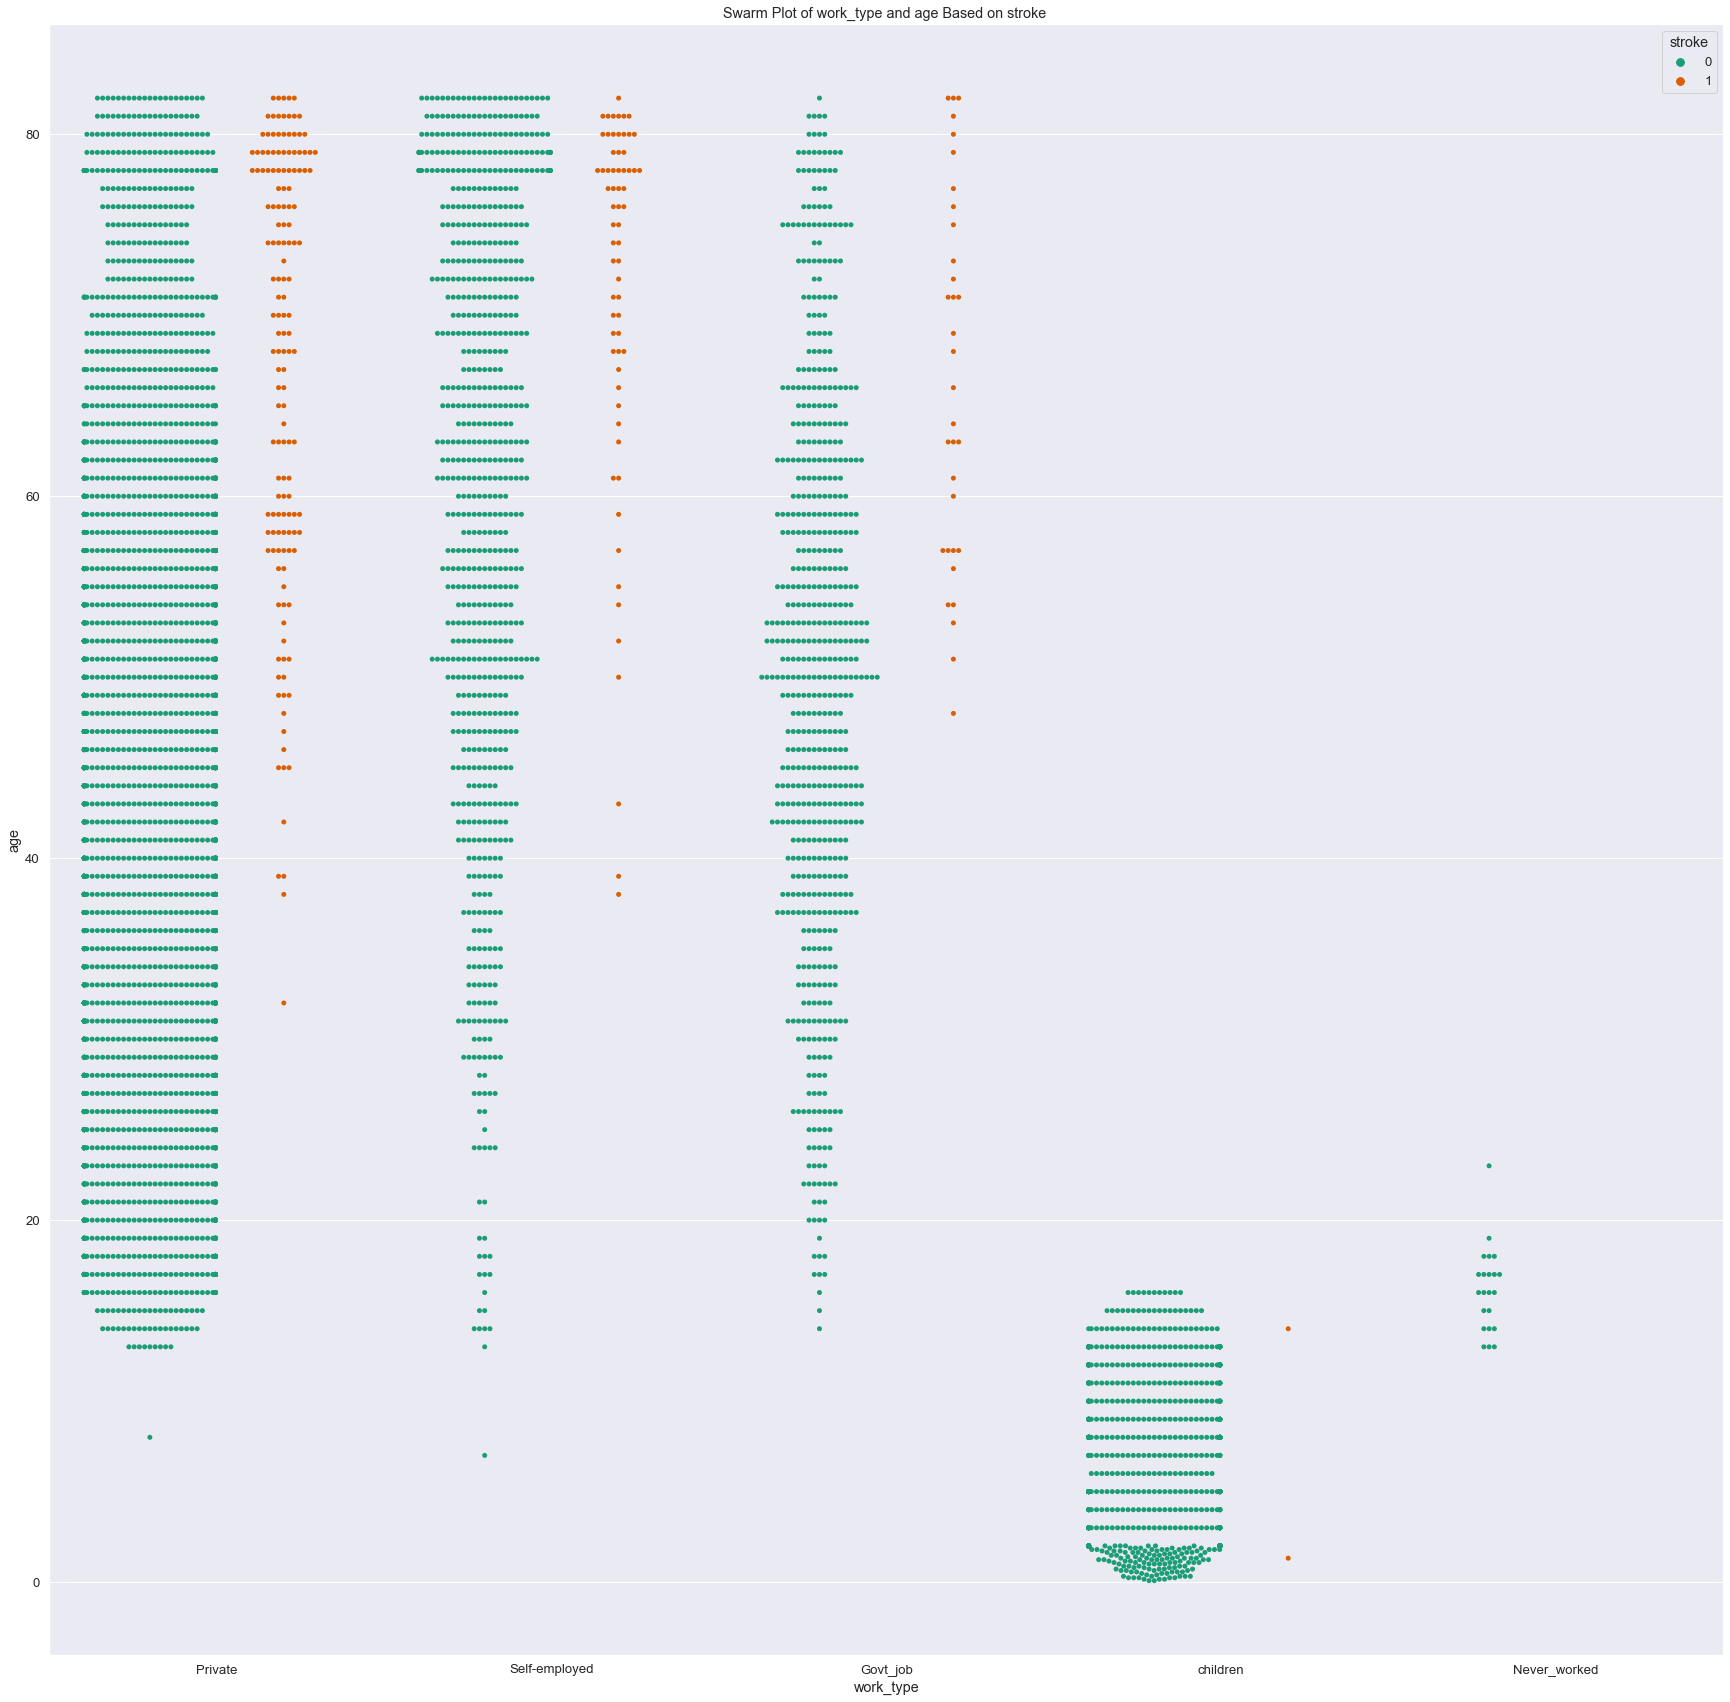

In [72]:
sns.swarmplot( x = "work_type" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of work_type and age Based on stroke ")

Text(0.5, 1.0, 'Swarm Plot of Residence_type and age Based on stroke ')

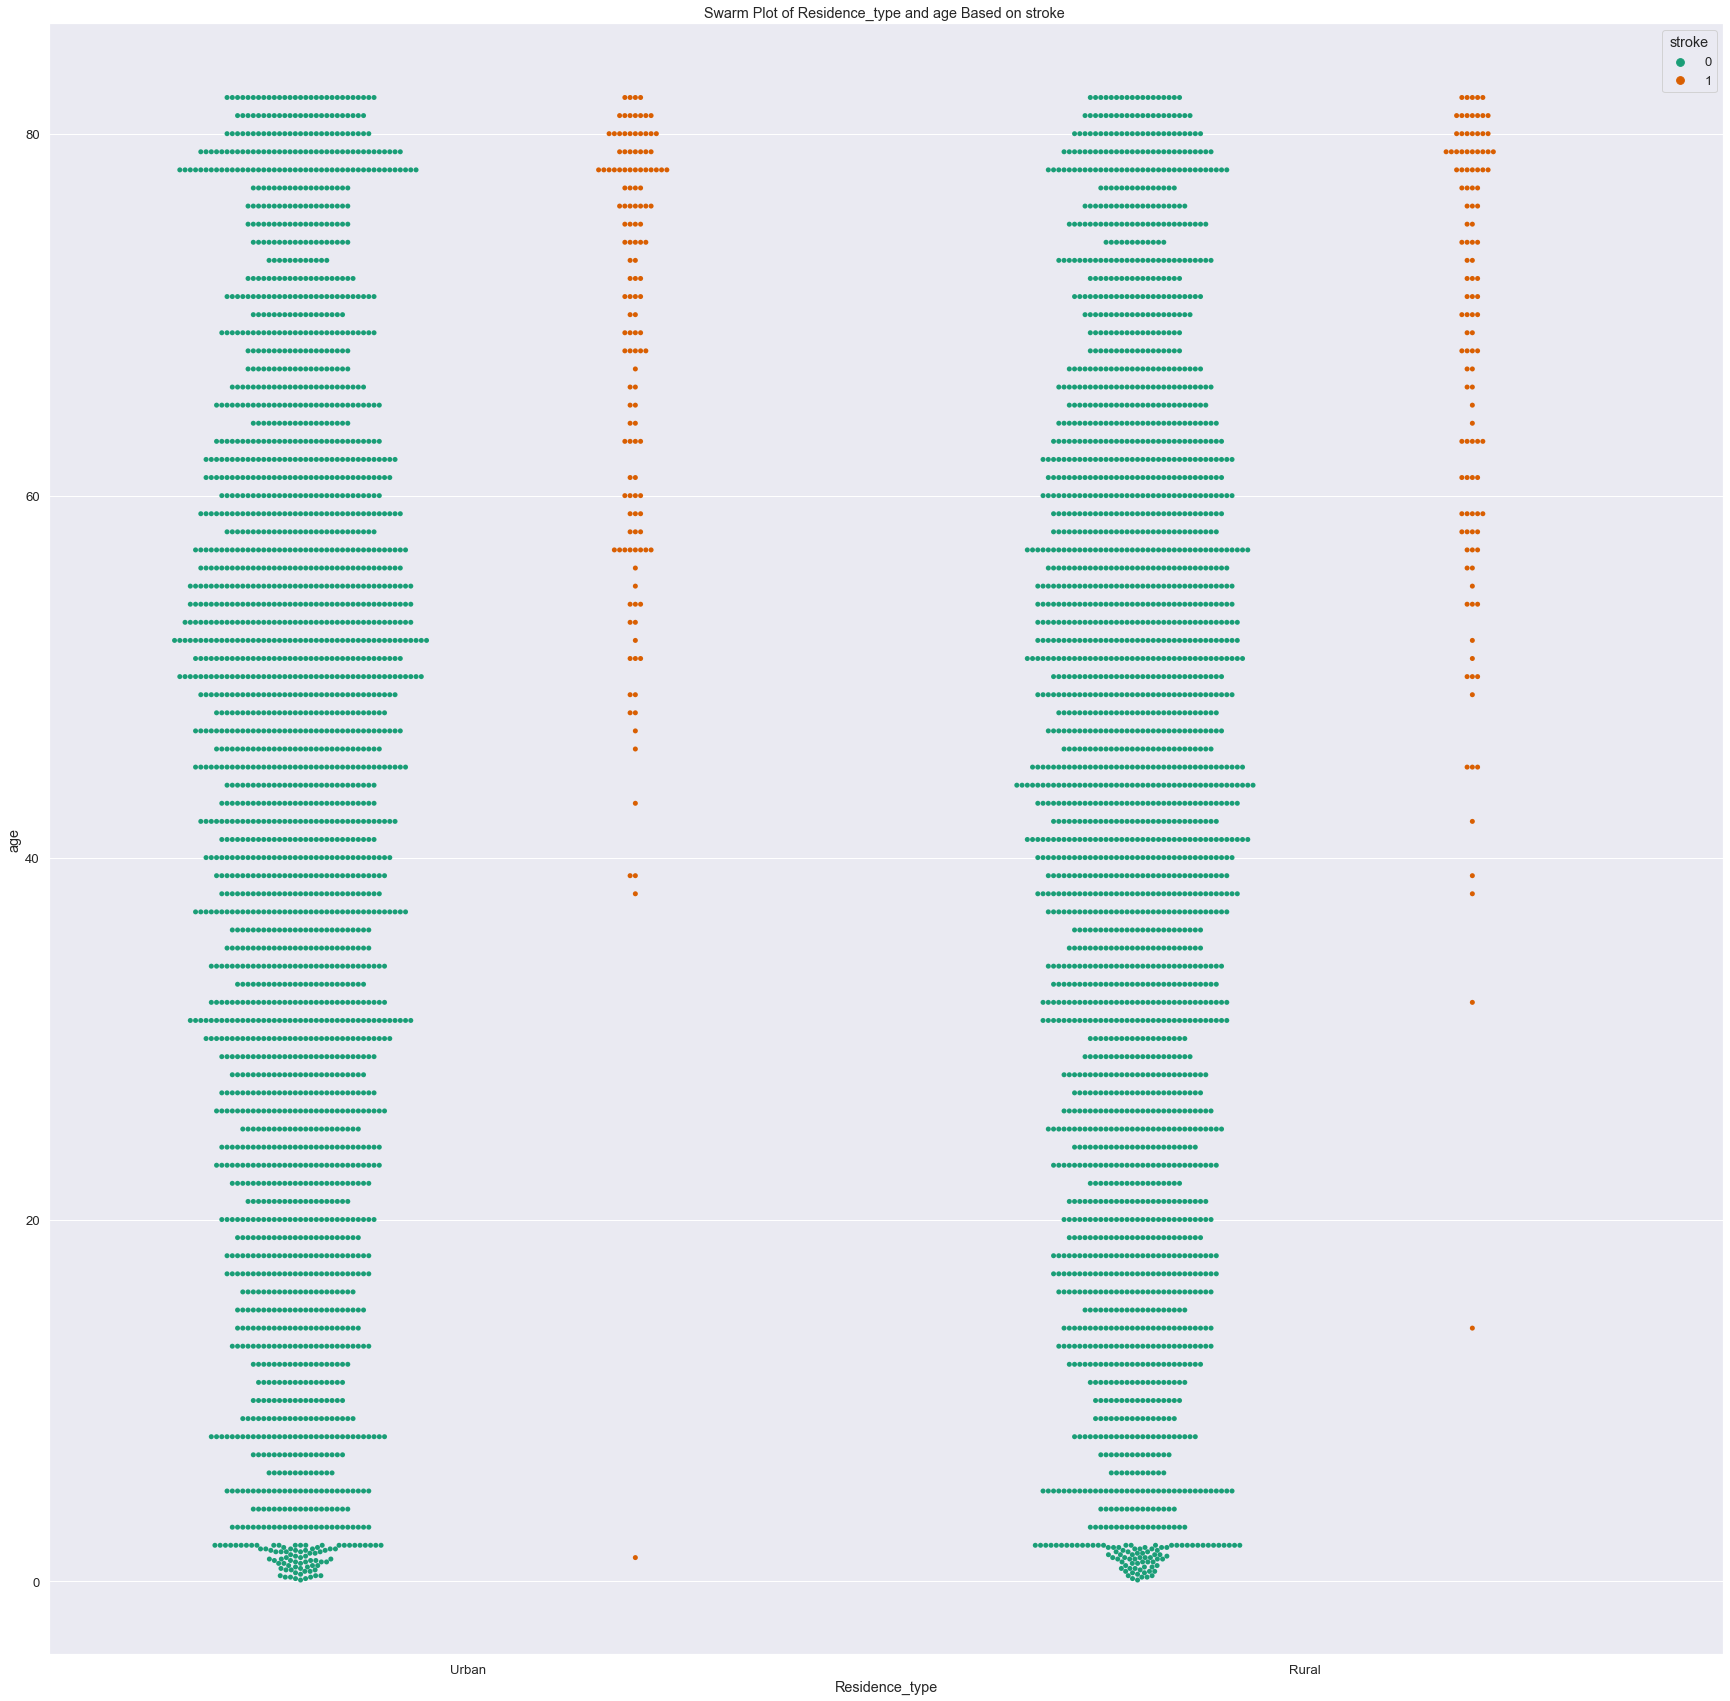

In [73]:
sns.swarmplot( x = "Residence_type" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Residence_type and age Based on stroke ")

Text(0.5, 1.0, 'Swarm Plot of smoking_status and age Based on stroke ')

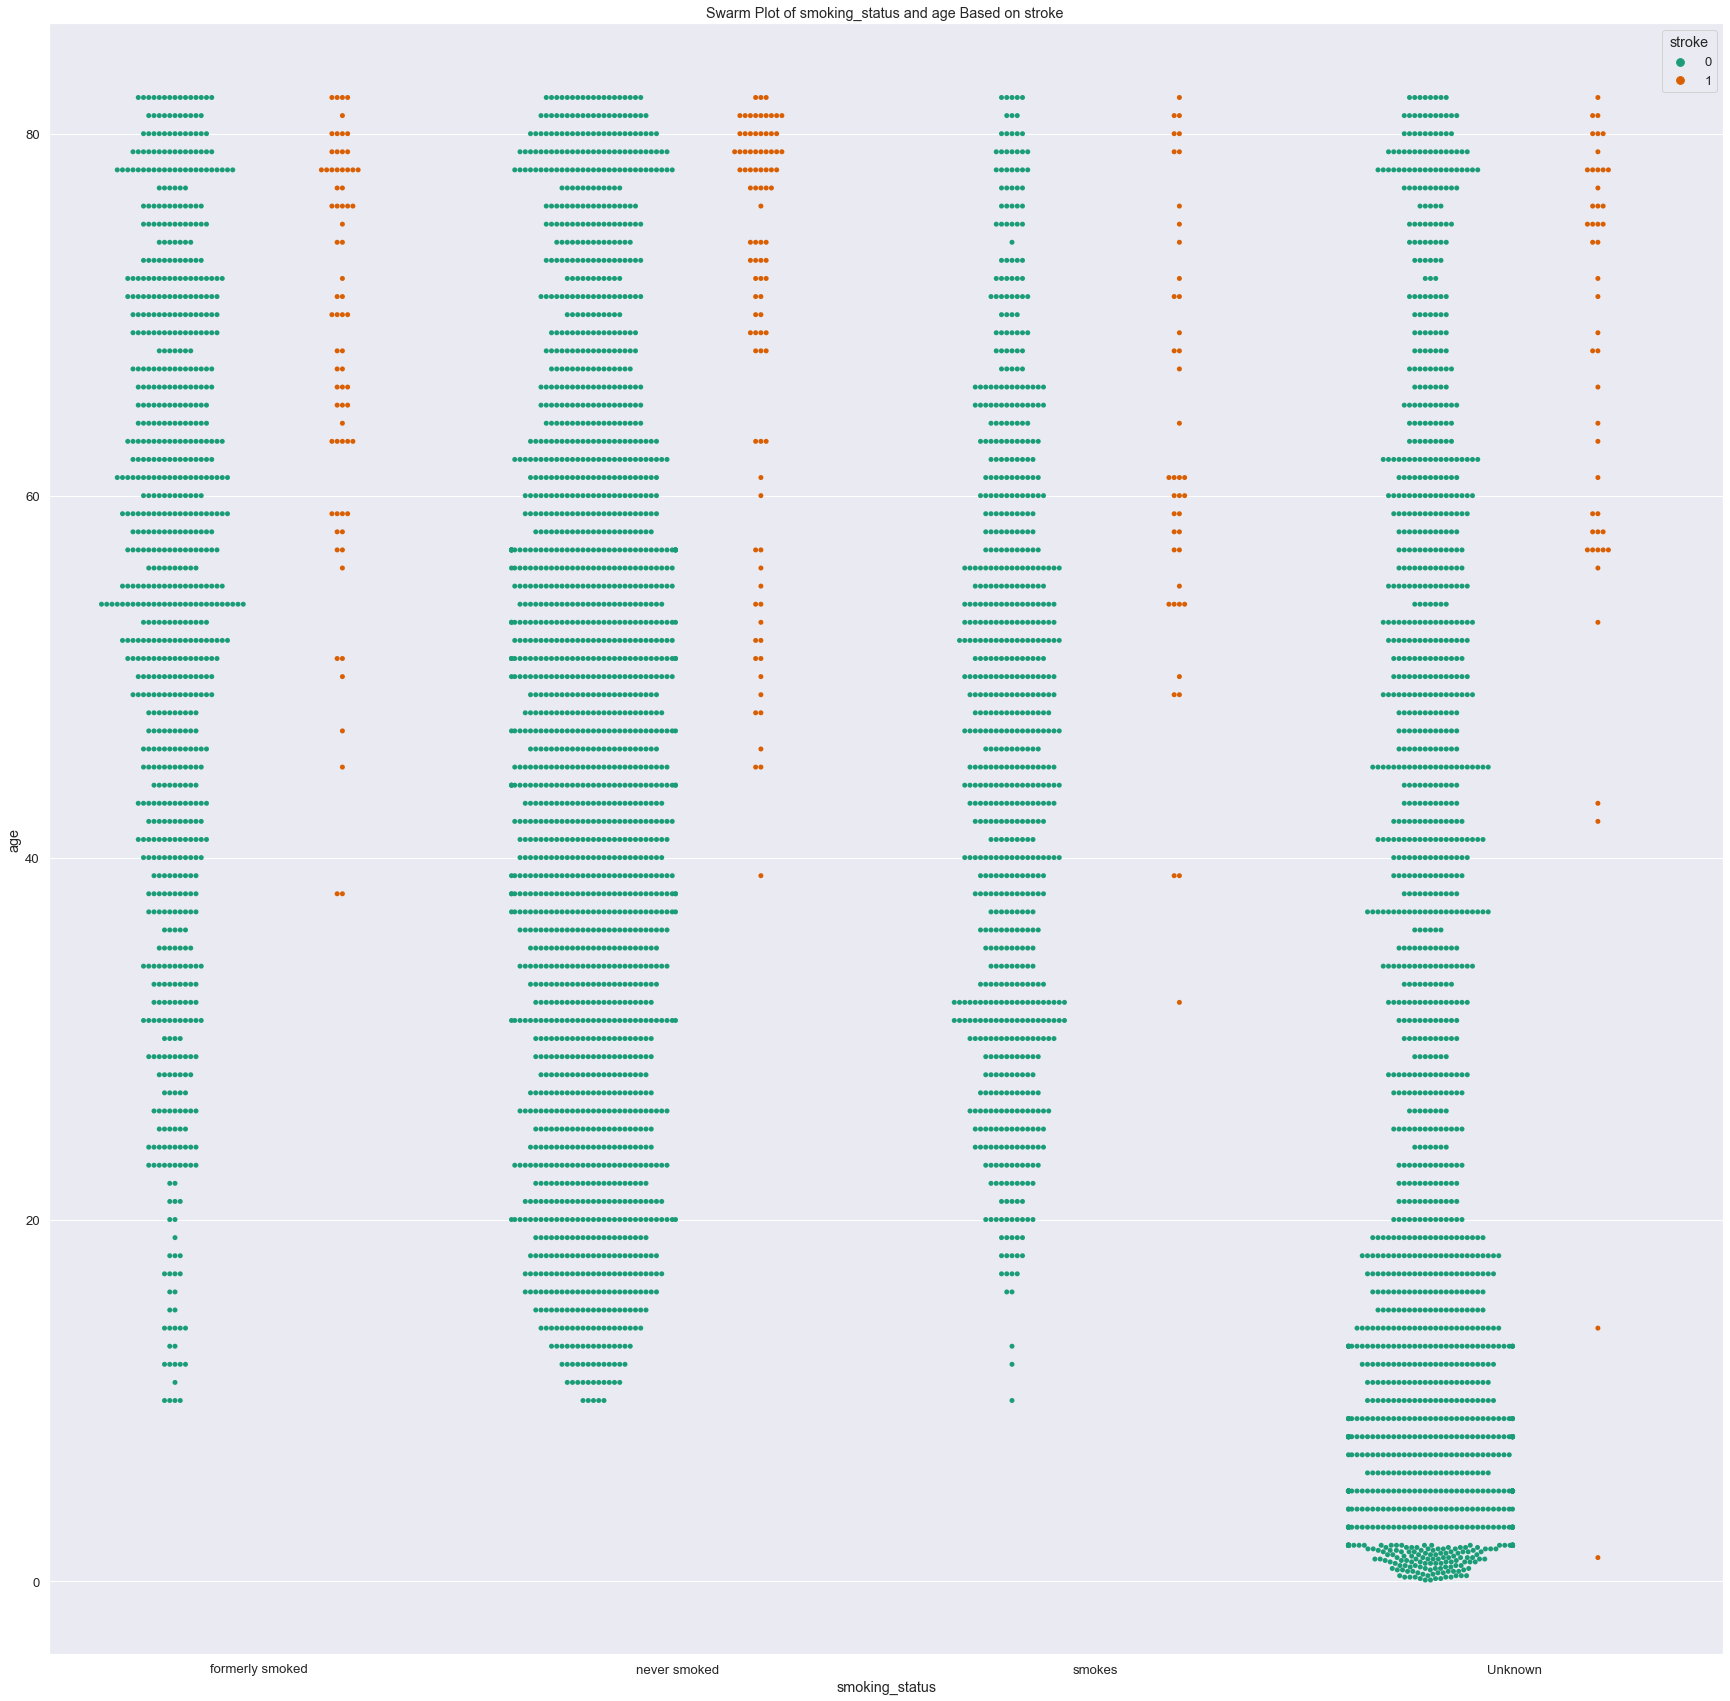

In [74]:
sns.swarmplot( x = "smoking_status" , y = "age" , data = df ,hue = "stroke" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of smoking_status and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of gender and age Based on stroke ')

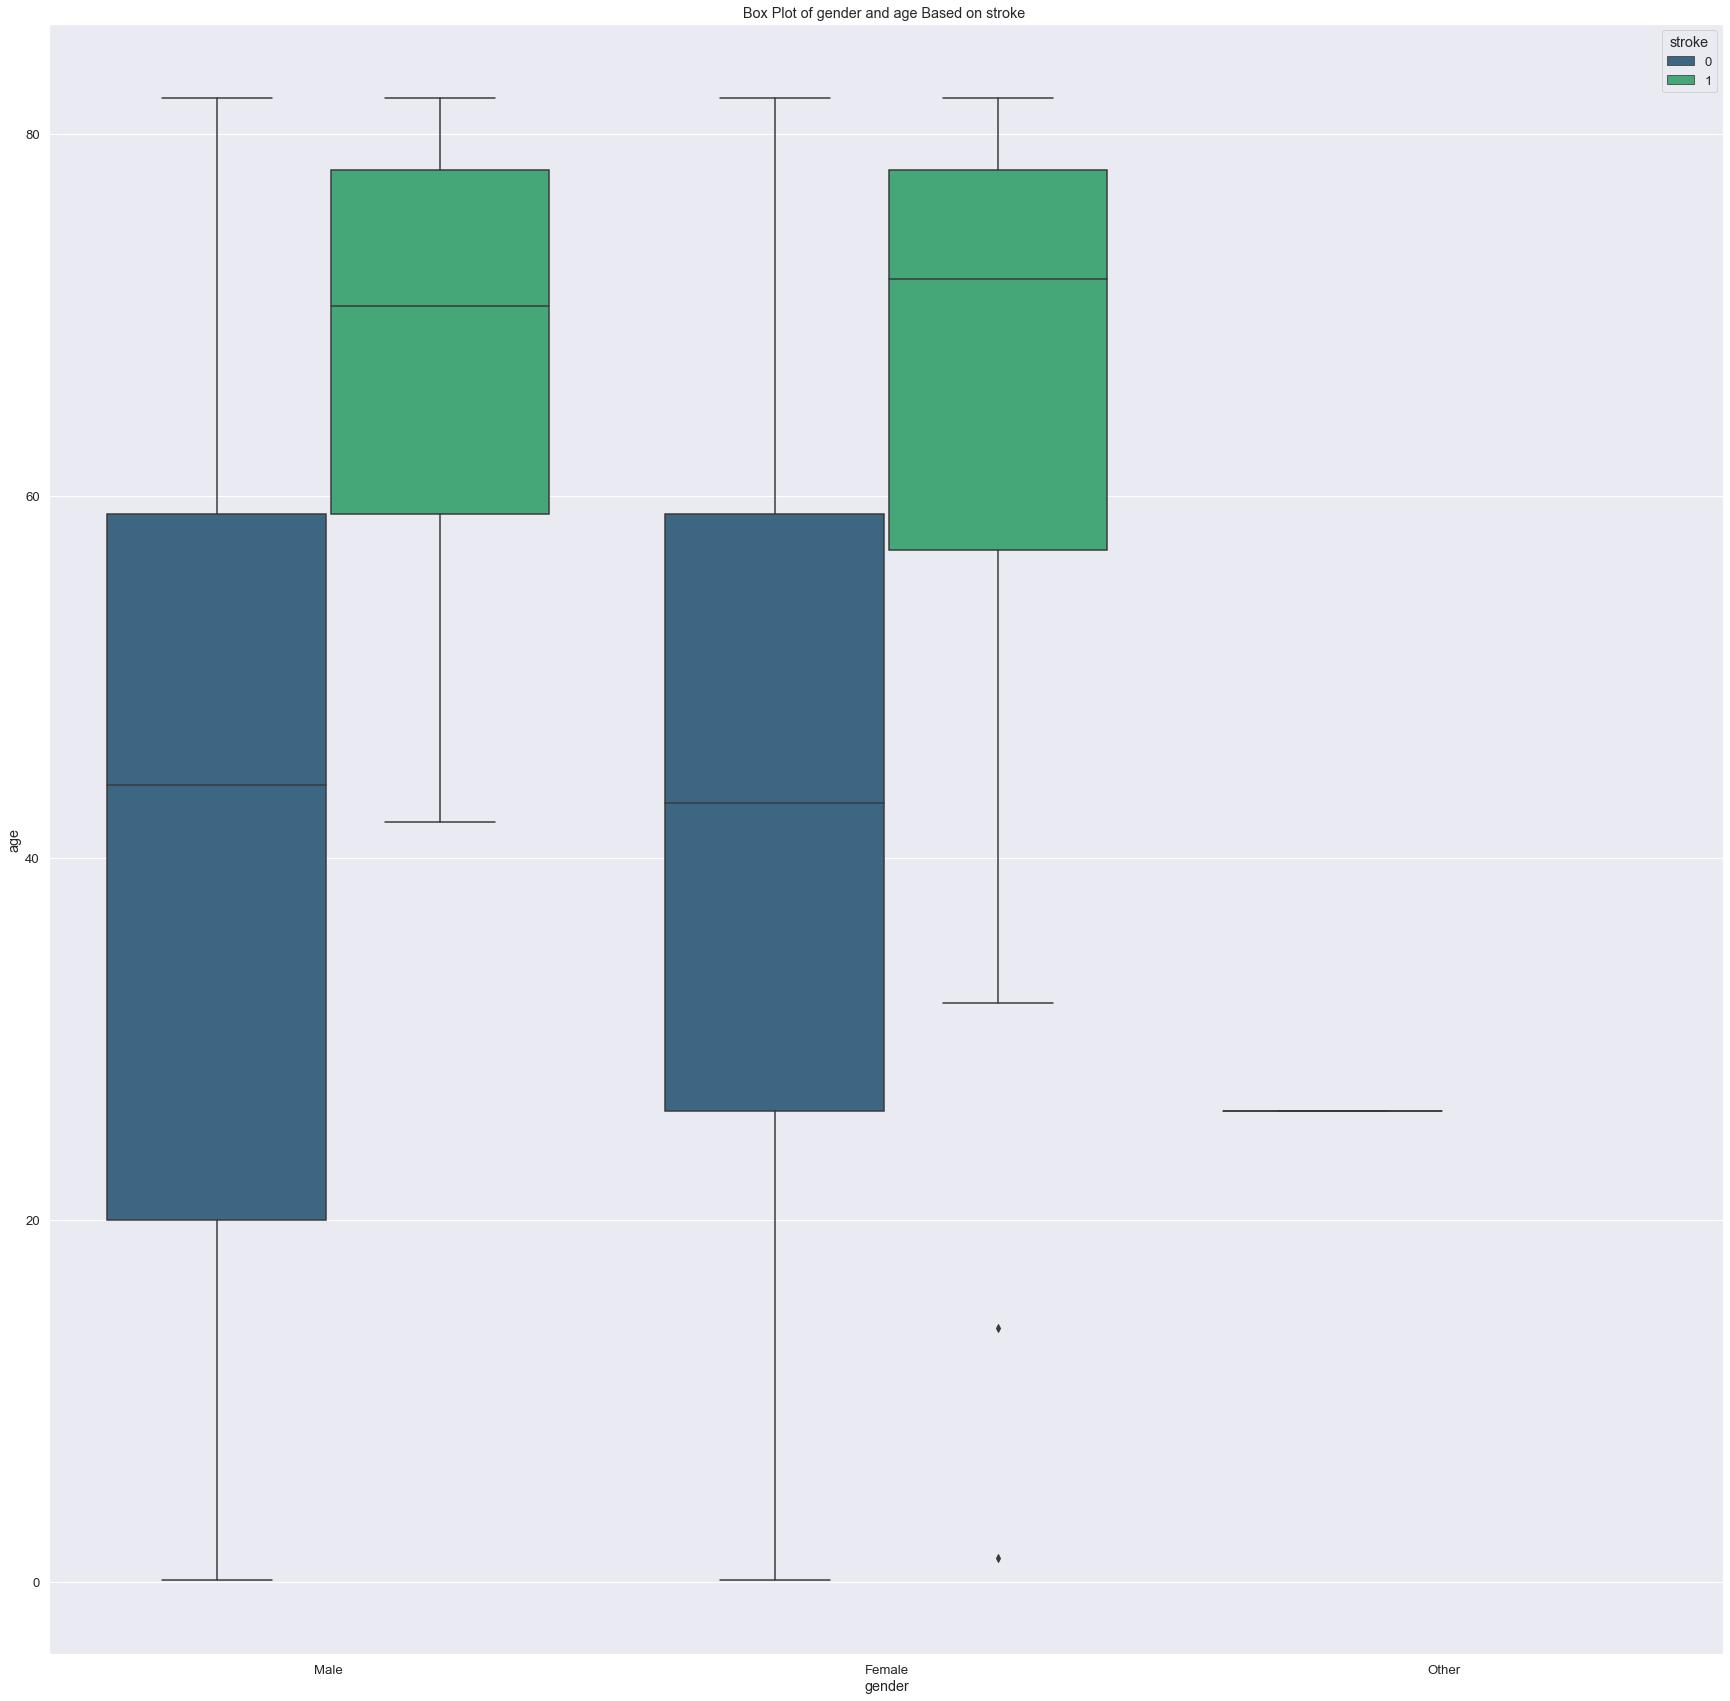

In [75]:
sns.boxplot( x = "gender" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of gender and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of heart_disease and age Based on stroke ')

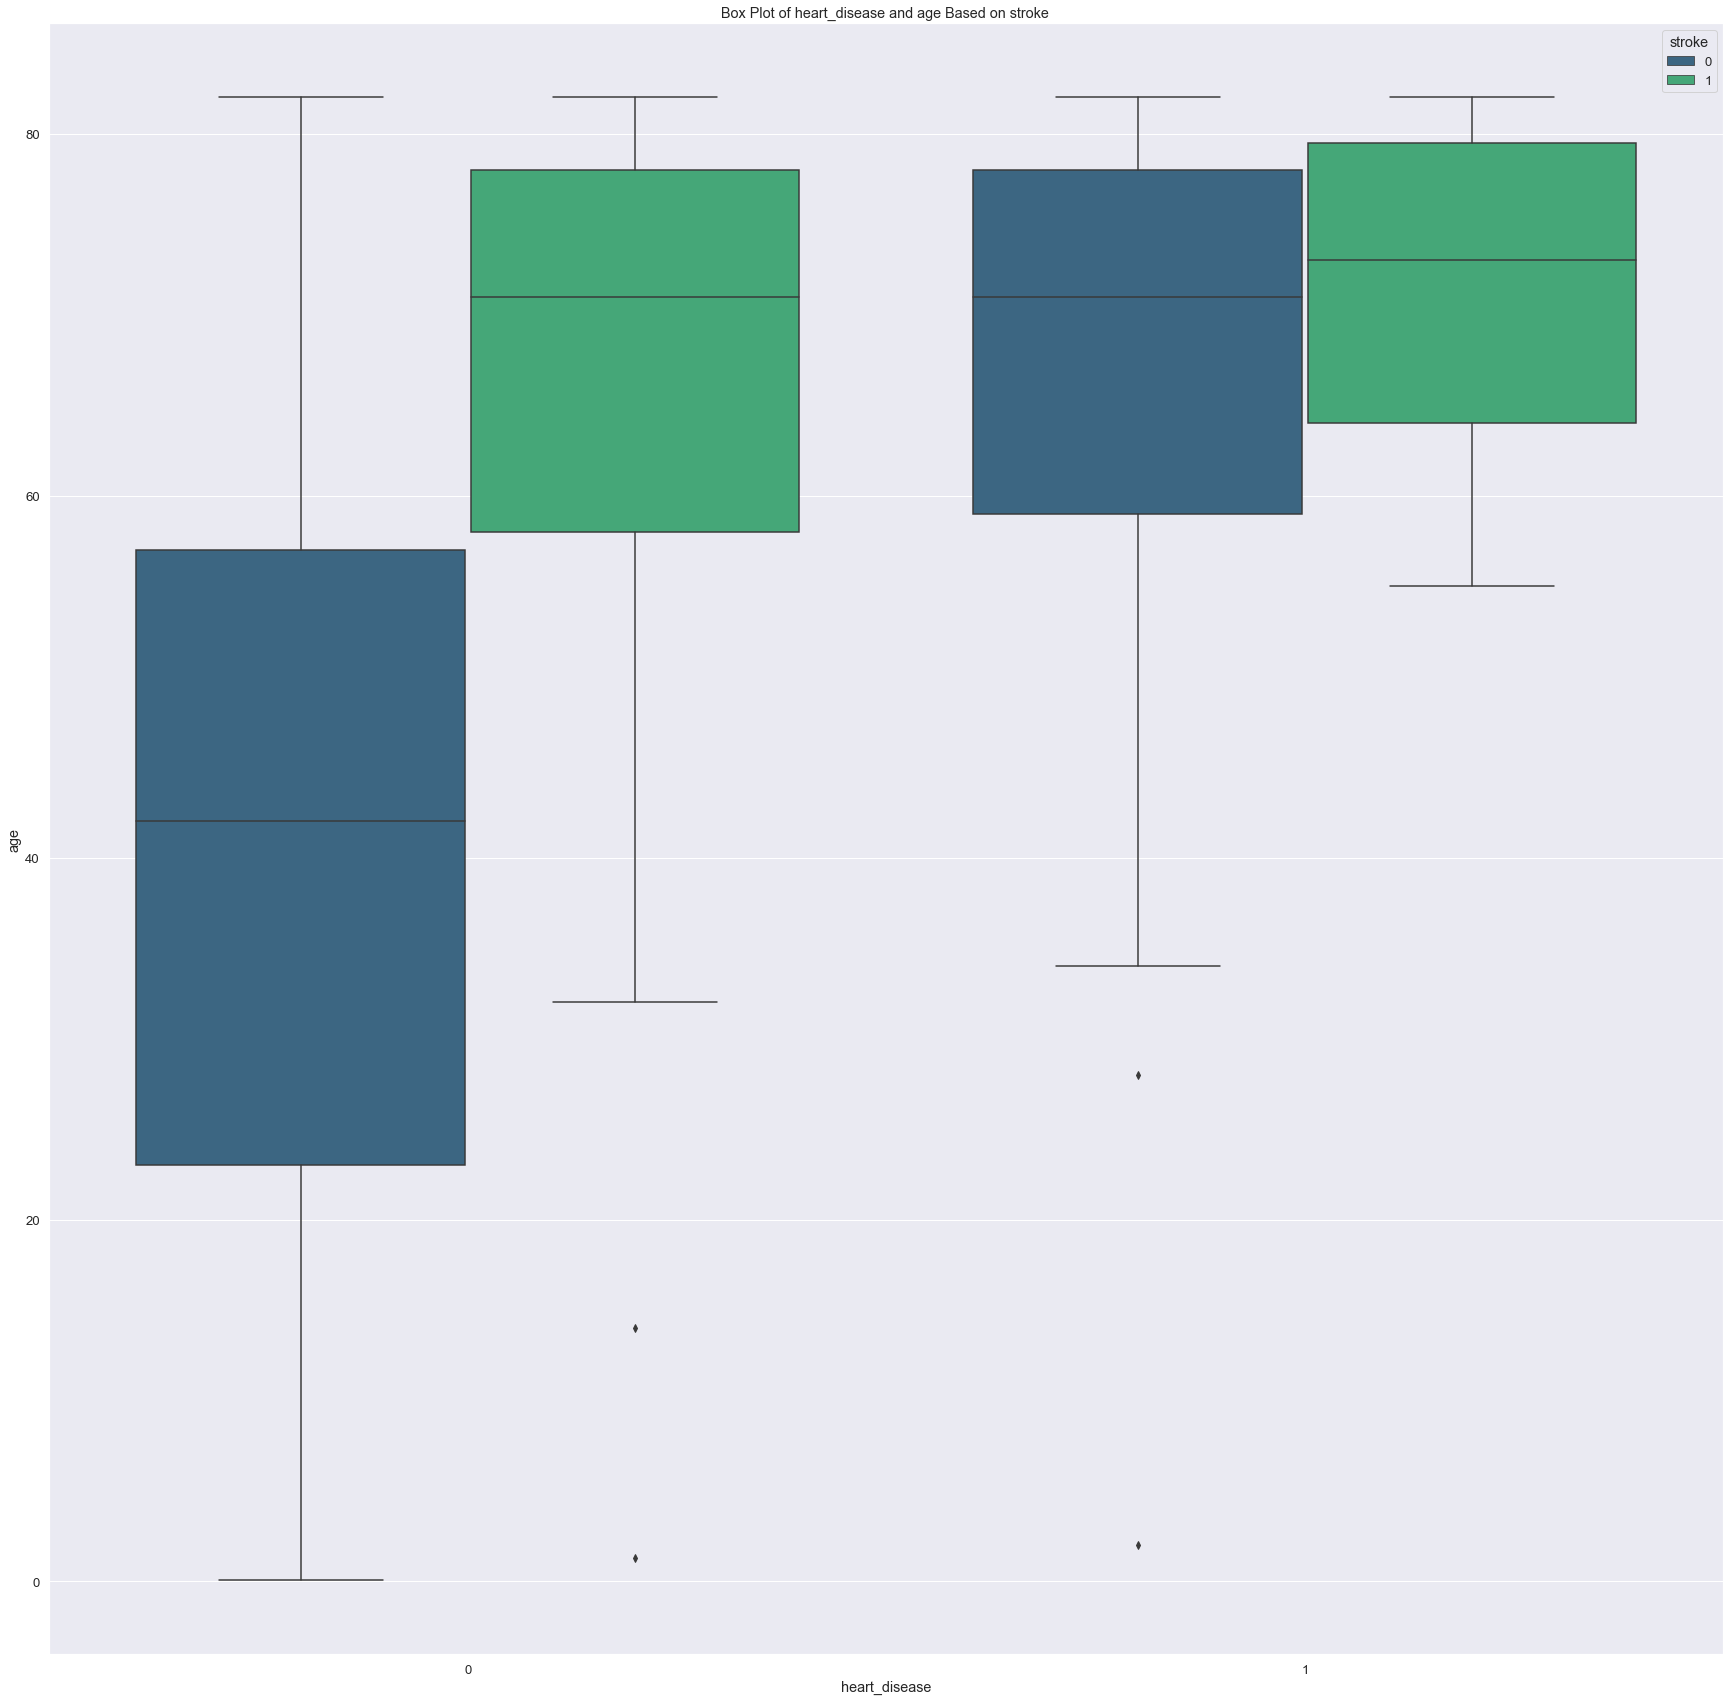

In [76]:
sns.boxplot( x = "heart_disease" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of heart_disease and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of ever_married and age Based on stroke ')

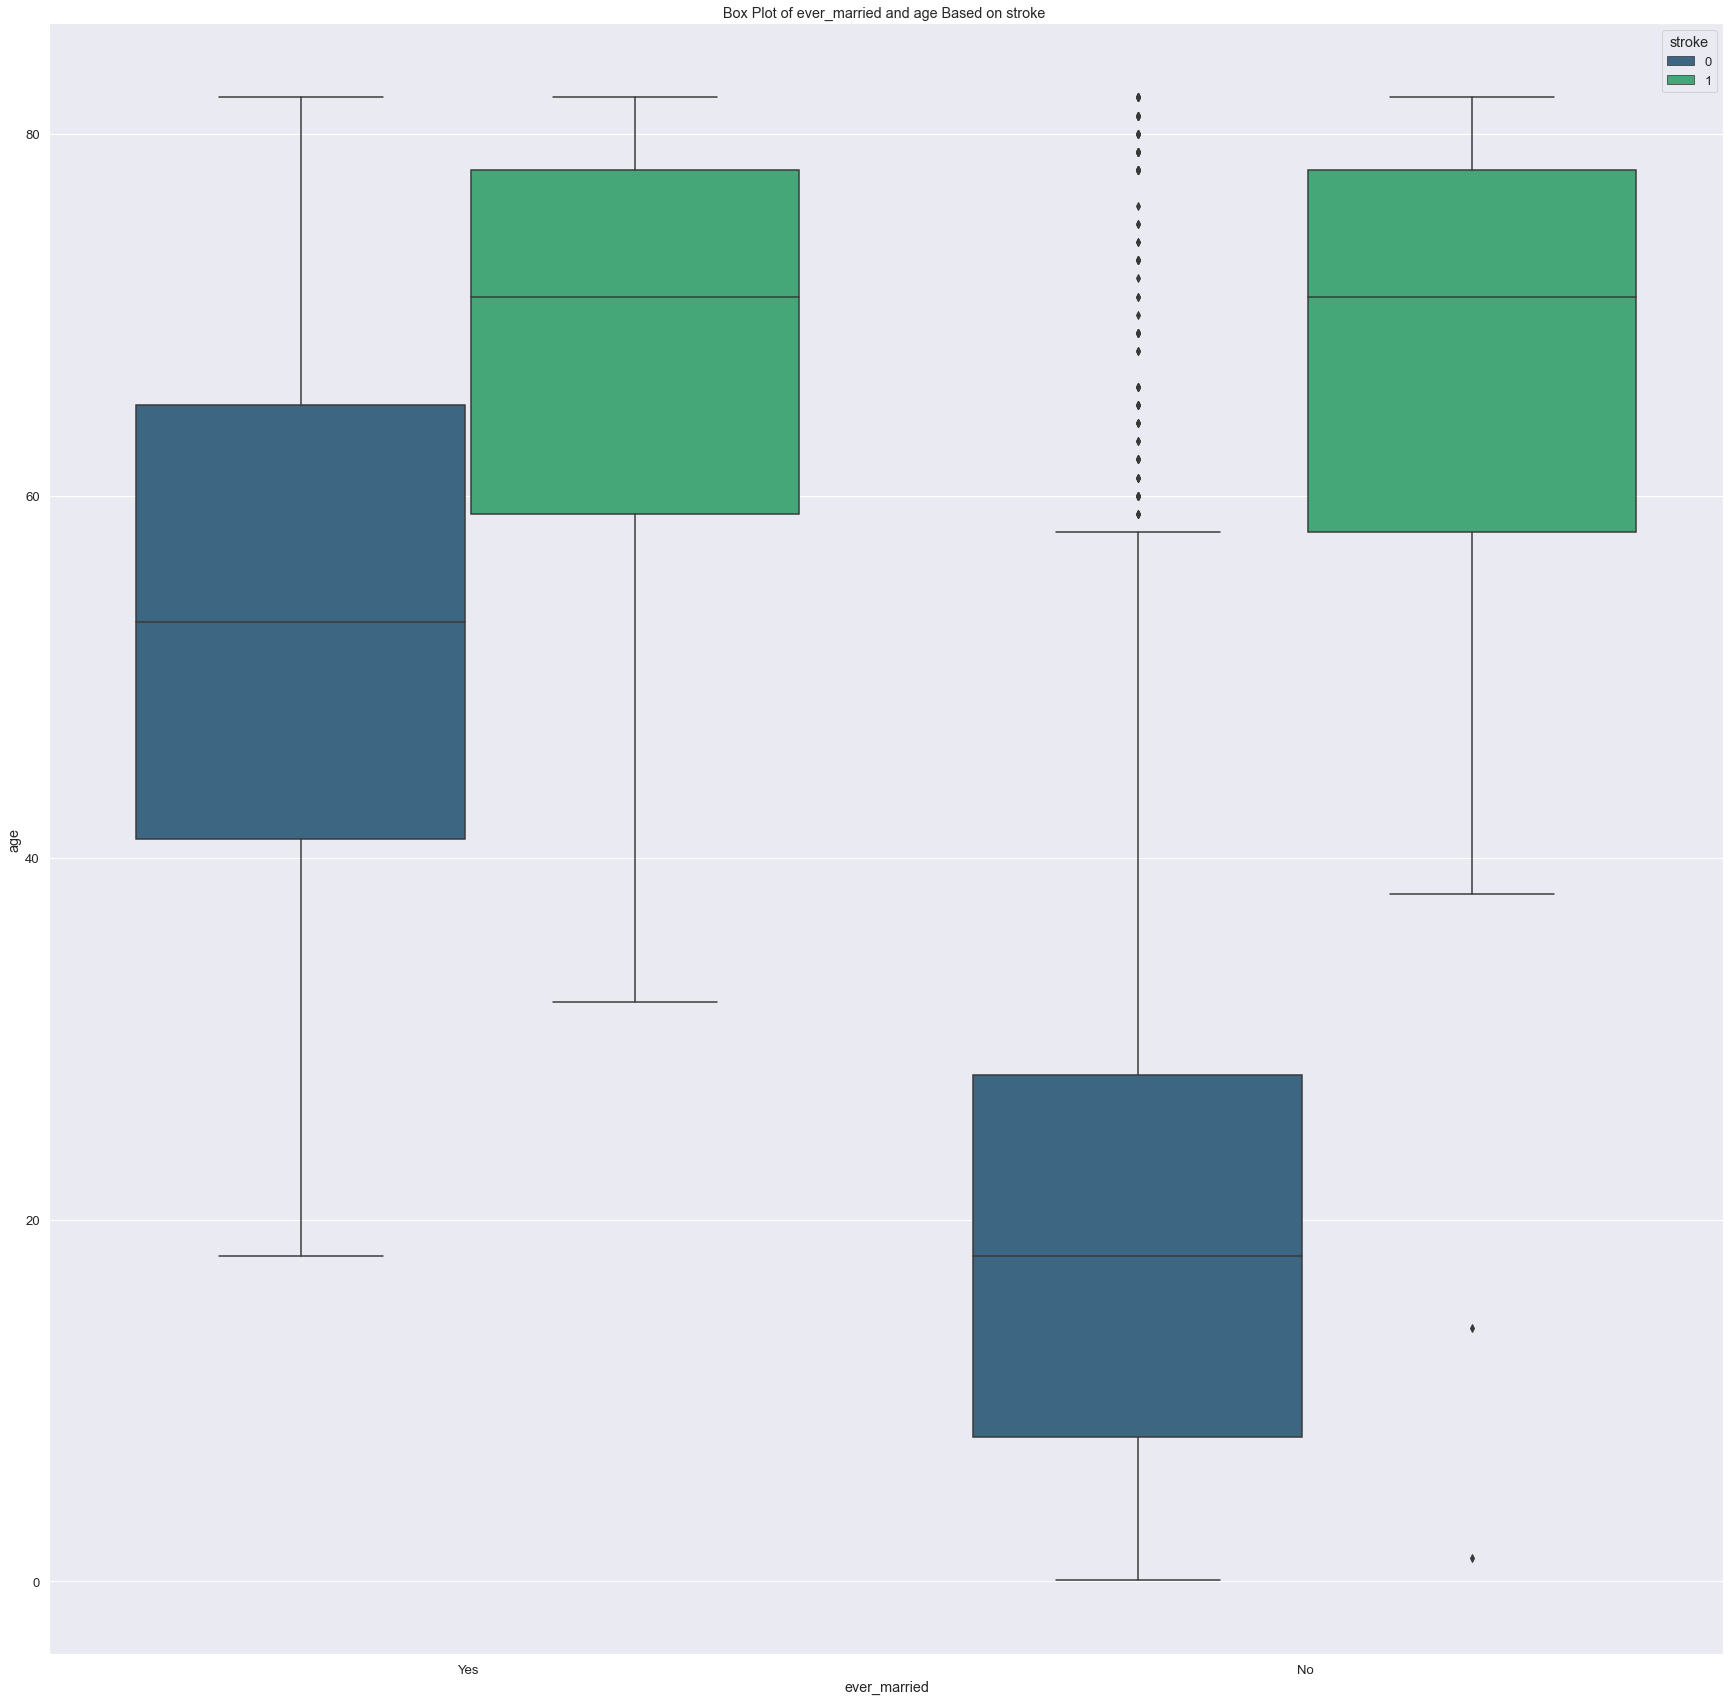

In [77]:
sns.boxplot( x = "ever_married" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of ever_married and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of work_type and age Based on stroke ')

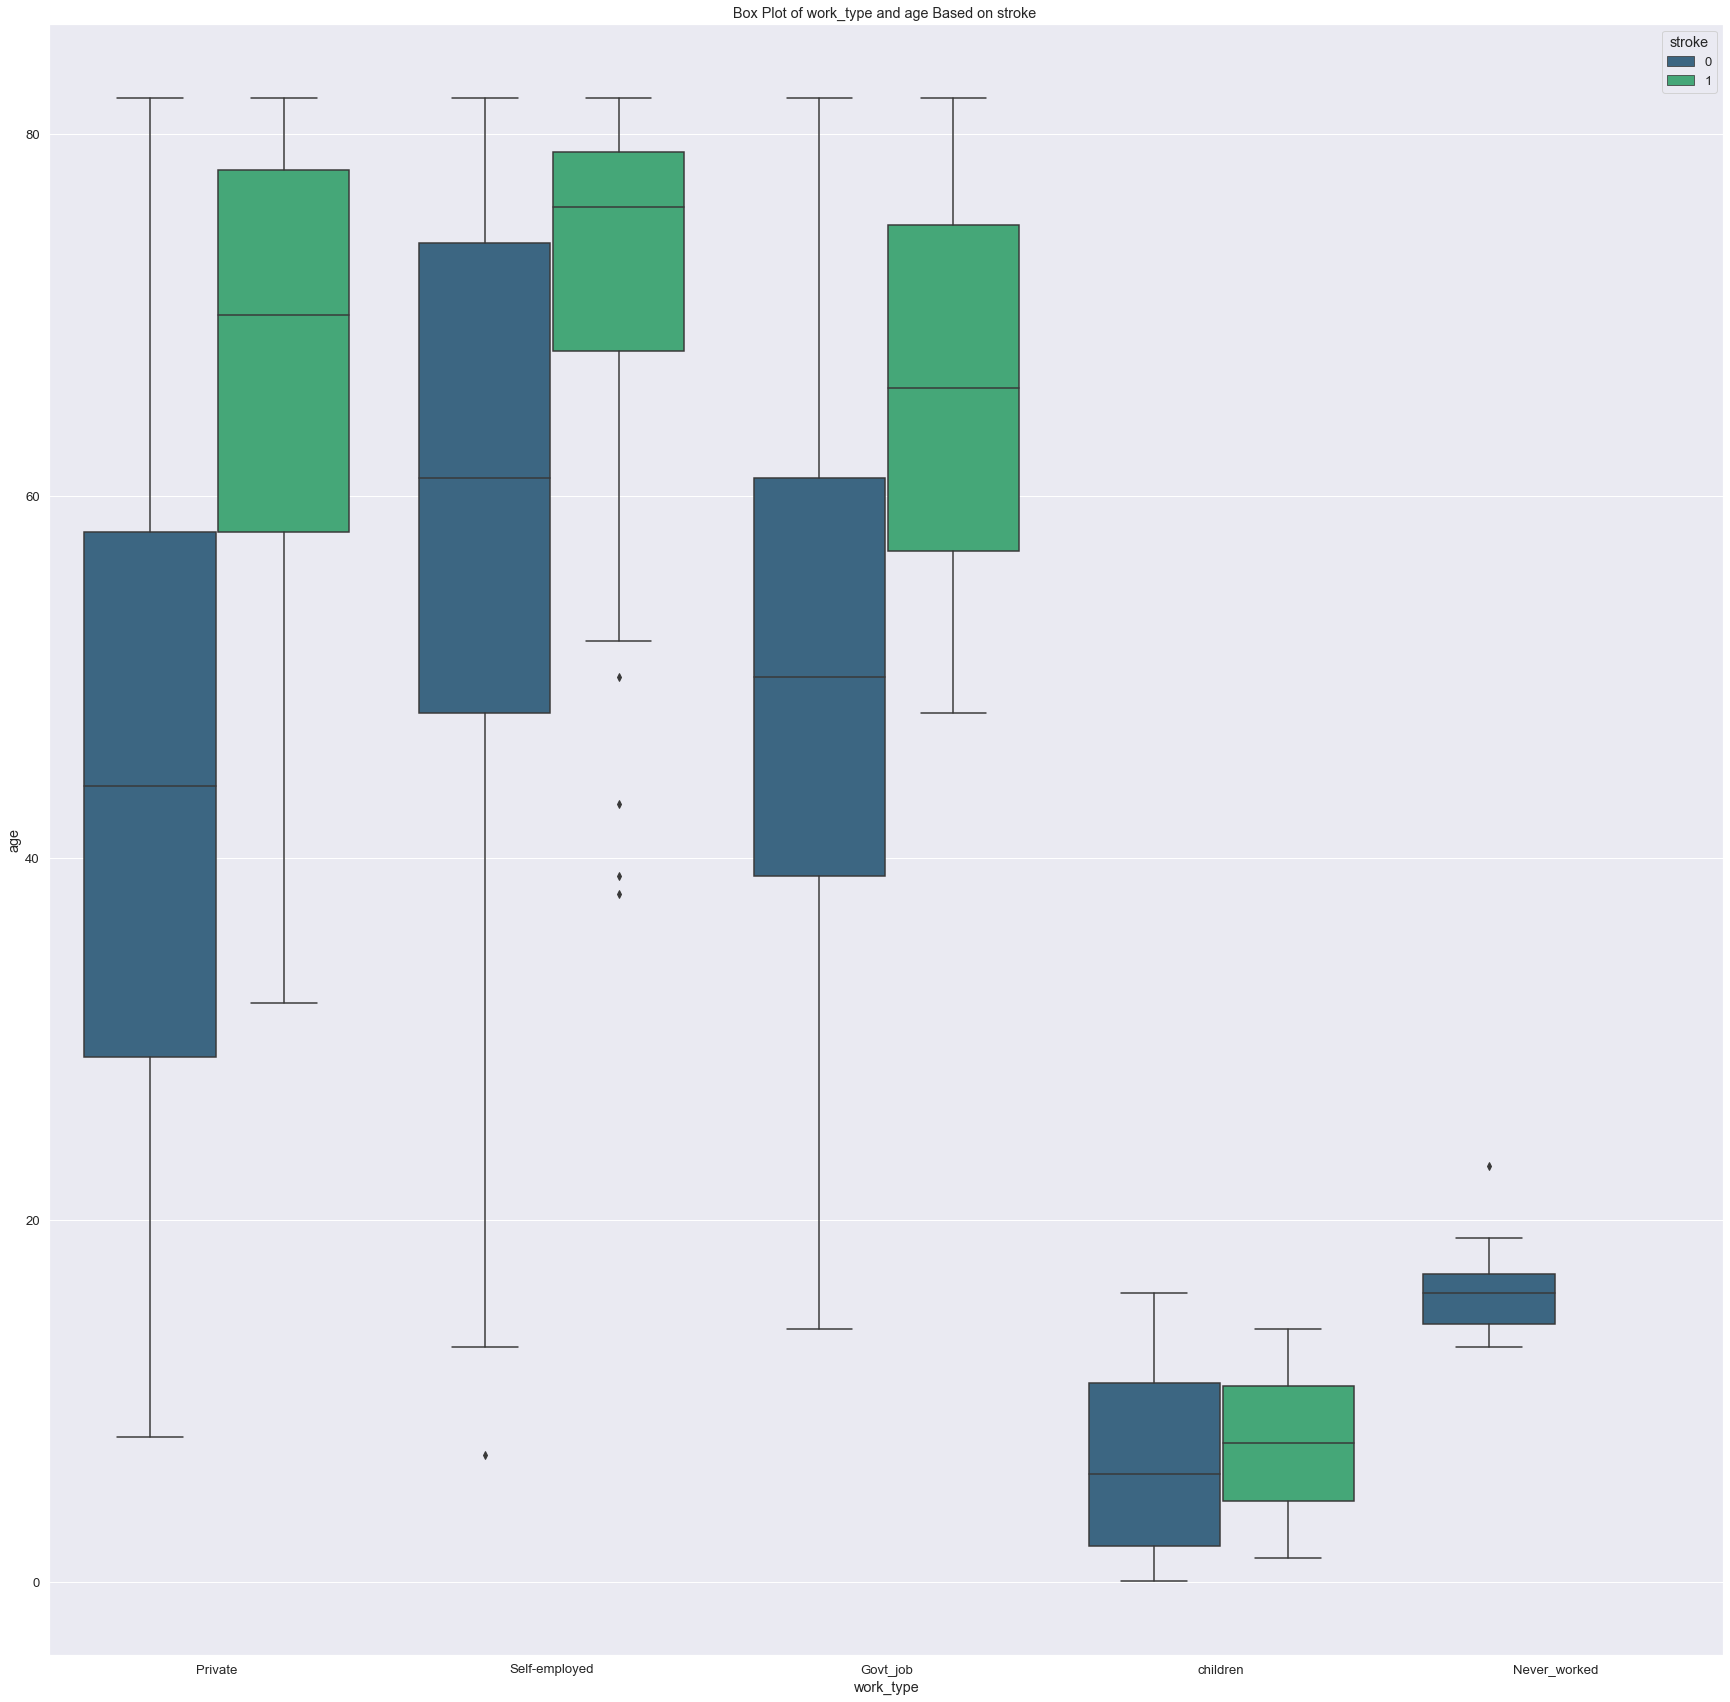

In [78]:
sns.boxplot( x = "work_type" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of work_type and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of Residence_type and age Based on stroke ')

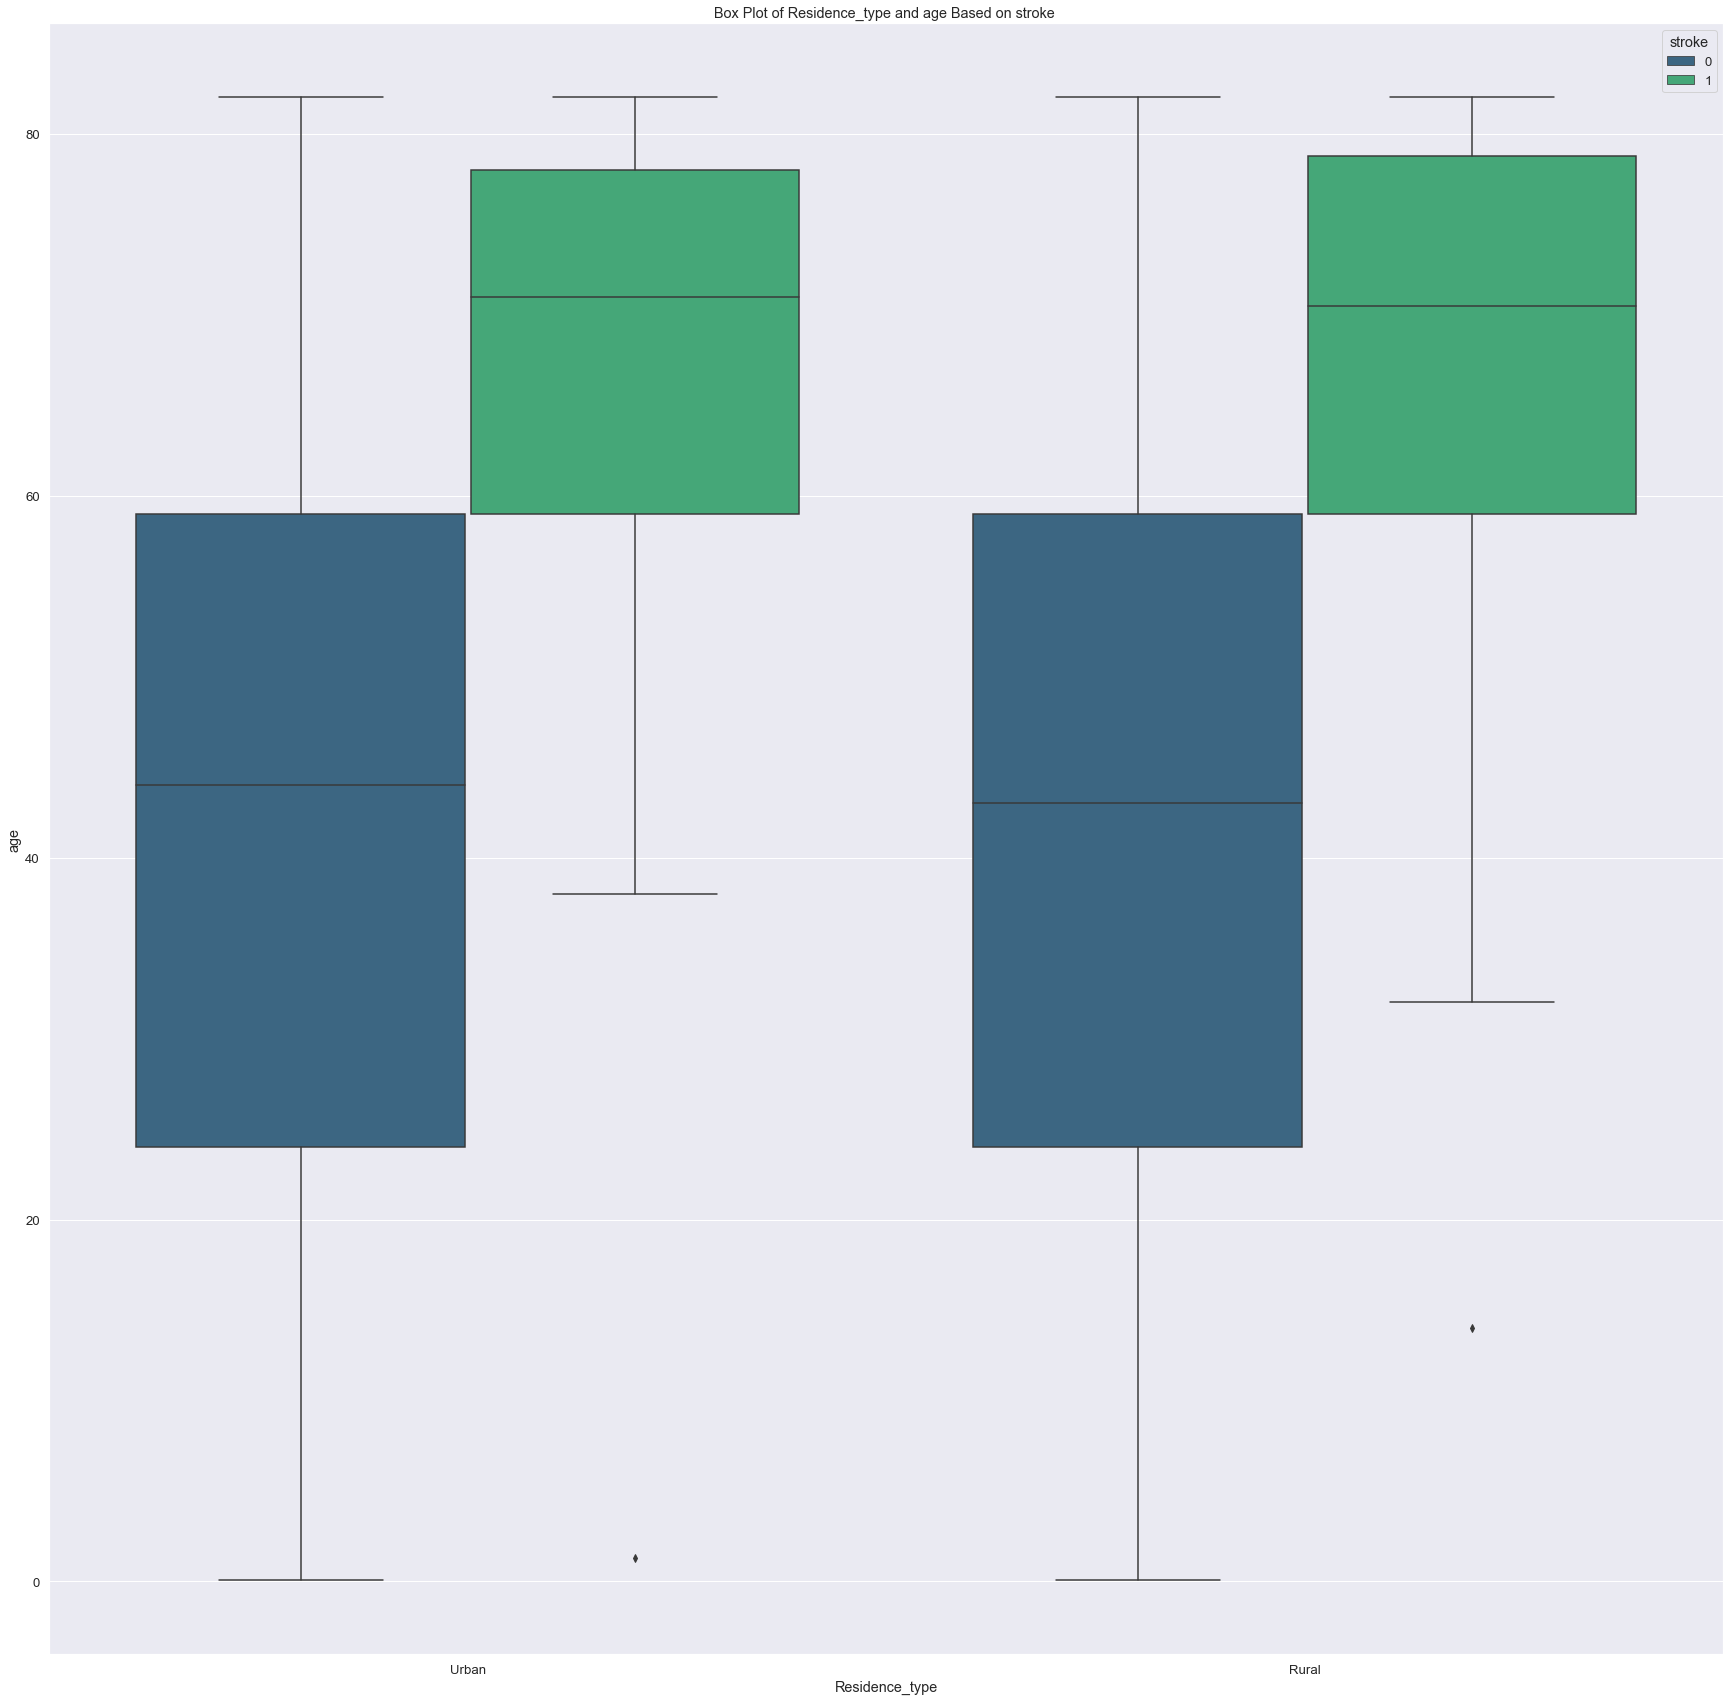

In [79]:
sns.boxplot( x = "Residence_type" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Residence_type and age Based on stroke ")

Text(0.5, 1.0, 'Box Plot of smoking_status and age Based on stroke ')

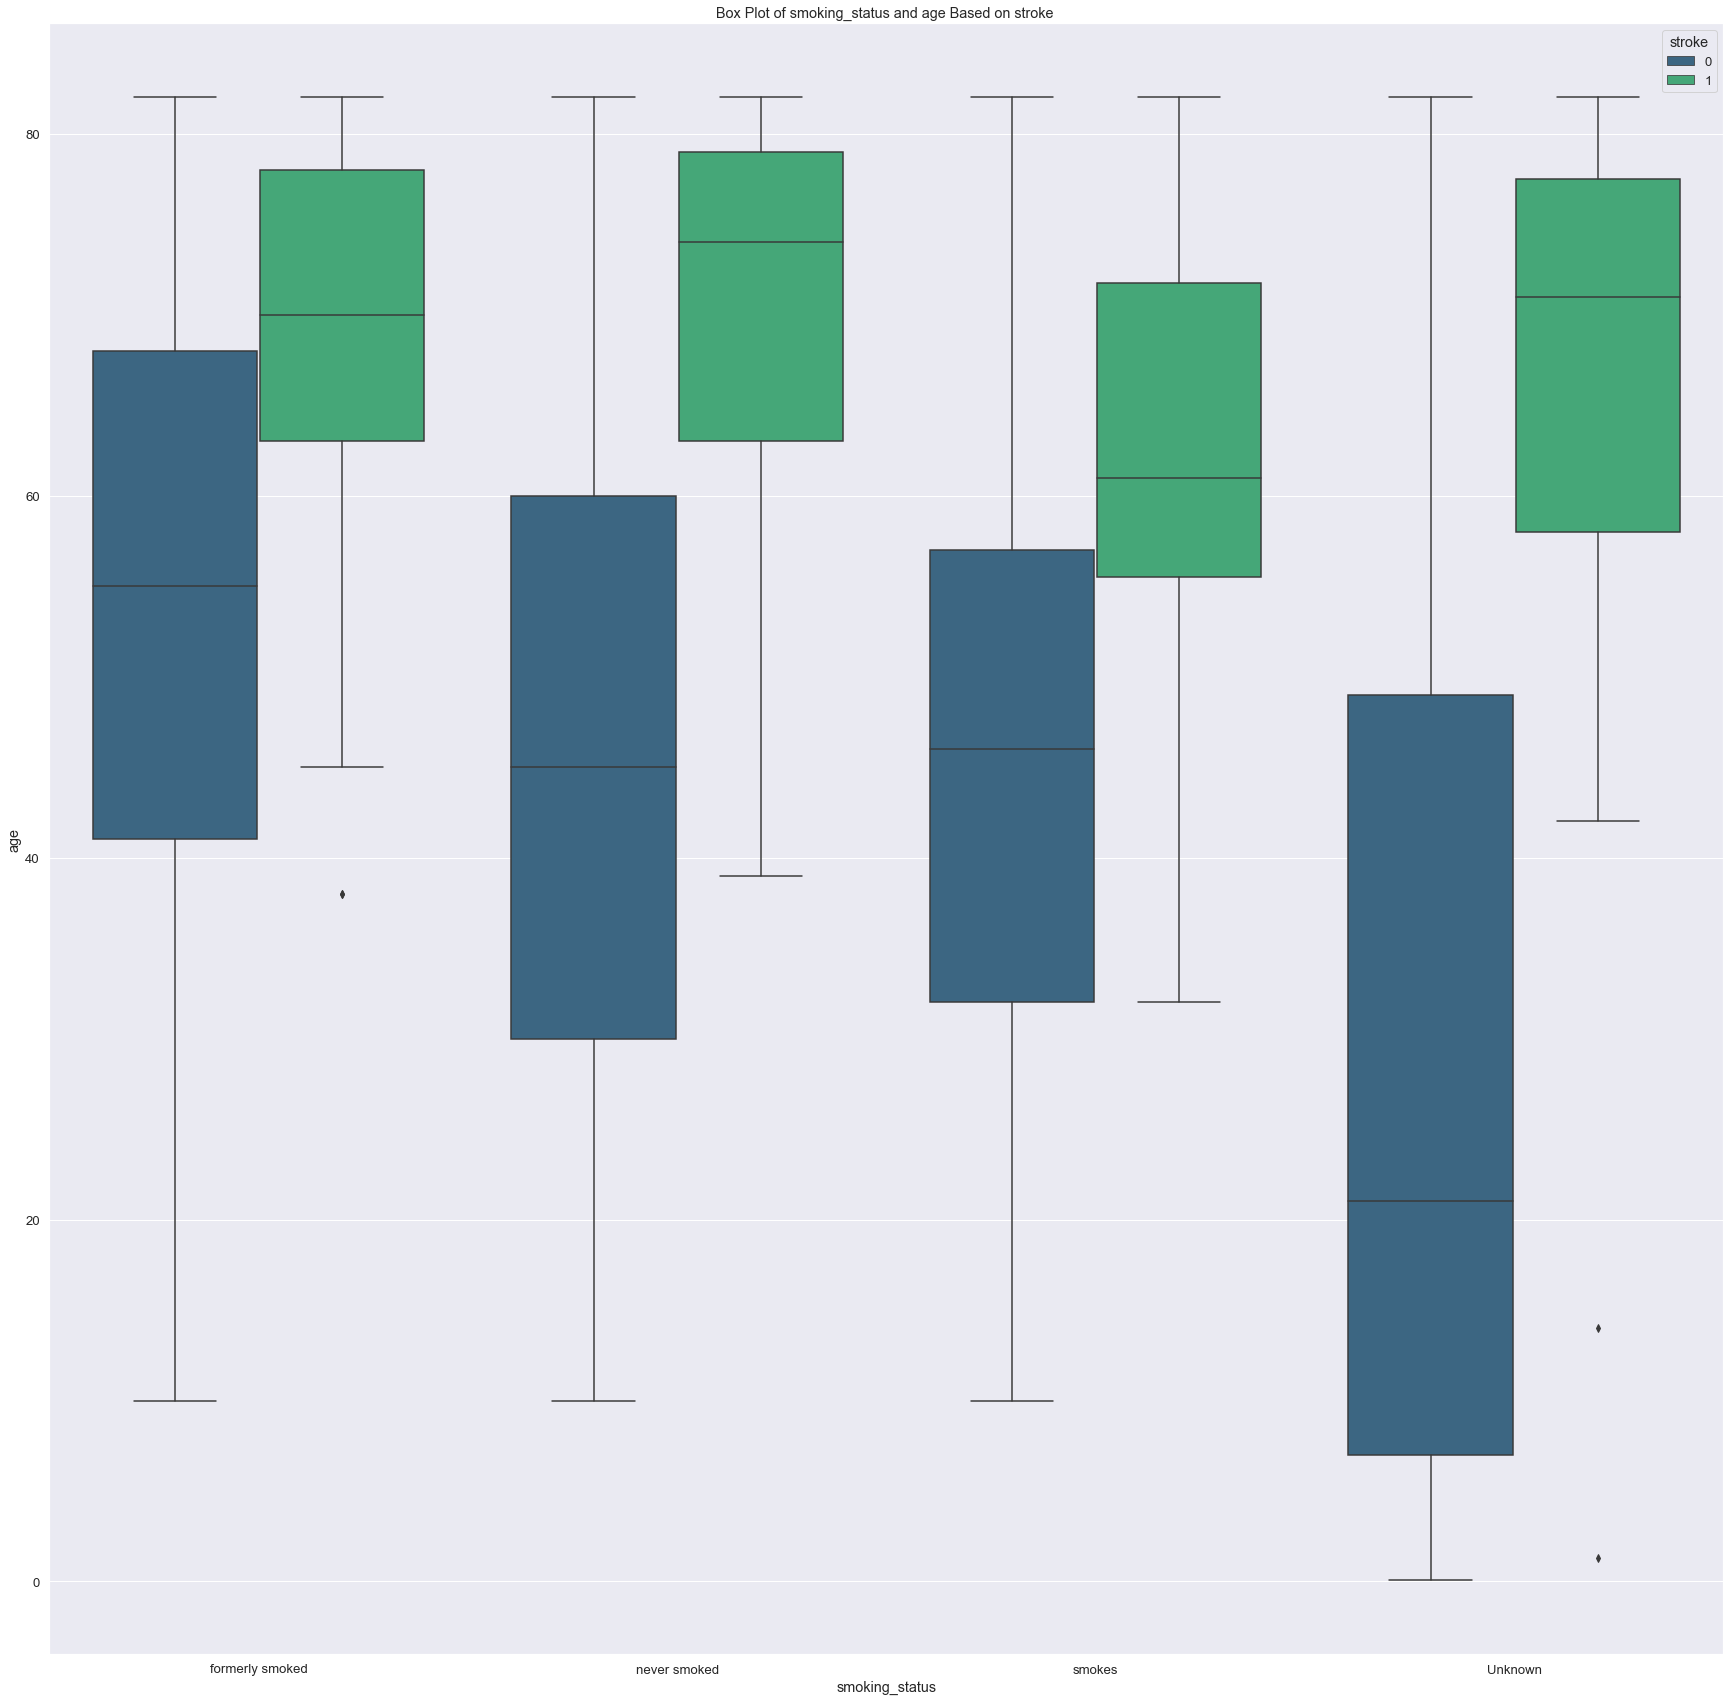

In [80]:
sns.boxplot( x = "smoking_status" , y = "age" , data = df ,hue = "stroke" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of smoking_status and age Based on stroke ")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(0.5, 1.0, 'Count Plot of gender  Based on stroke ')

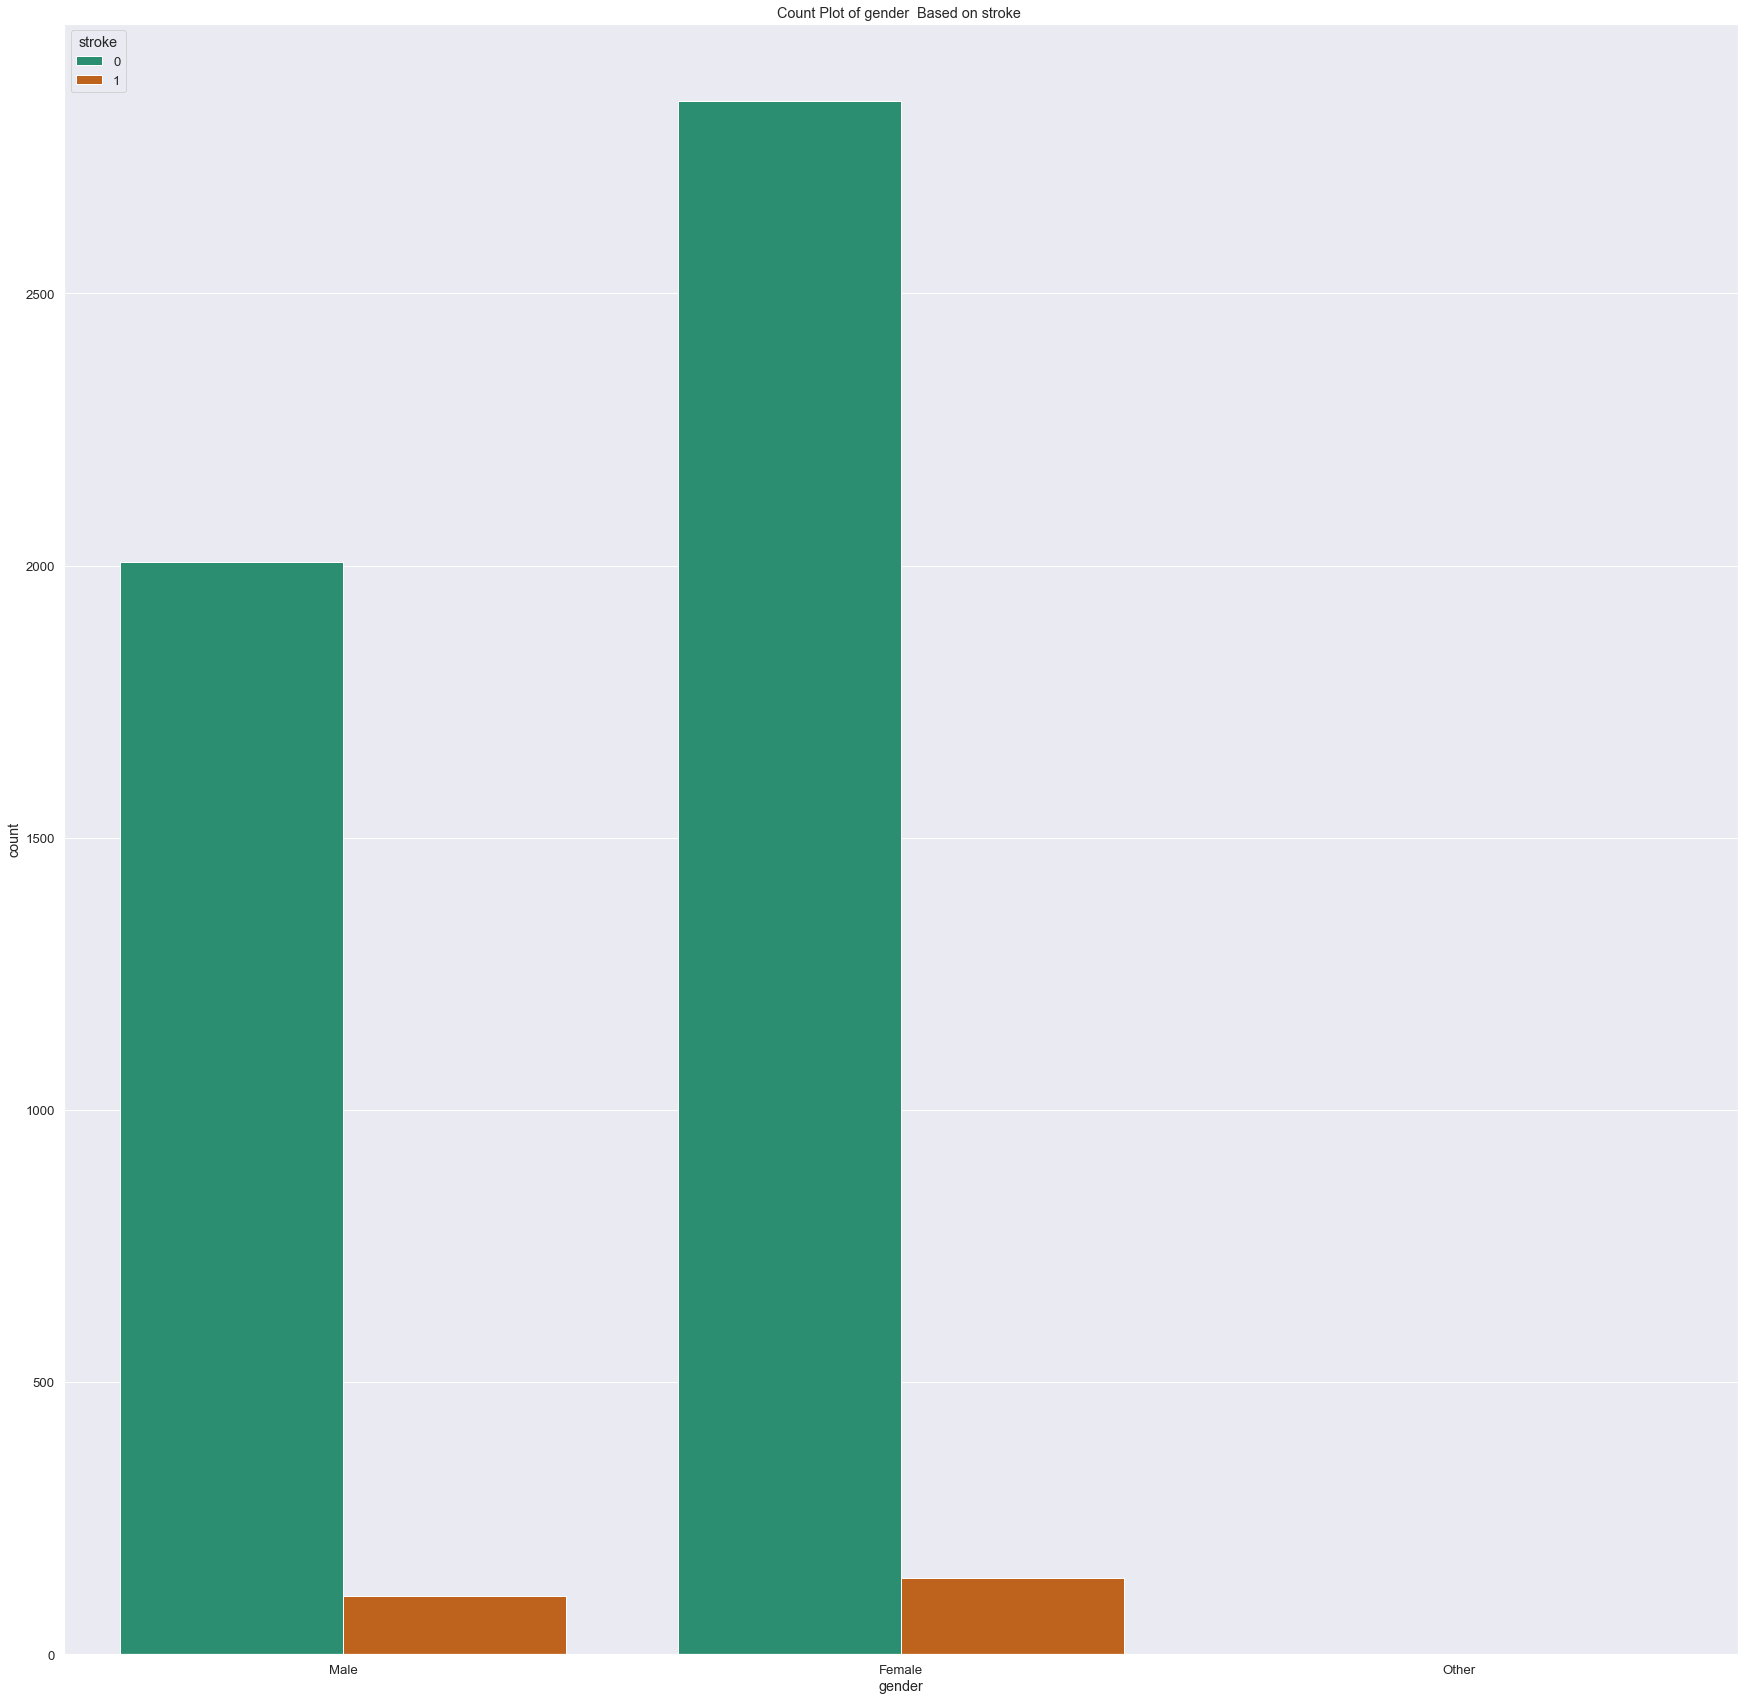

In [82]:
sns.countplot( x = "gender"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of gender  Based on stroke ")

Text(0.5, 1.0, 'Count Plot of heart_disease  Based on stroke ')

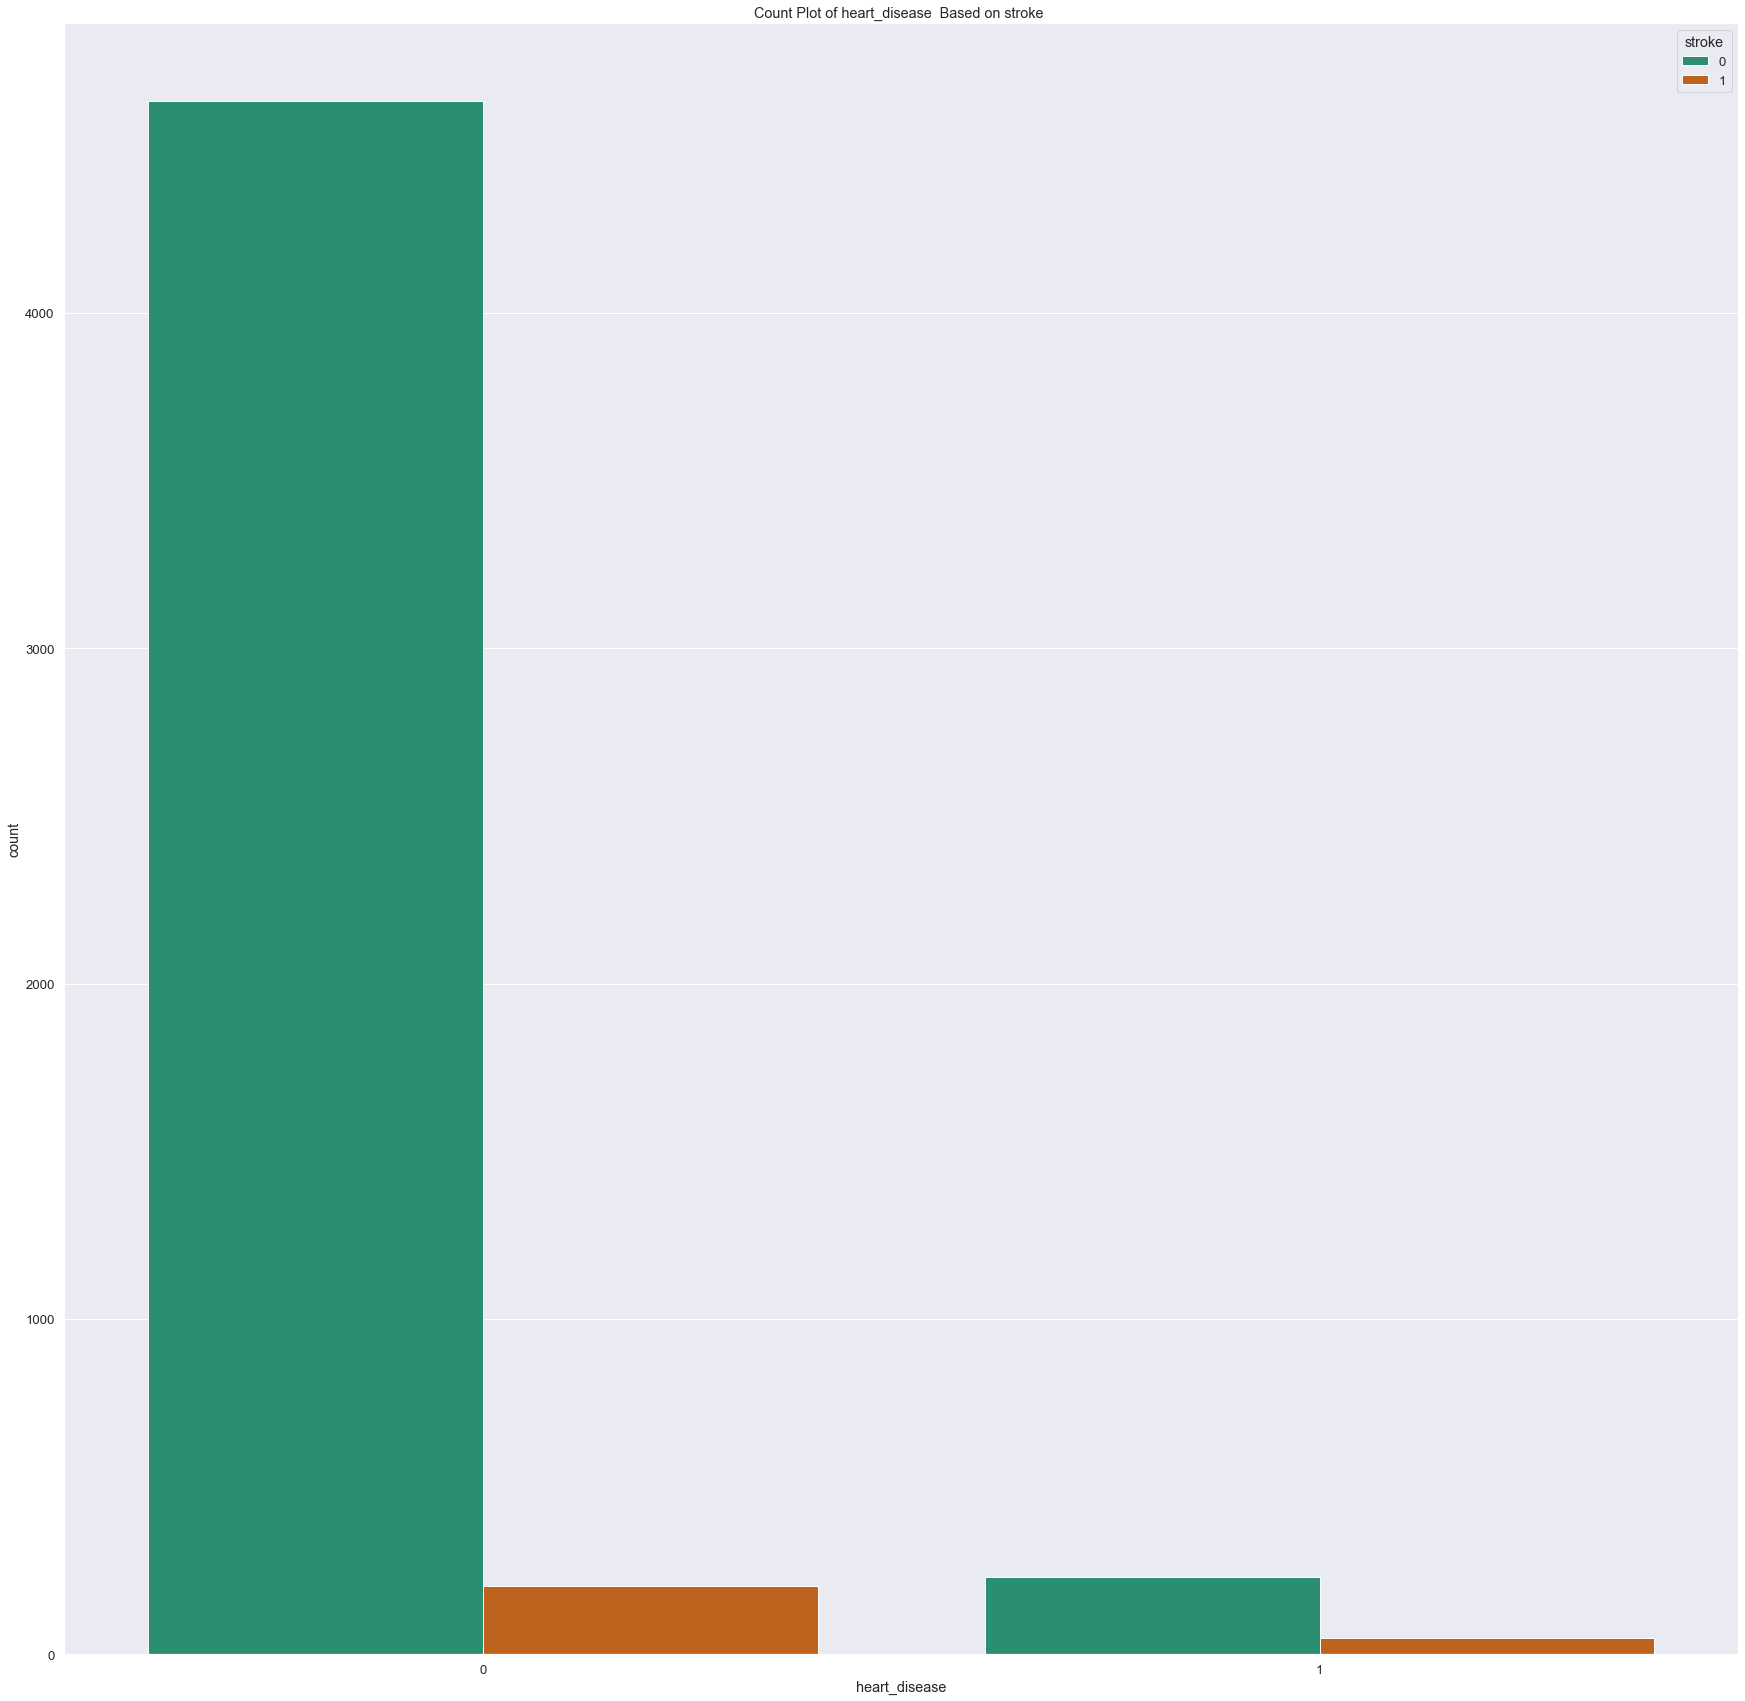

In [83]:
sns.countplot( x = "heart_disease"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of heart_disease  Based on stroke ")

Text(0.5, 1.0, 'Count Plot of ever_married  Based on stroke ')

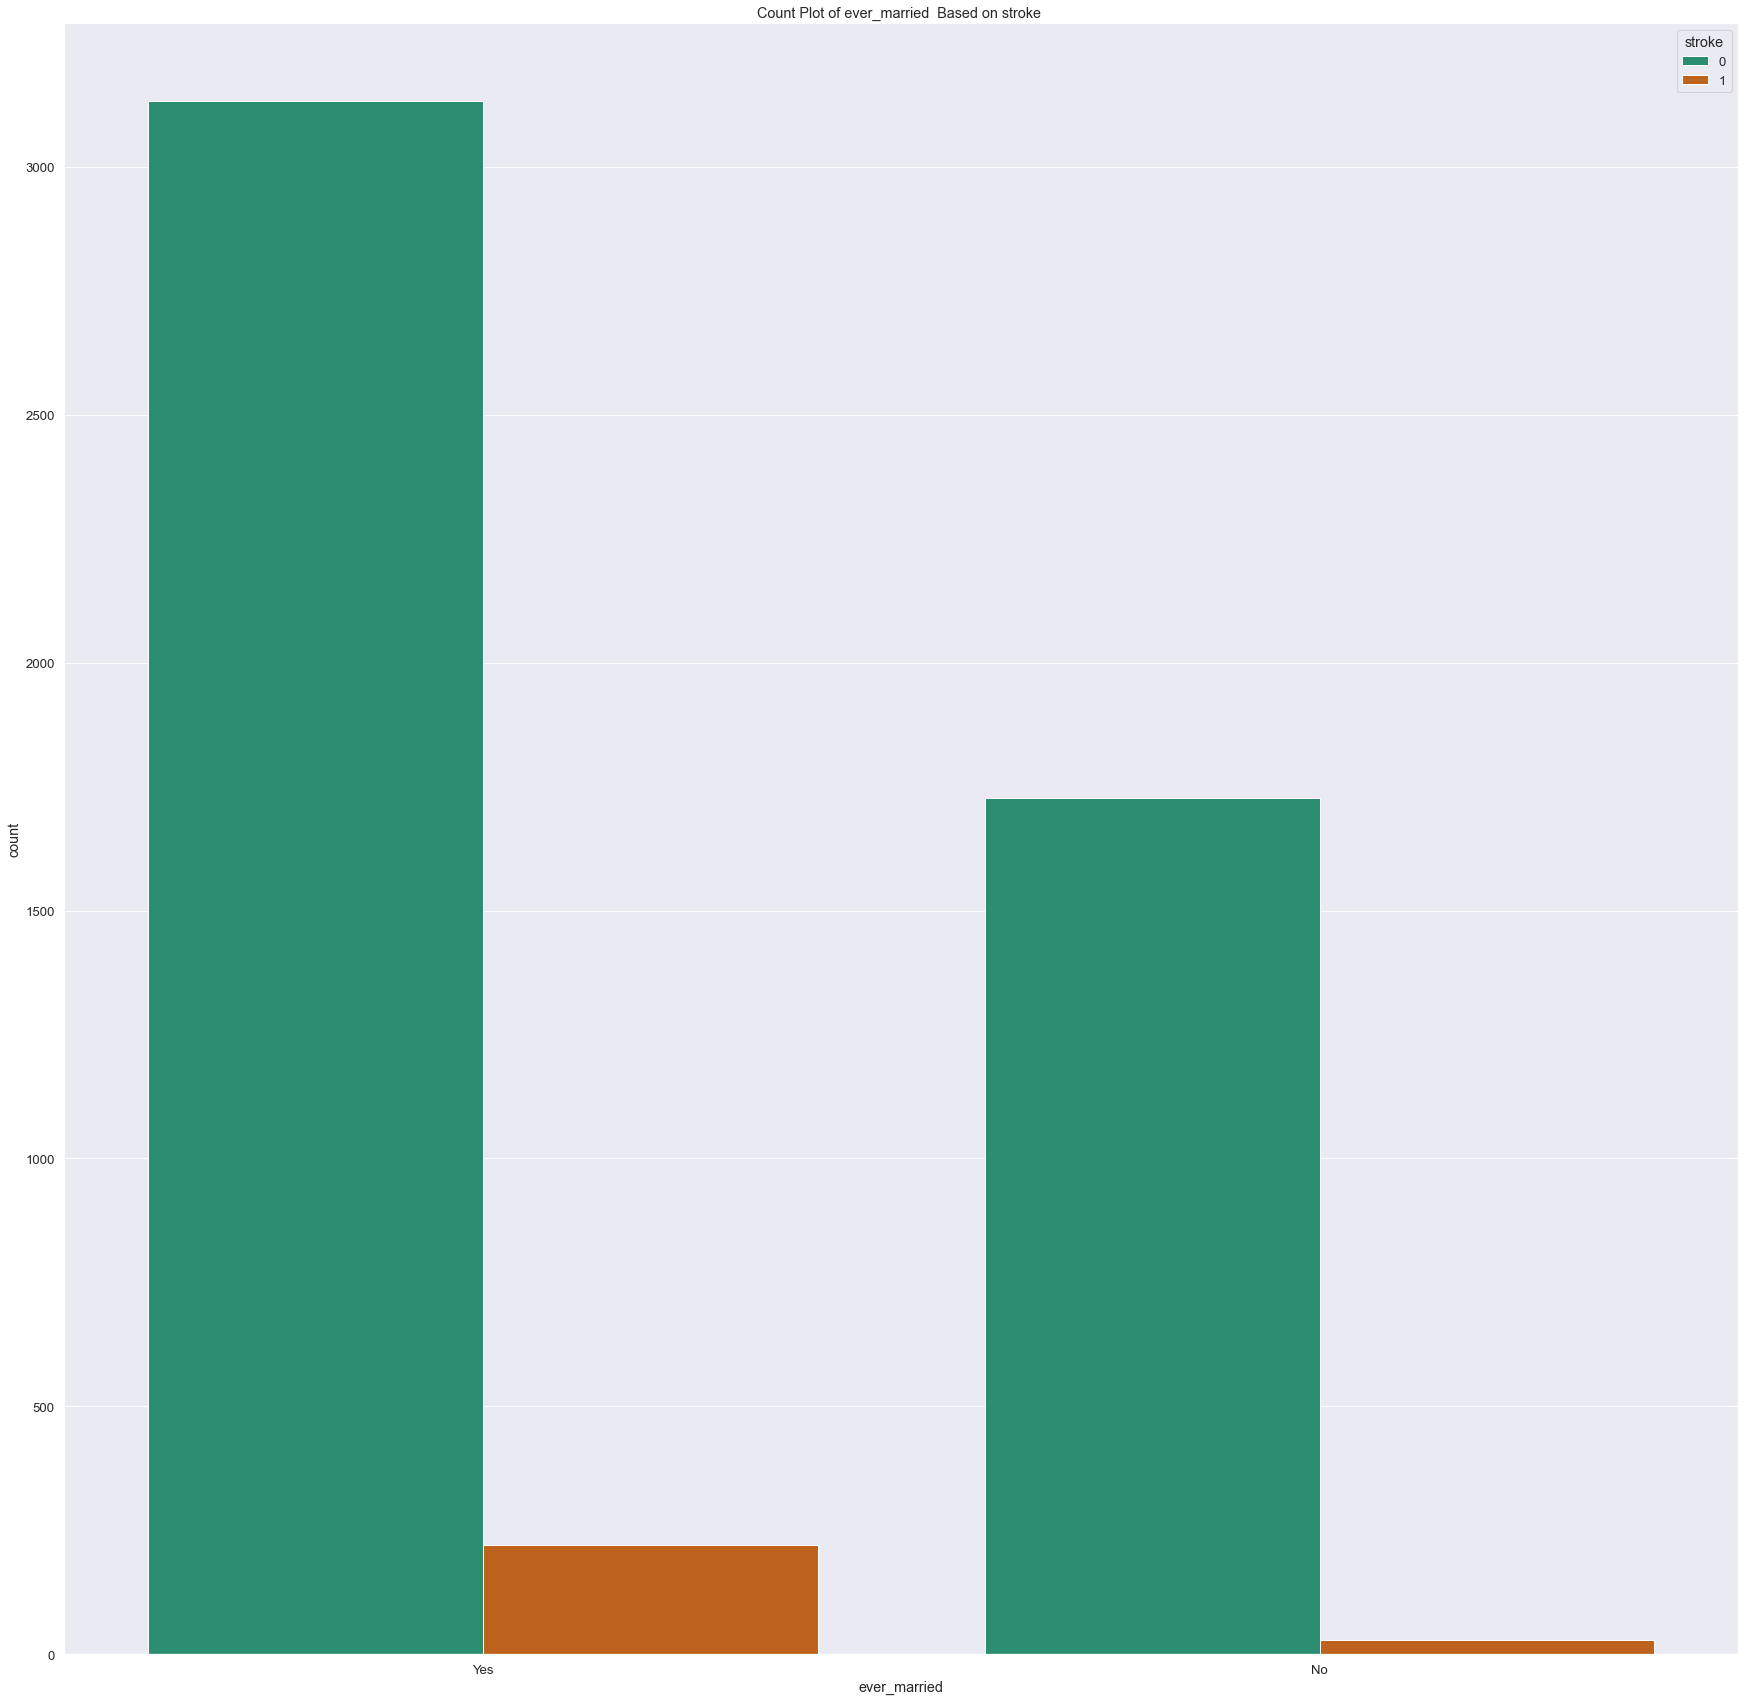

In [84]:
sns.countplot( x = "ever_married"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of ever_married  Based on stroke ")

Text(0.5, 1.0, 'Count Plot of work_type  Based on stroke ')

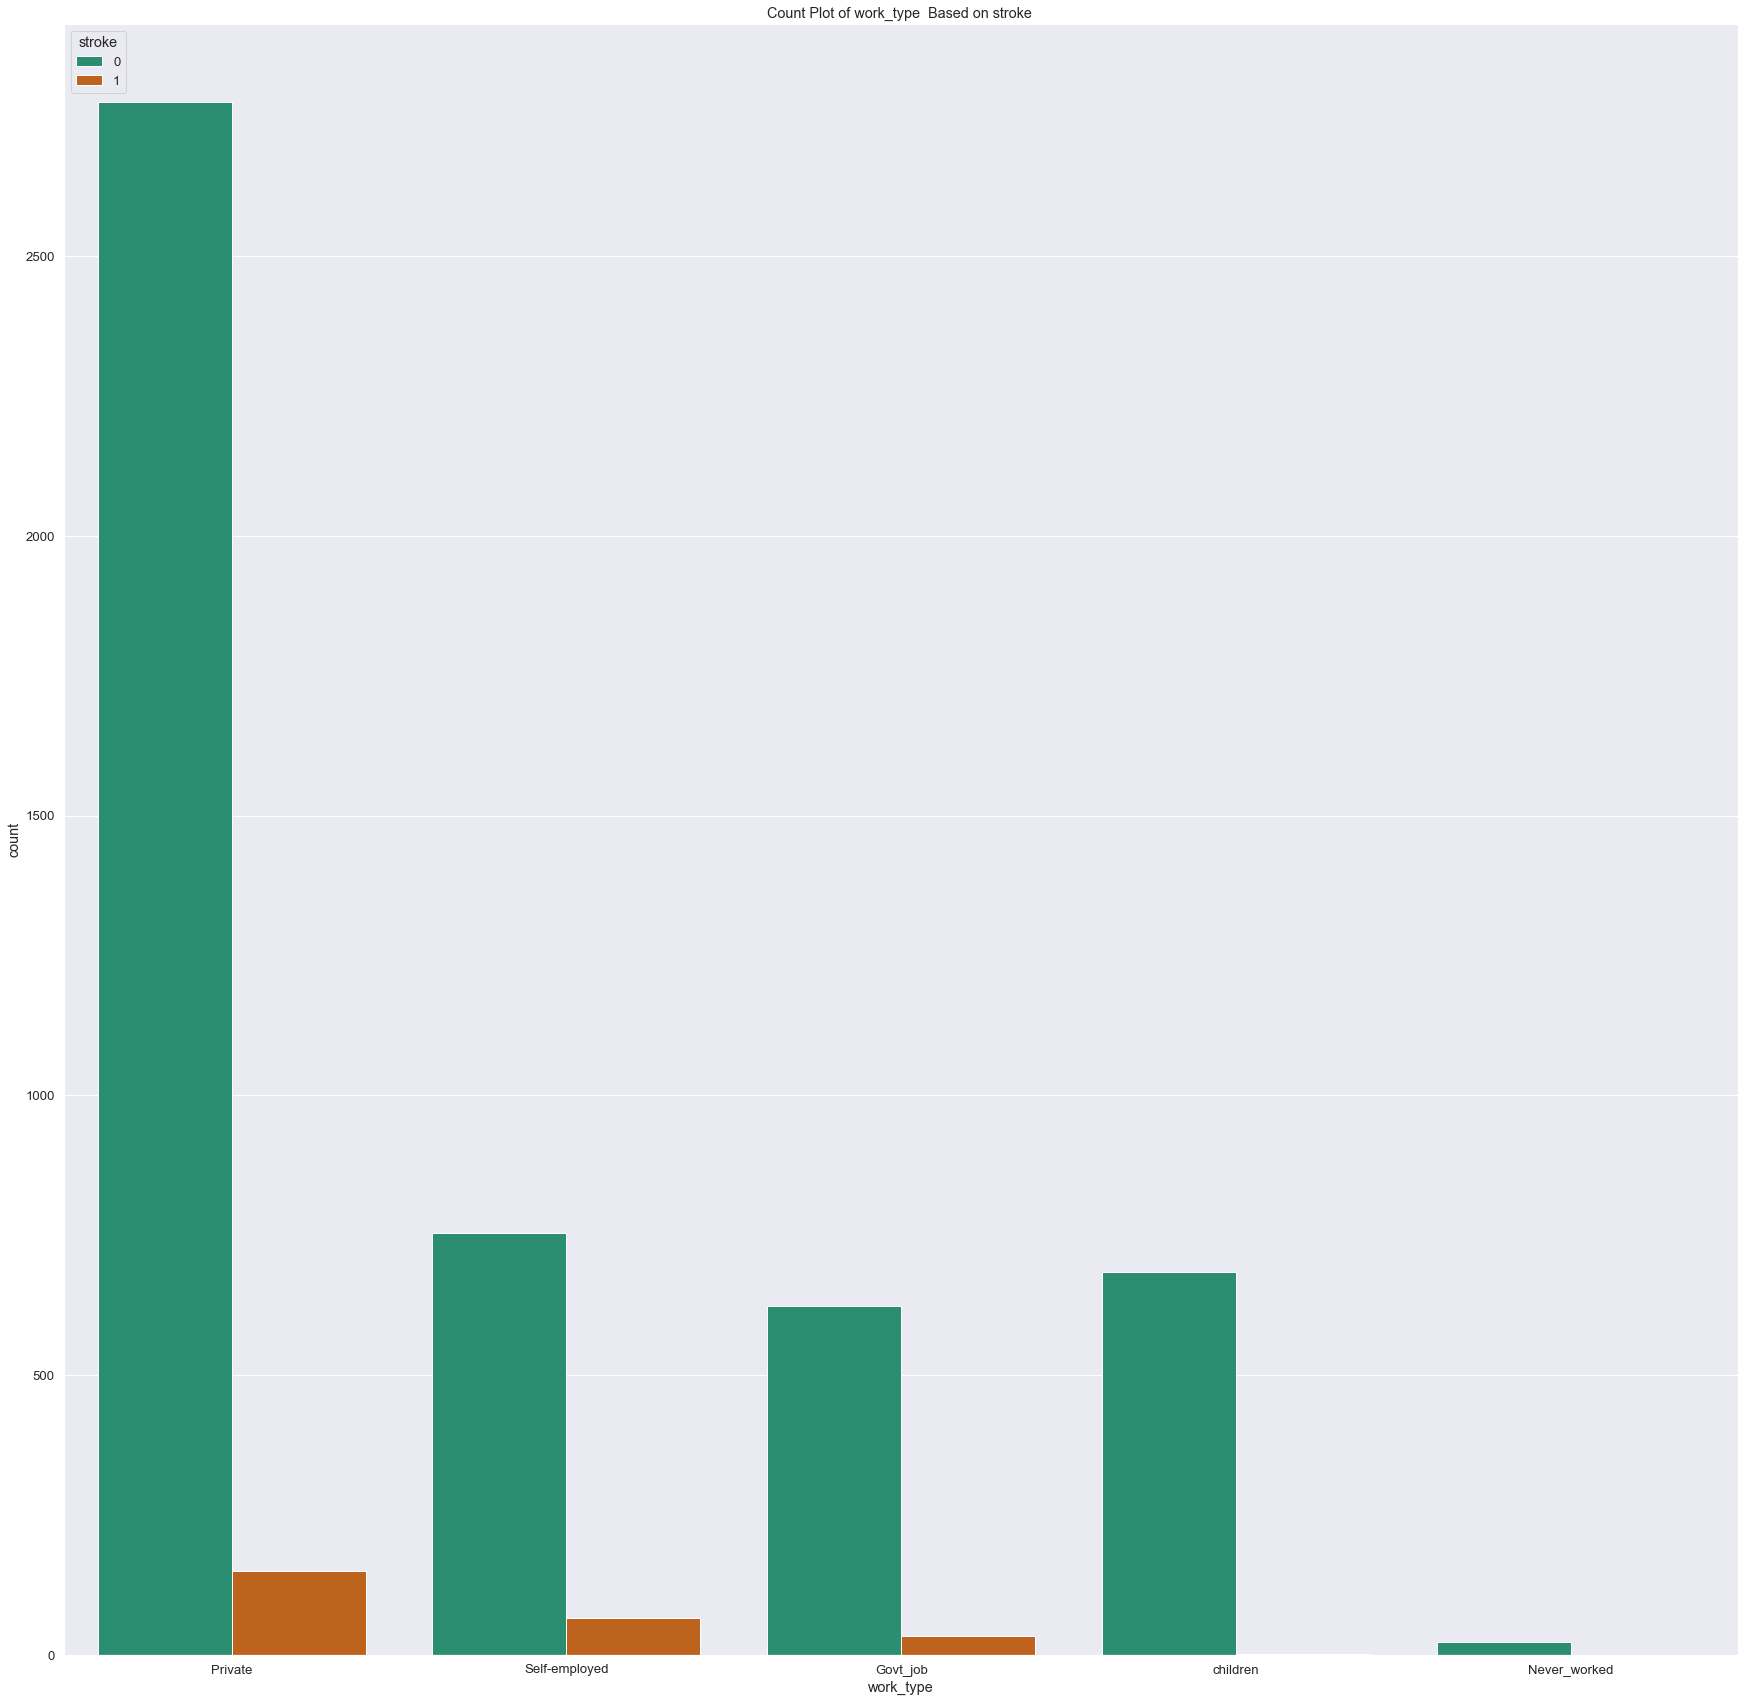

In [85]:
sns.countplot( x = "work_type"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of work_type  Based on stroke ")

Text(0.5, 1.0, 'Count Plot of Residence_type  Based on stroke ')

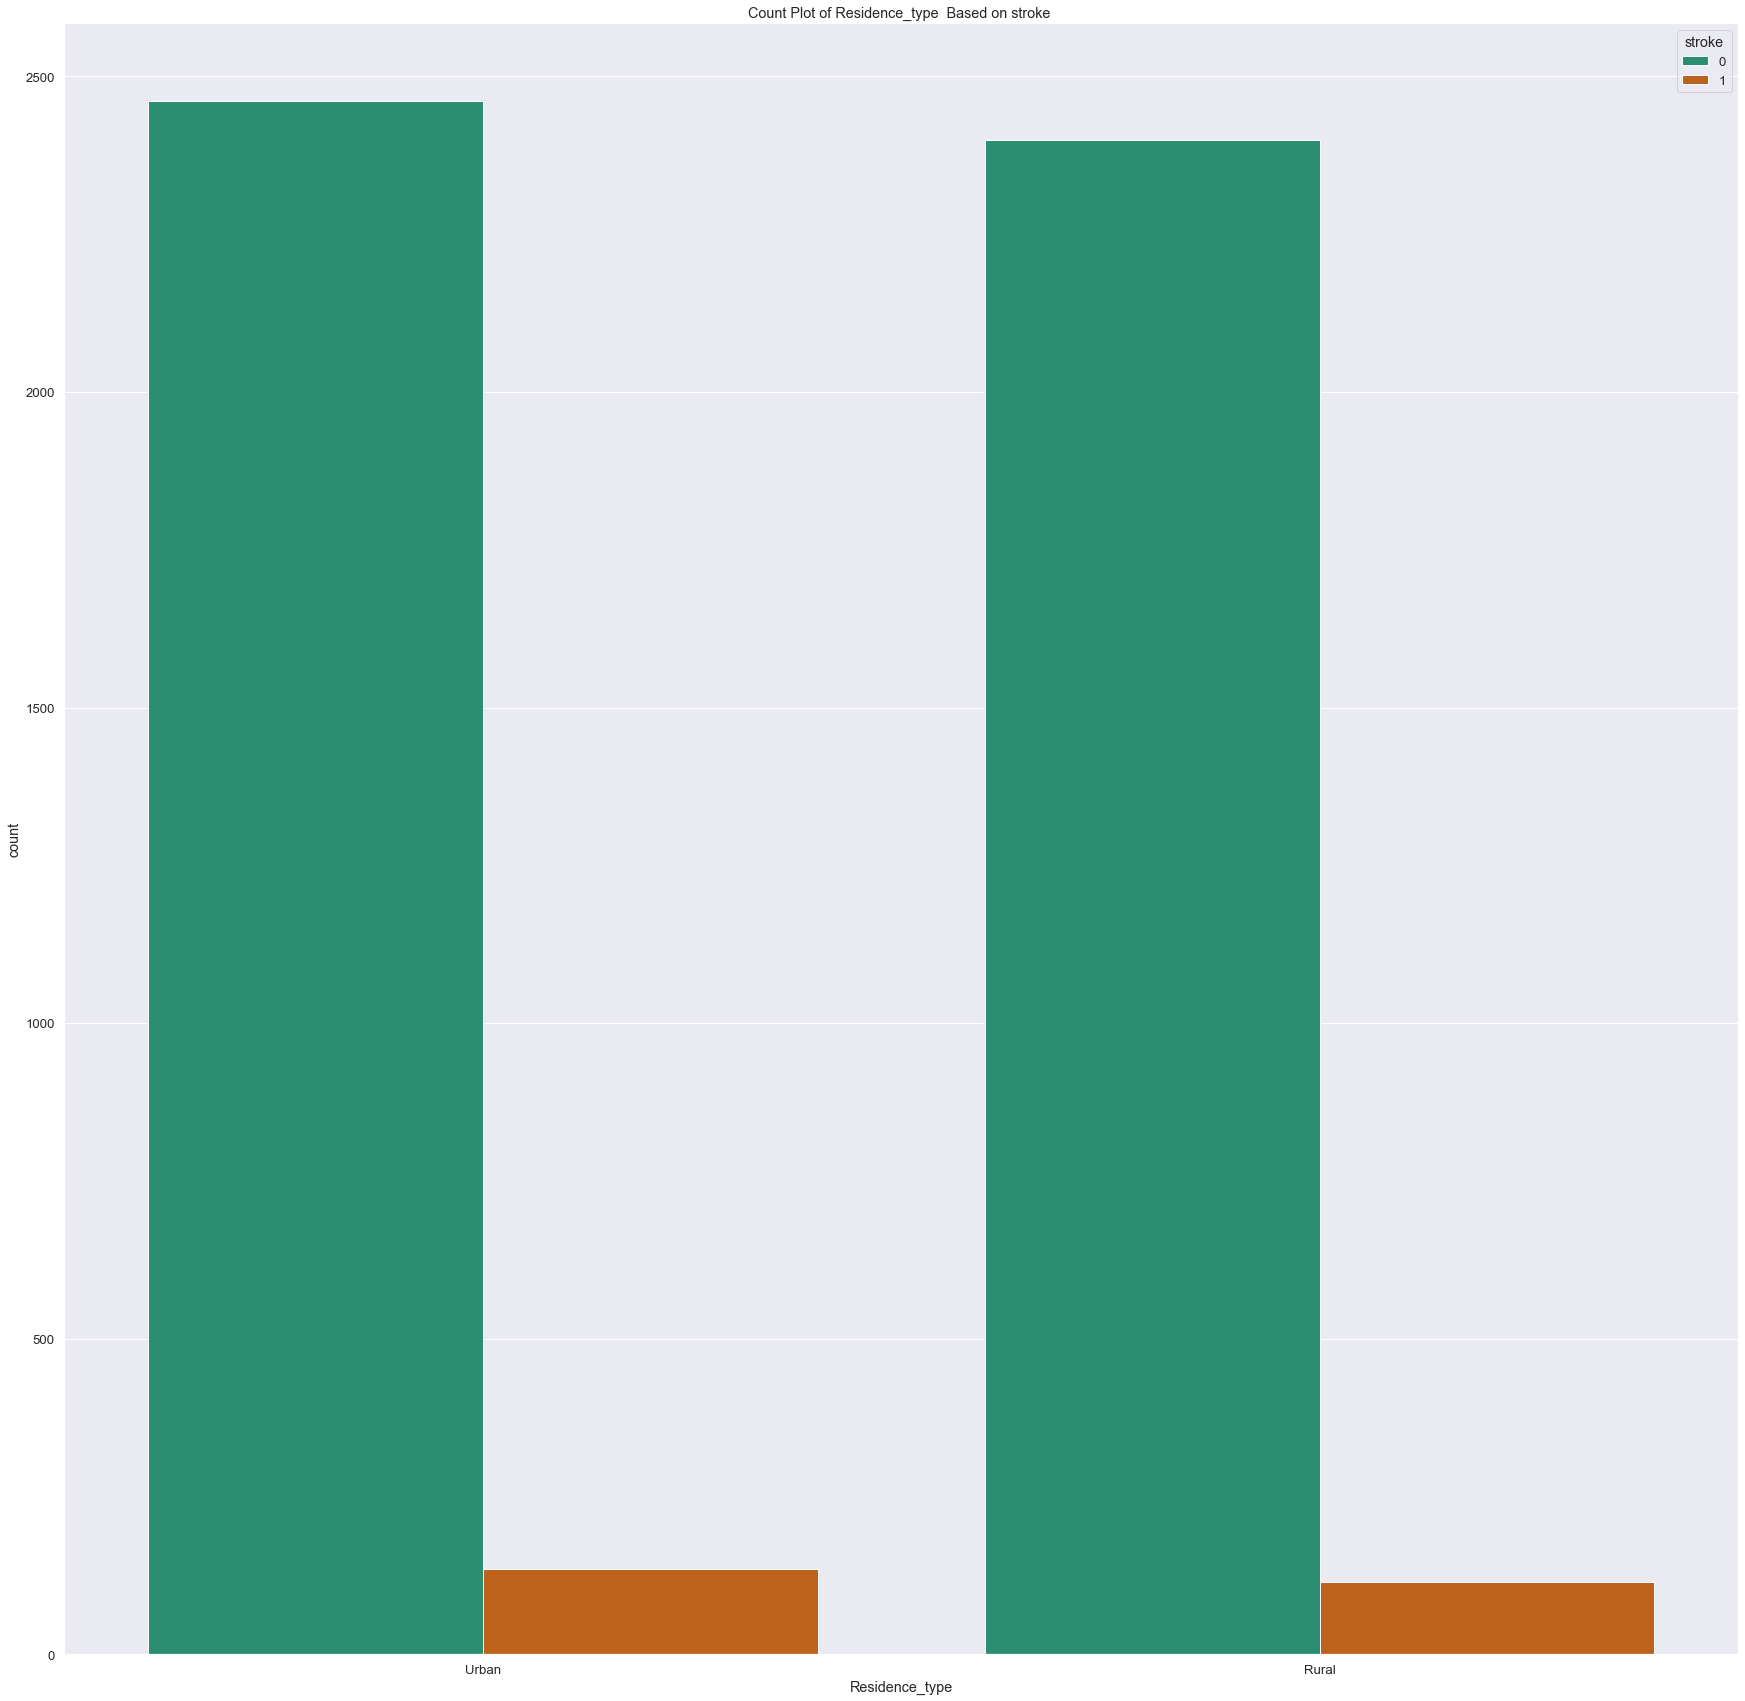

In [86]:
sns.countplot( x = "Residence_type"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of Residence_type  Based on stroke ")

Text(0.5, 1.0, 'Count Plot of smoking_status  Based on stroke ')

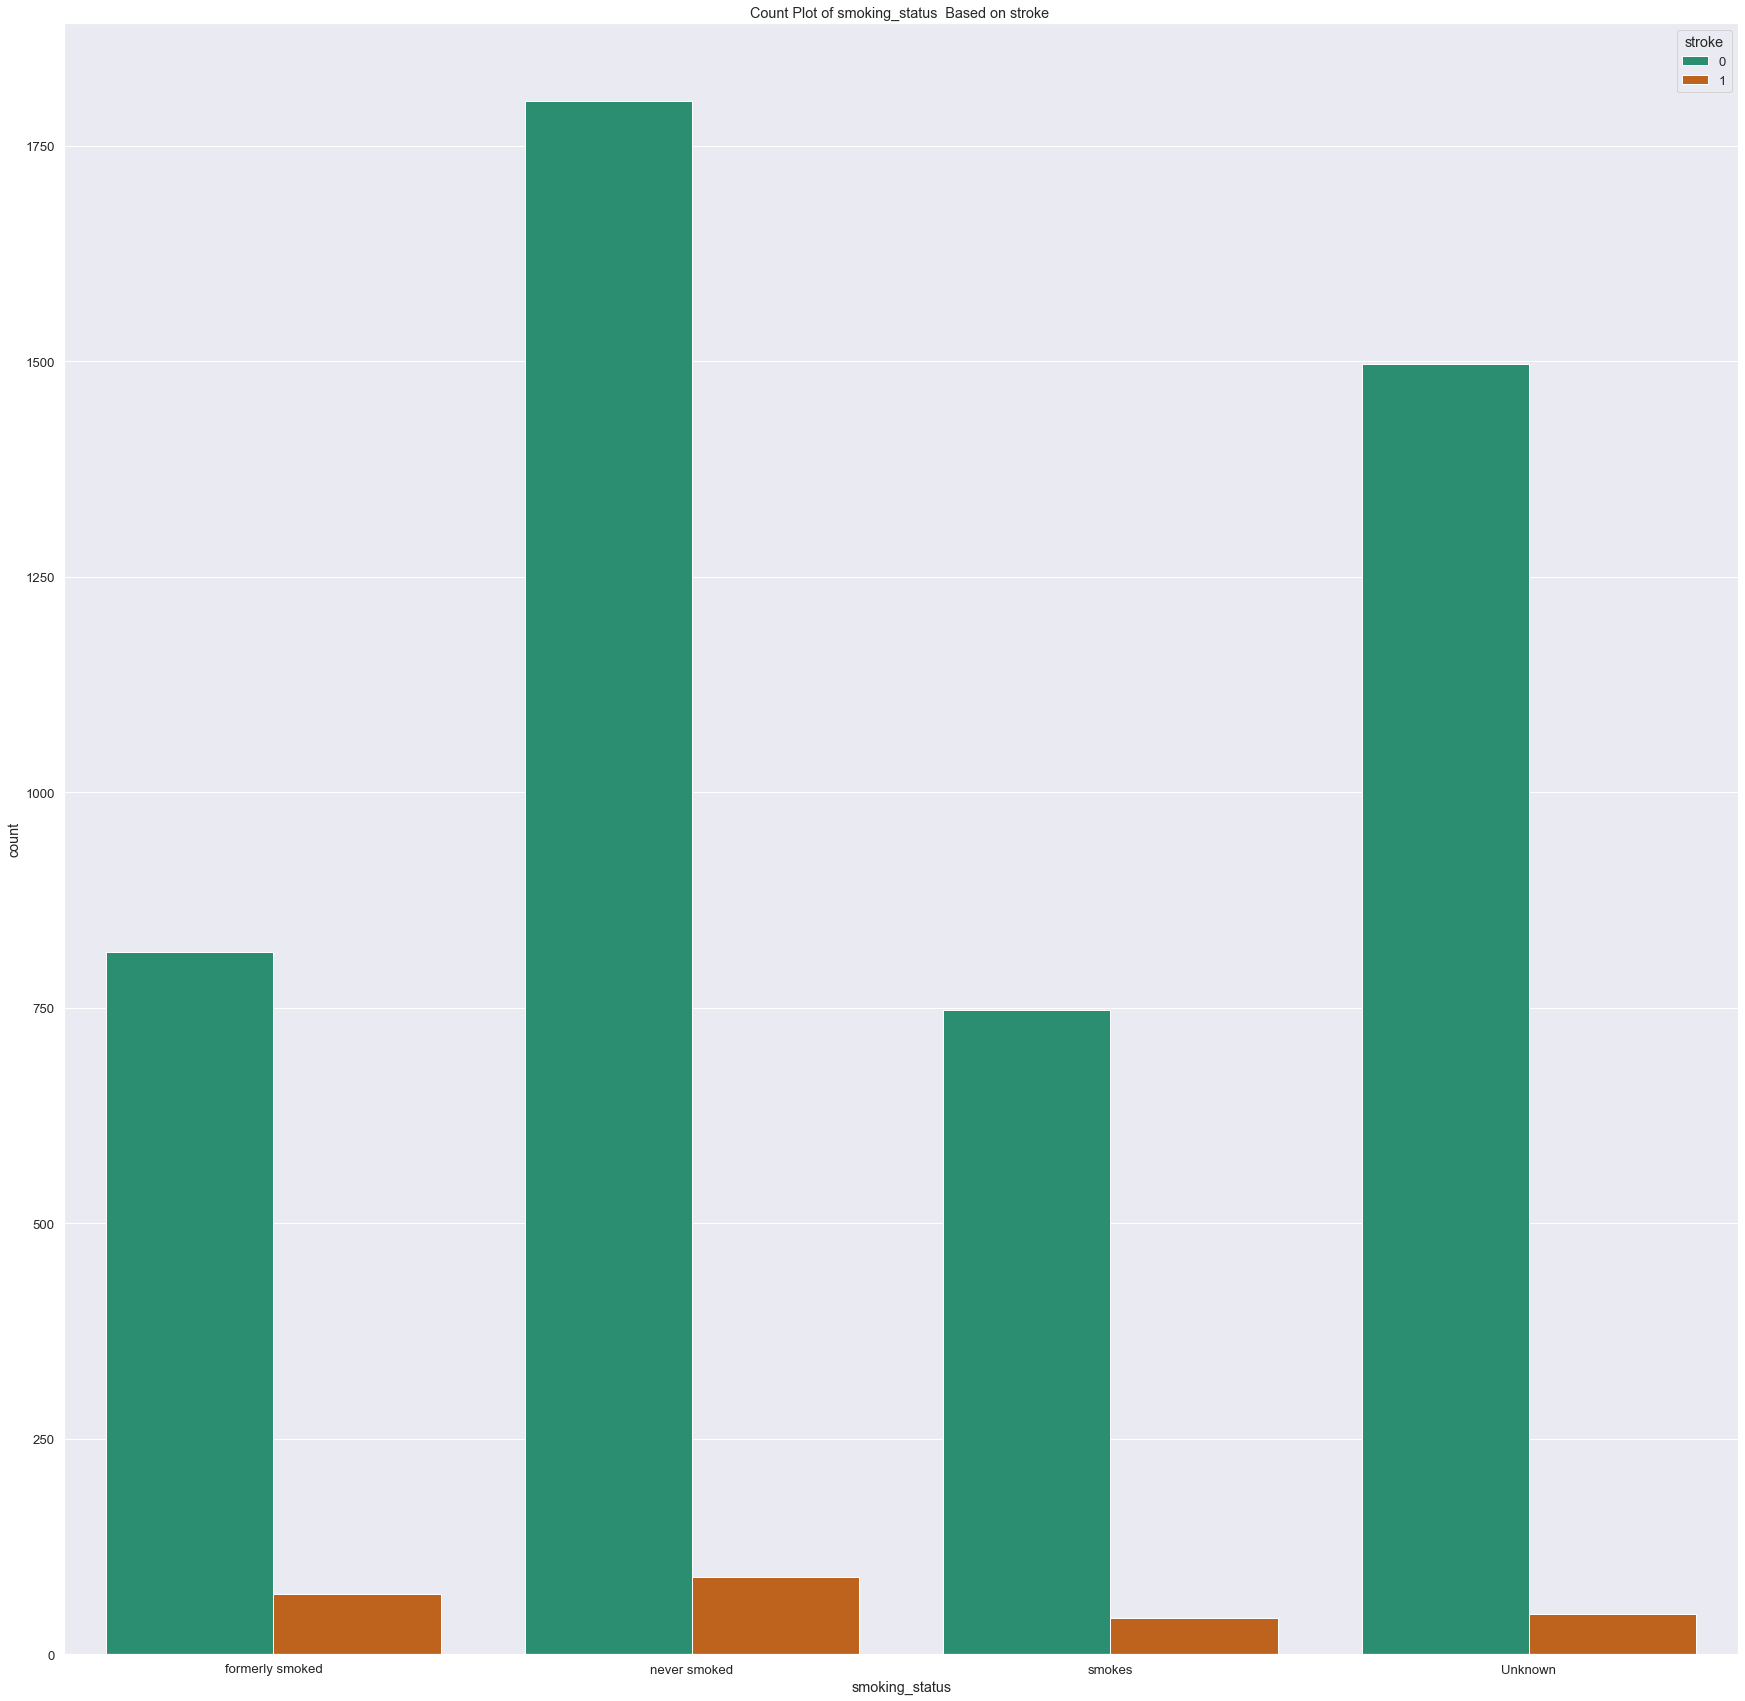

In [87]:
sns.countplot( x = "smoking_status"  , data = df ,hue="stroke" , palette="Dark2")
plt.title("Count Plot of smoking_status  Based on stroke ")

In [88]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Stroke-Disease-Digonistic_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [89]:
# To save report as html file
profile.to_file("Stroke-Disease-Digonistic_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [90]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [91]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (id)

The Unique Values of (id) :: [ 9046 51676 31112 ... 19723 37544 44679]


The Value_Counts of (id) :: 
49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64
--------------------------------------------------------------------------------
The Col (gender)

The Unique Values of (gender) :: ['Male' 'Female' 'Other']


The Value_Counts of (gender) :: 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
--------------------------------------------------------------------------------
The Col (age)

The Unique Values of (age) :: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [92]:
# detect duplicated data ::

df.duplicated().sum()

0

In [93]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [94]:
# investigate data not include duplicaties records ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [95]:
# detect missing data values ::

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [96]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
bmi                        201      0.039335
id                           0      0.000000
gender                       0      0.000000
age                          0      0.000000
hypertension                 0      0.000000
heart_disease                0      0.000000
ever_married                 0      0.000000
work_type                    0      0.000000
Residence_type               0      0.000000
avg_glucose_level            0      0.000000
smoking_status               0      0.000000
stroke                       0      0.000000

In [98]:
df["bmi"].fillna(df["bmi"].mean() , inplace=True)

In [99]:
# investigate data not include Missing data

Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
id                           0           0.0
gender                       0           0.0
age                          0           0.0
hypertension                 0           0.0
heart_disease                0           0.0
ever_married                 0           0.0
work_type                    0           0.0
Residence_type               0           0.0
avg_glucose_level            0           0.0
bmi                          0           0.0
smoking_status               0           0.0
stroke                       0           0.0

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [100]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:ylabel='age'>

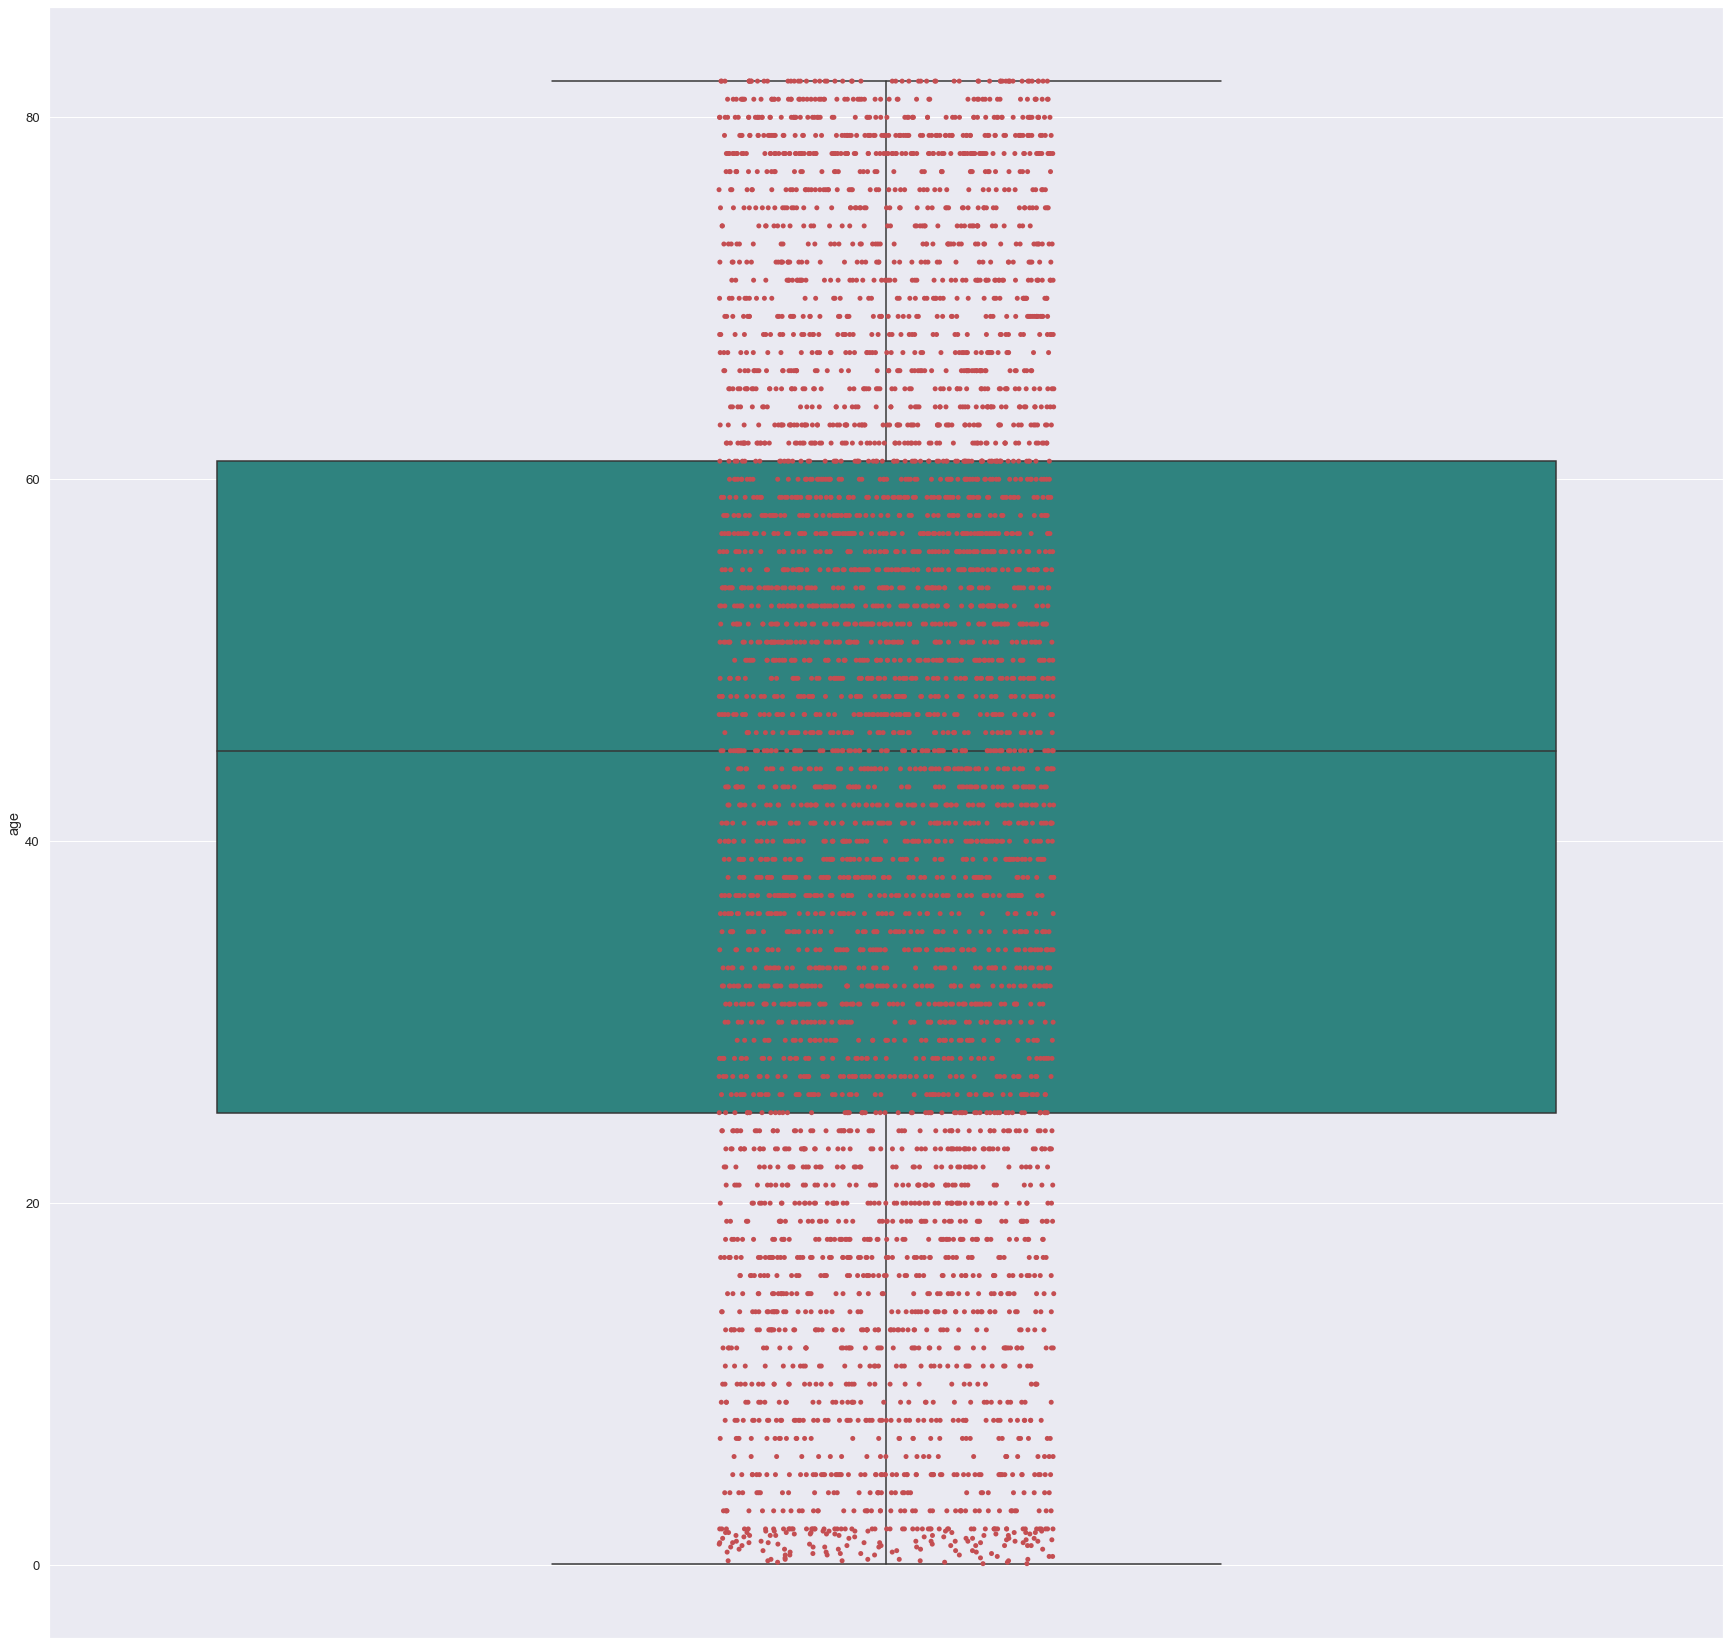

In [101]:
# detect outliers values in age feature ::

sns.boxplot  (y = "age" , data = df , palette="viridis")
sns.stripplot(y = "age" , data = df , color = "r")

<AxesSubplot:ylabel='avg_glucose_level'>

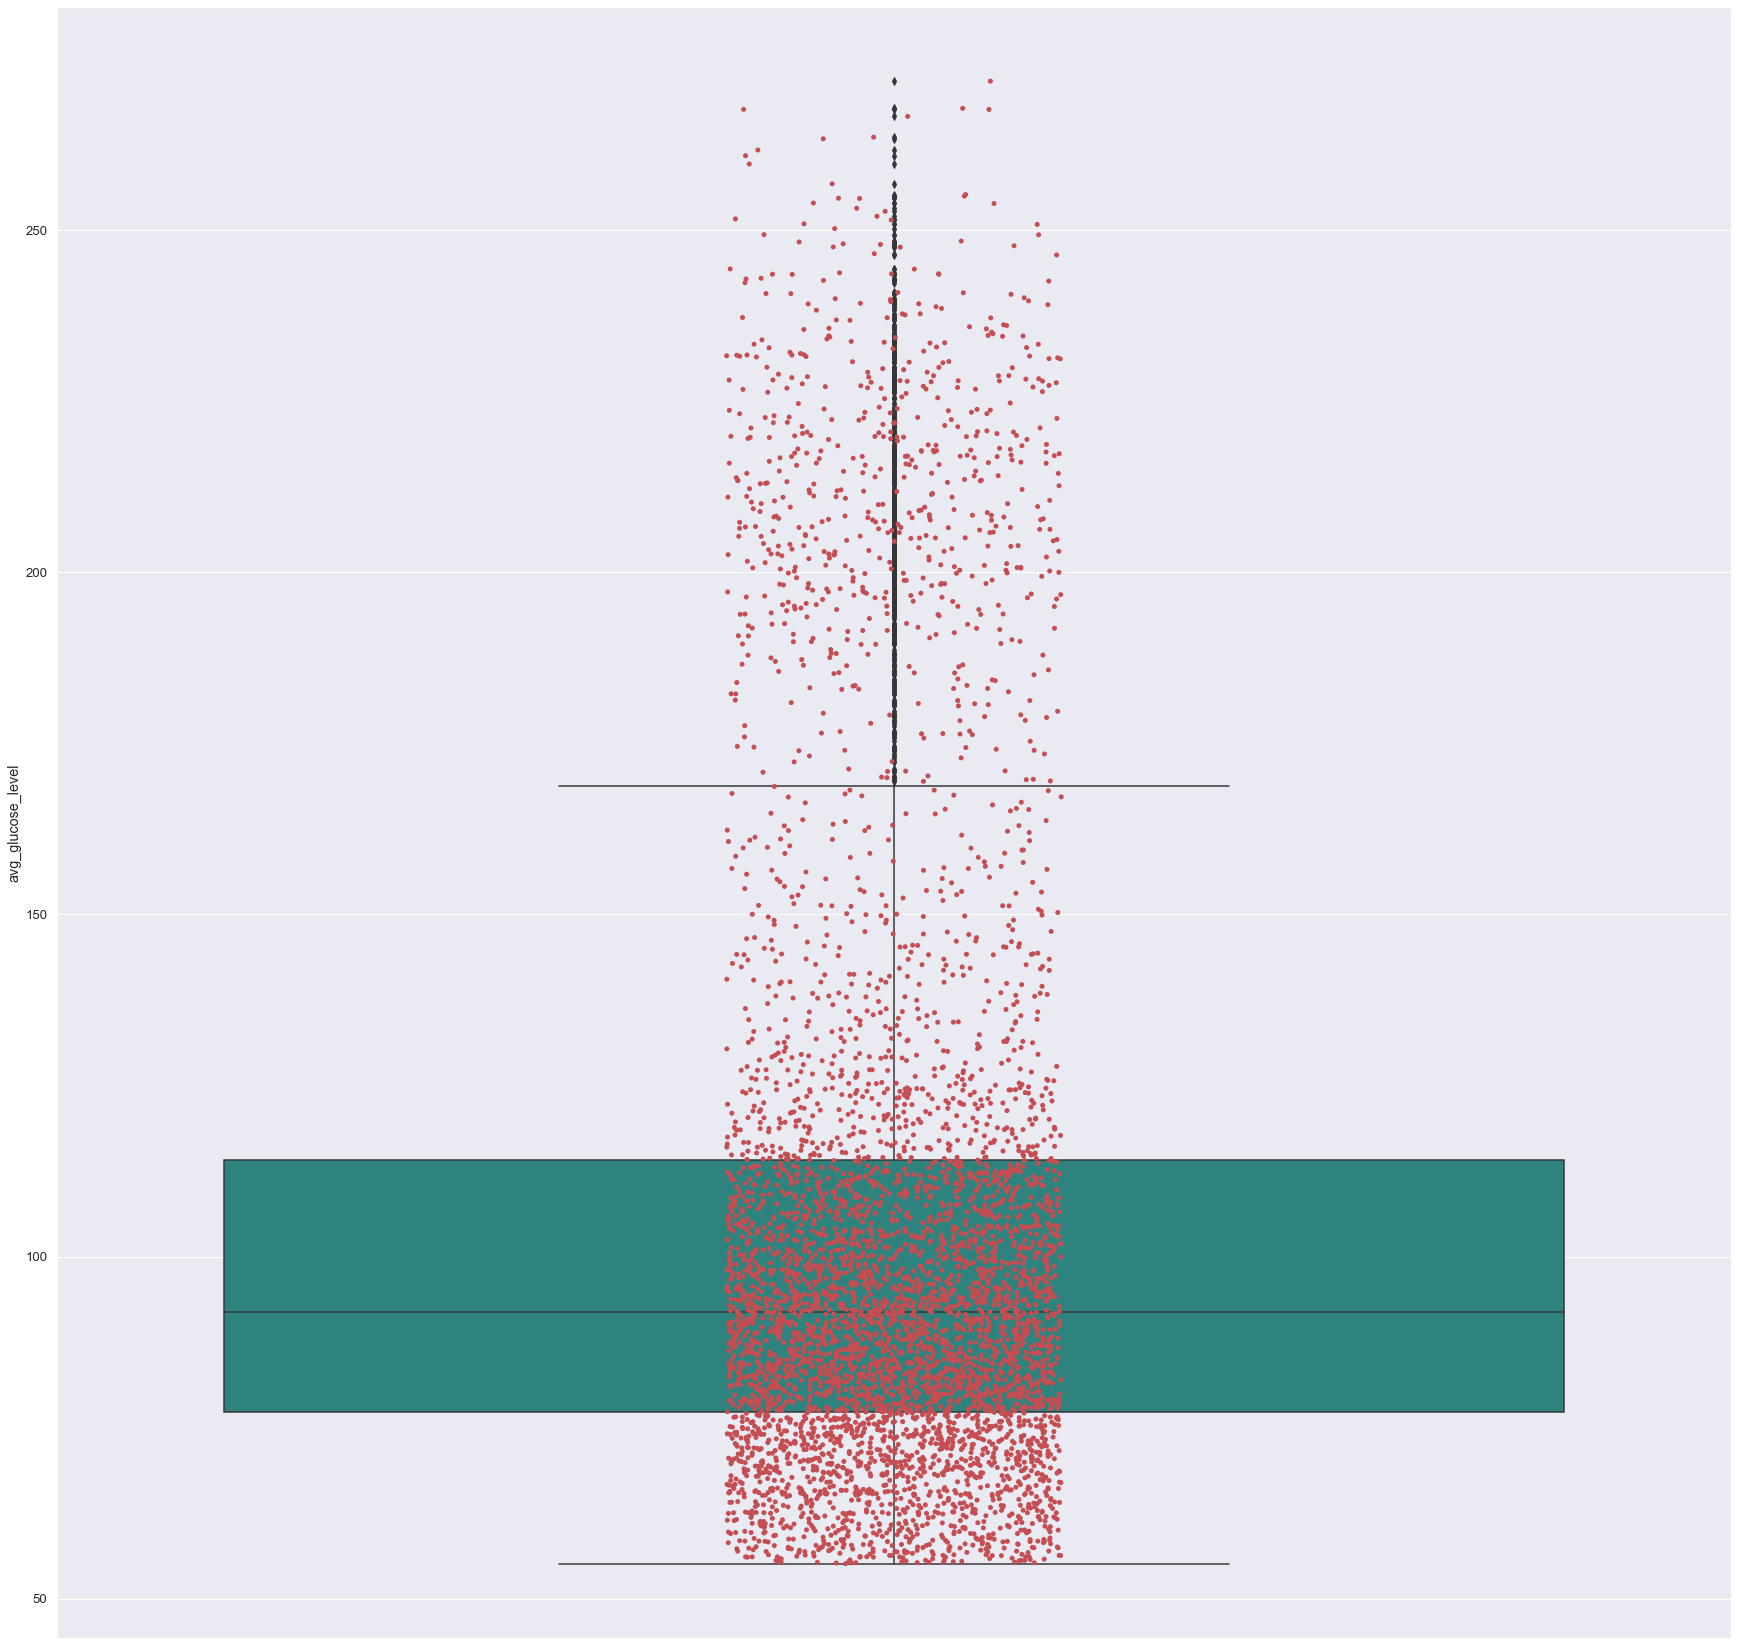

In [102]:
# detect outliers values in avg_glucose_level feature ::

sns.boxplot  (y = "avg_glucose_level" , data = df , palette="viridis")
sns.stripplot(y = "avg_glucose_level" , data = df , color = "r")

<AxesSubplot:ylabel='bmi'>

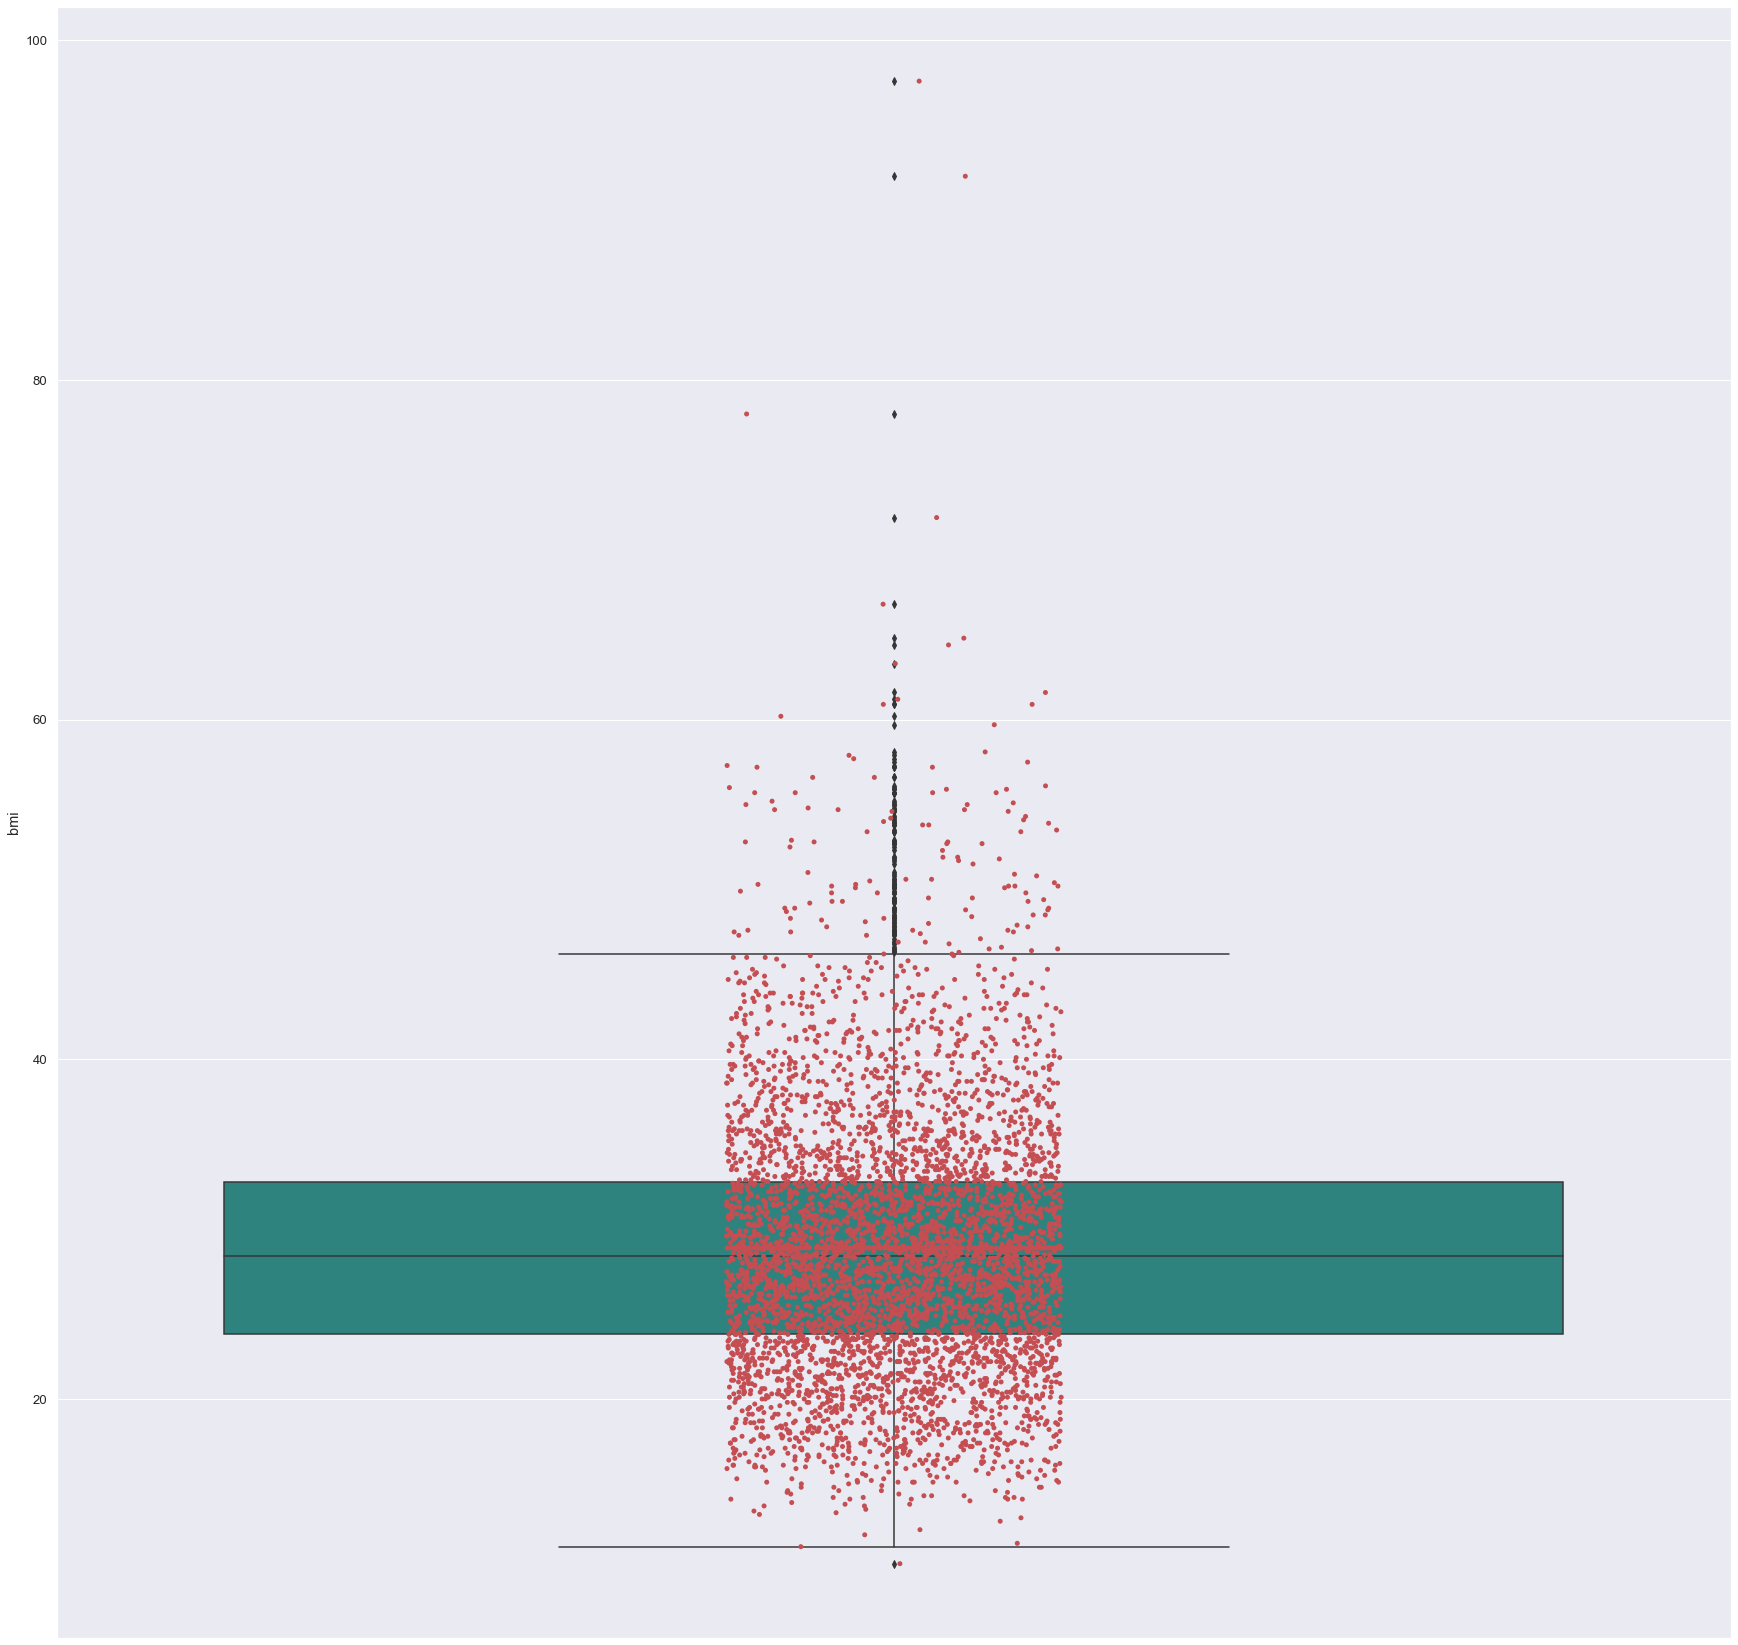

In [103]:
# detect outliers values in bmi feature ::

sns.boxplot  (y = "bmi" , data = df , palette="viridis")
sns.stripplot(y = "bmi" , data = df , color = "r")

* To solve outlier values we will replace it with median values.

In [106]:
from datasist.structdata import detect_outliers
cols = ["avg_glucose_level" , "bmi"]
for col in cols :
    outliers = detect_outliers(df , 0 , [col])
    Median_value = df[col].median()
    df[col].iloc[outliers] = Median_value

<AxesSubplot:ylabel='avg_glucose_level'>

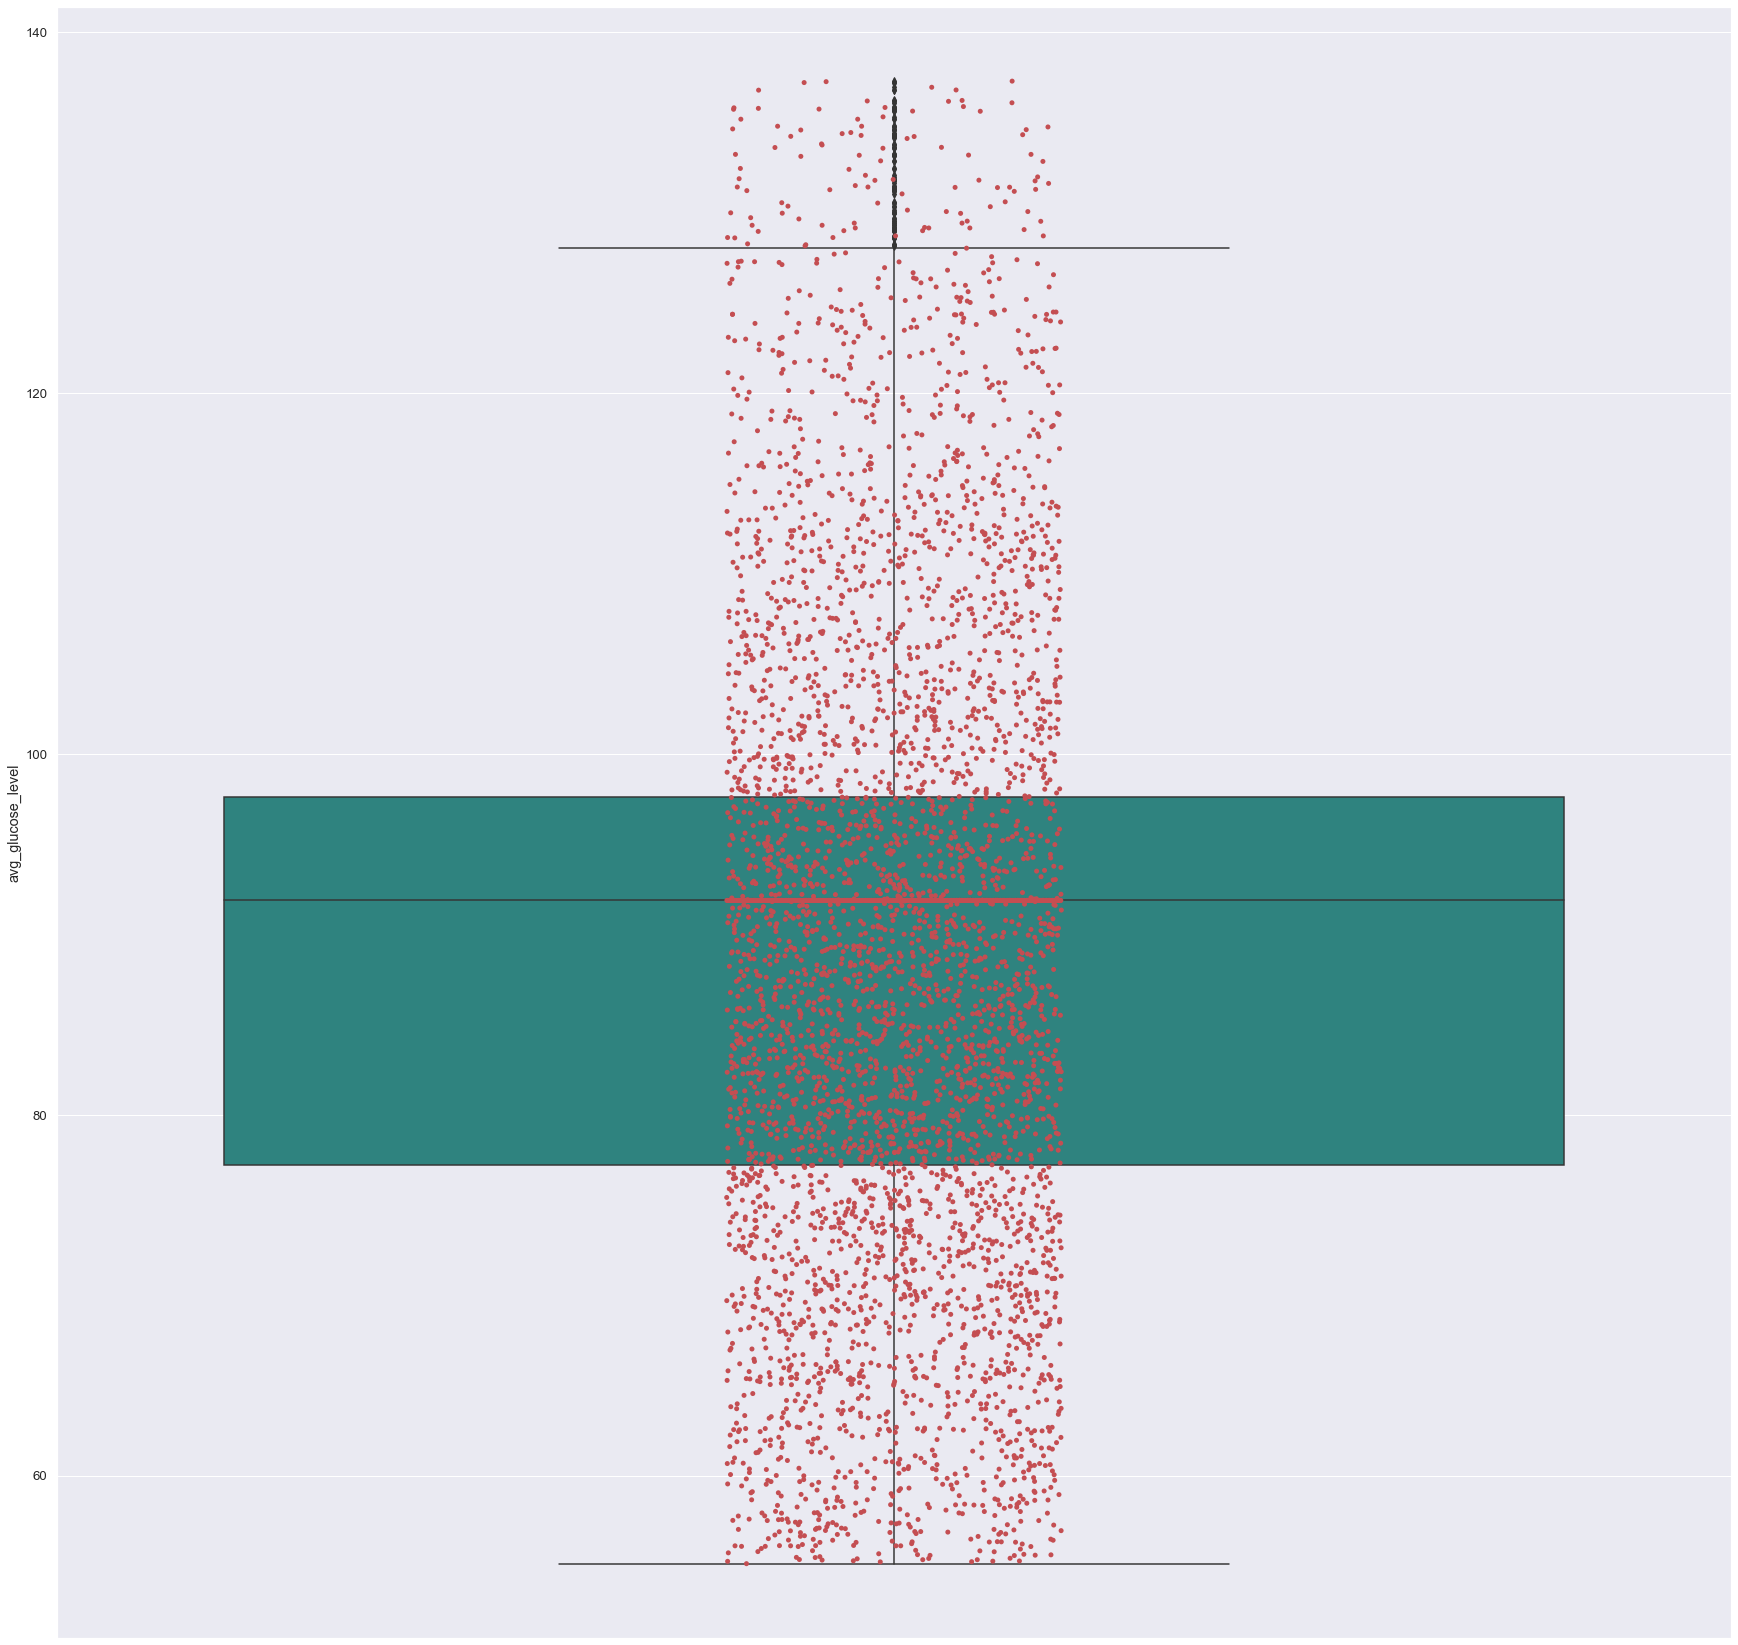

In [107]:
sns.boxplot  (y = "avg_glucose_level" , data = df , palette="viridis")
sns.stripplot(y = "avg_glucose_level" , data = df , color = "r")

<AxesSubplot:ylabel='bmi'>

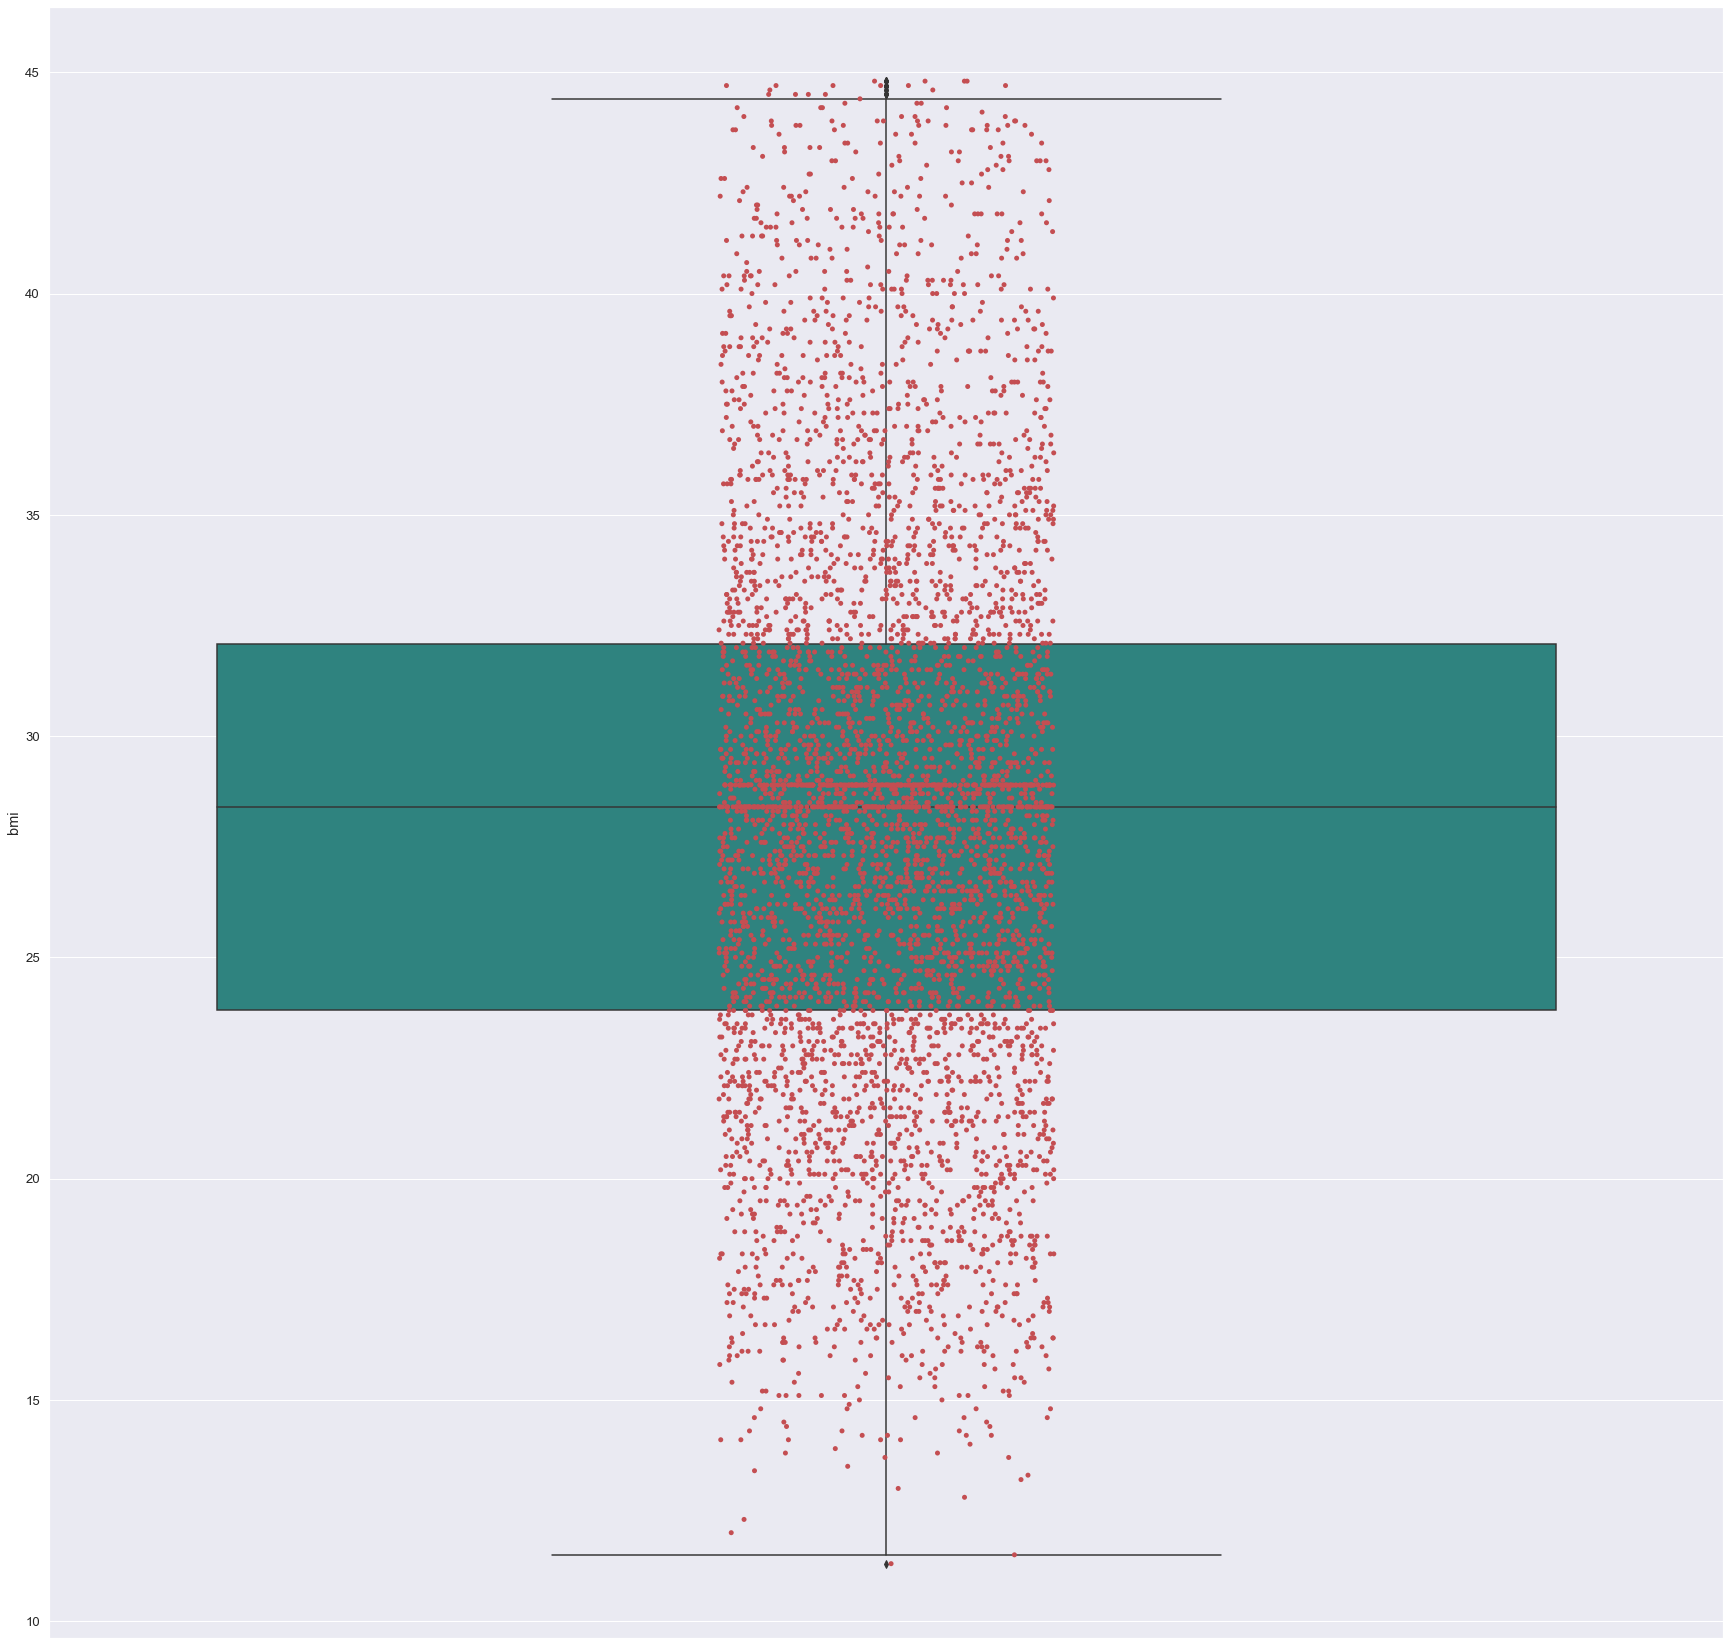

In [108]:
# detect outliers values in bmi feature ::

sns.boxplot  (y = "bmi" , data = df , palette="viridis")
sns.stripplot(y = "bmi" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [110]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (id)

The Unique Values of (id) :: [ 9046 51676 31112 ... 19723 37544 44679]


The Value_Counts of (id) :: 
49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64
--------------------------------------------------------------------------------
The Col (gender)

The Unique Values of (gender) :: ['Male' 'Female' 'Other']


The Value_Counts of (gender) :: 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
--------------------------------------------------------------------------------
The Col (age)

The Unique Values of (age) :: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+

In [111]:
def gender_map(g) :
    if g == "Female" :
        return 0
    elif g == "Male" :
        return 1
    else :
        return 2
df["gender"] = df["gender"].apply(gender_map)

In [112]:
df["ever_married"] = df["ever_married"].apply(lambda x : 1 if x == "Yes" else 0 )

In [113]:
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban            91.8850  36.600000   
1     Self-employed          Rural            91.8850  28.893237   
2           Private          Rural           105.9200  32.500000   
3           Private          Urban            91.8850  34.400000   
4     Self-employed          Rural            91.8850  24.000000   
...             ...            ...                ...        ...   
5105        Private          Urban            83.7500  28.893237   
5106  Self-employed          Urban           125.2000  40.000000   
5107  Self-employed          Rural            82.9900  30.600000   
5108        Private          Rural            91.8825  25.600000   
5109       Govt_job          Urban            85.2800  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  
5109          Unknown       0  

[5110 rows x 12 columns]

In [114]:
# creating dummy variables for categorical features
df = pd.get_dummies(df,drop_first=True)

In [115]:
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      avg_glucose_level        bmi  stroke  work_type_Never_worked  \
0               91.8850  36.600000       1                       0   
1               91.8850  28.893237       1                       0   
2              105.9200  32.500000       1                       0   
3               91.8850  34.400000       1                       0   
4               91.8850  24.000000       1                       0   
...                 ...        ...     ...                     ...   
5105            83.7500  28.893237       0                       0   
5106           125.2000  40.000000       0                       0   
5107            82.9900  30.600000       0                       0   
5108            91.8825  25.600000       0                       0   
5109            85.2800  26.200000       0                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0                     1                        0                   0   
1                     0                        1                   0   
2                     1                        0                   0   
3                     1                        0                   0   
4                     0                        1                   0   
...                 ...                      ...                 ...   
5105                  1                        0                   0   
5106                  0                        1                   0   
5107                  0                        1                   0   
5108                  1                        0                   0   
5109                  0                        0                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        1                               1   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        0                               0   
...                    ...                             ...   
5105                     1                               0   
5106                     1                               0   
5107                     0                               0   
5108                     0                               1   
5109                     1                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
5105                            1                      0  
5106                            1                      0  
5107                            1                      0  
5108                            0                      0  
5109                            0           

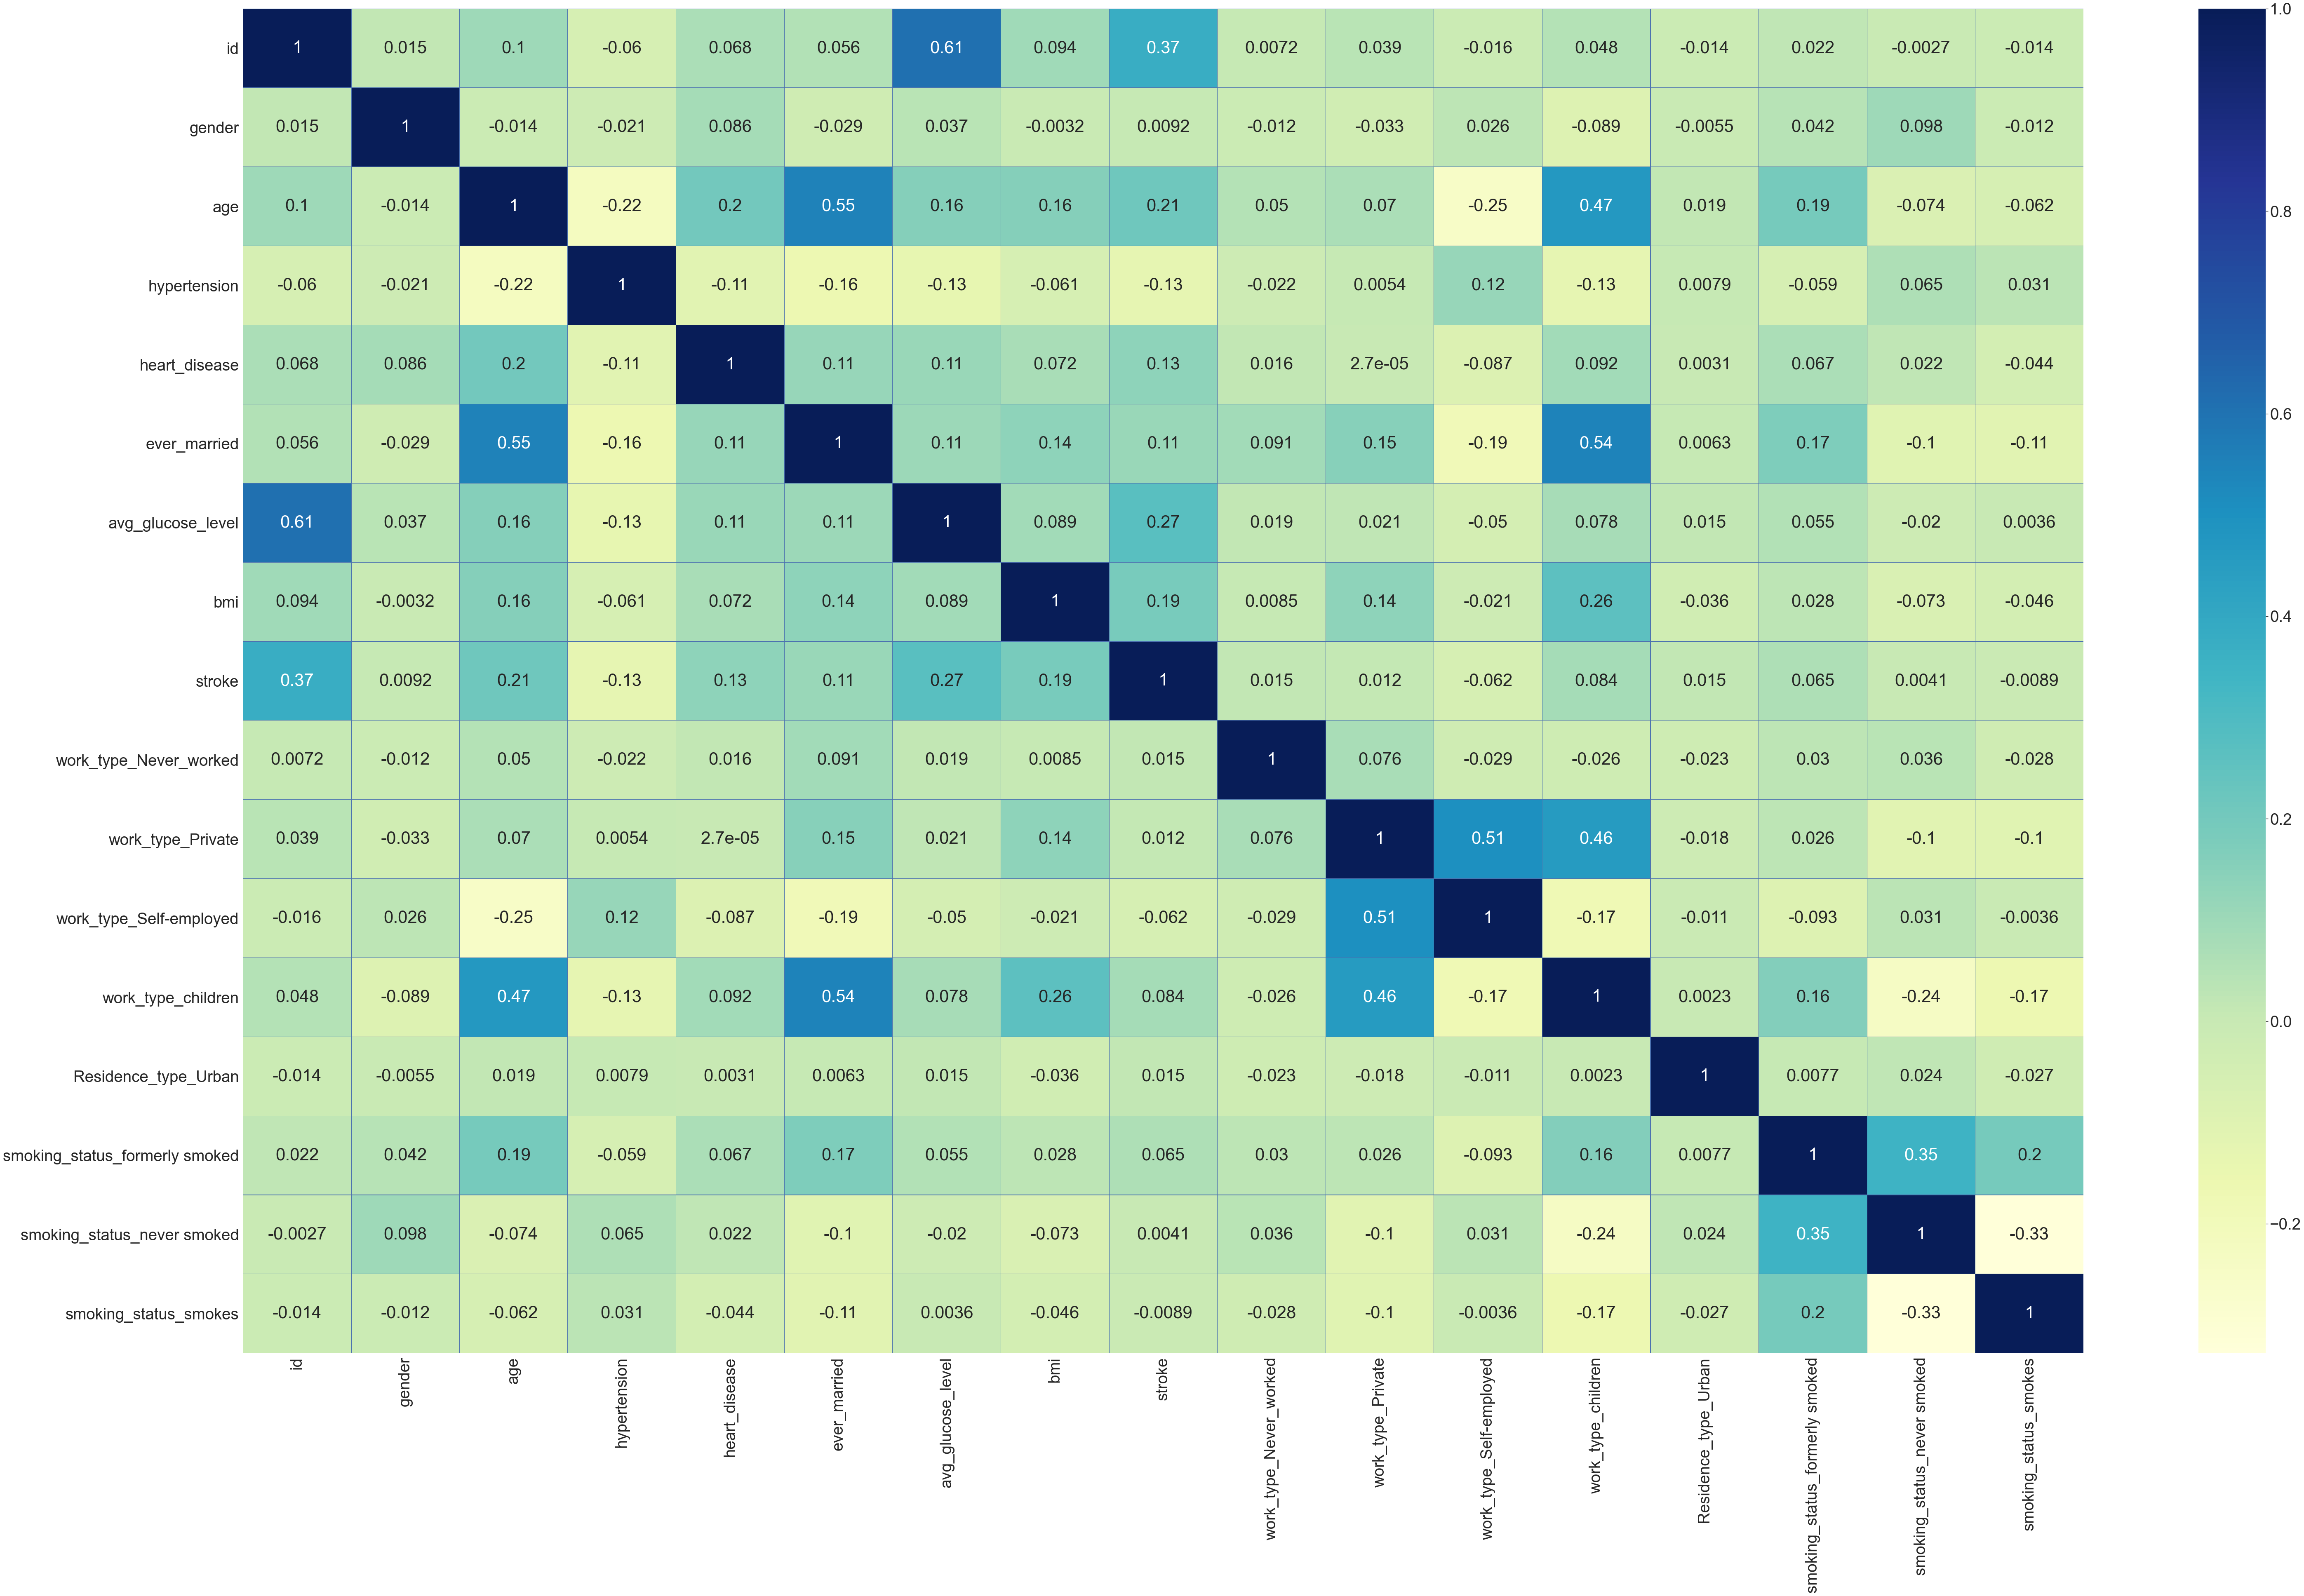

In [118]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [100 , 60]} , font_scale=3.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

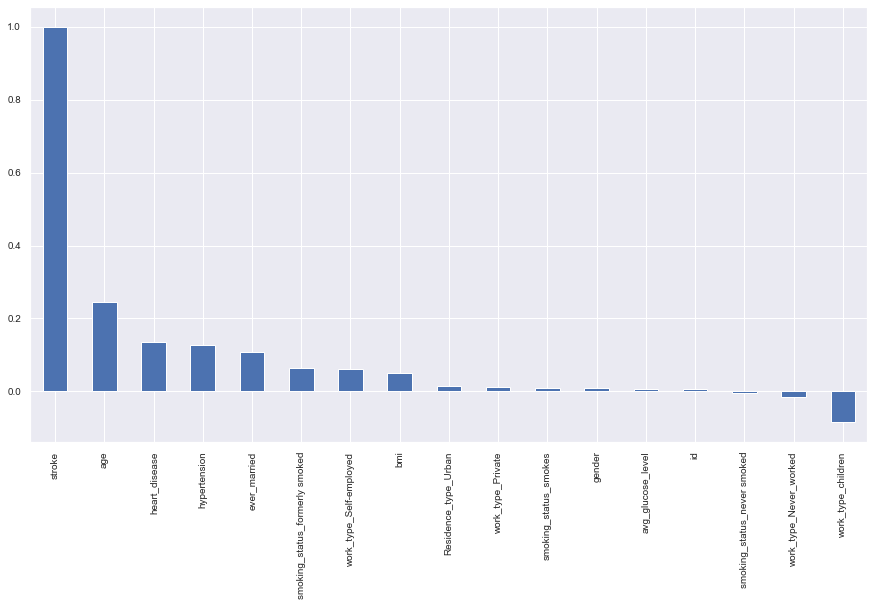

In [119]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=0.9)

plt.figure(figsize=(15,8))
df.corr()['stroke'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

In [120]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

* We will drop useless features which not correlated with our target. 

In [121]:
df.drop(["id"] , axis=1 , inplace=True)

<p id = "Prepration">Data-Prepration</p>

In [122]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [123]:
# Split data into input and output data
x = df.drop("stroke" , axis=1 )
y = df["stroke"]

In [124]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [125]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [127]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [128]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [129]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.9527886497064579
The Testing_Score :: 0.9452054794520548
The Accuracy_Scor :: 0.9452054794520548
The Con_Matrix ::
 [[966   0]
 [ 56   0]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.9070450097847358
The Accuracy_Scor :: 0.9070450097847358
The Con_Matrix ::
 [[917  49]
 [ 46  10]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.9432485322896281
The Accuracy_Scor :: 0.9432485322896281
The Con_Matrix ::
 [[964   2]
 [ 56   0]]
The Model :: XGB_Classifer
----------
[21:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 0.9943737769080235
The Testing_Score :: 0.9393346379647749
The Accu

* Select most efficient model with high Performance and accuracy

In [130]:
XGB_Model = XGBClassifier()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

[21:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9943737769080235
0.9393346379647749
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [131]:
XGB_Model.score(x_train , y_train)

0.9943737769080235

In [132]:
XGB_Model.score(x_test , y_test)

0.9393346379647749

In [133]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.9452054794520548

In [134]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[964,   2],
       [ 54,   2]], dtype=int64)

<AxesSubplot:>

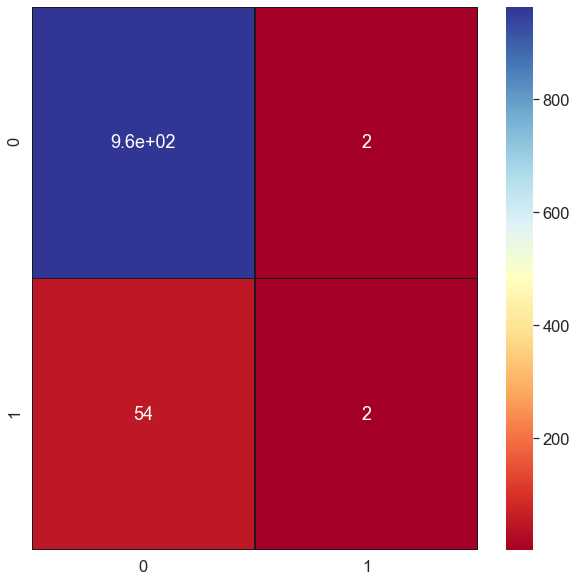

In [135]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [136]:
import joblib

In [137]:
scaler = joblib.dump(scaller , "scaler.h5")

In [138]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict Stroke label.

In [139]:
df.head(2)

gender   age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0       1  67.0             0              1             1             91.885   
1       0  61.0             0              0             1             91.885   

         bmi  stroke  work_type_Never_worked  work_type_Private  \
0  36.600000       1                       0                  1   
1  28.893237       1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0

In [140]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [141]:
len(x.columns)

15

In [145]:
custom_data = np.array([1 , 60.0 , 1 , 0 , 1   , 91.885   , 36.8952   , 0 , 1 , 0 ,0  , 1    , 0 , 0 , 1     ])

In [146]:
custom_data.shape

(15,)

In [147]:
len(custom_data)

15

In [148]:
custom_data = scaller.transform([custom_data])
custom_data

array([[ 1.17275977,  0.73699746,  3.01973705, -0.24020259,  0.71777186,
         0.16164349,  1.37282591, -0.06462103,  0.87209589, -0.44076528,
        -0.39220459,  0.98542904, -0.46235995, -0.76211534,  2.3450384 ]])

In [149]:
prediction = XGB_Model.predict(custom_data)
prediction

array([0], dtype=int64)